# Importacion de librerias y tratamiento del dataset #

Se llaman a las principales librerias que usaremos en esta primera etapa

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from IPython.display import Image

from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier


C:\Users\Michael\Anaconda3\envs\KerasNGpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Se muesta la información general del dataset

In [2]:
entrenamiento = pd.read_csv("DatasetTesteoEd123.csv", sep=';')
print (entrenamiento.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 15 columns):
edx.forum.response.created    2300 non-null int64
edx.forum.thread.created      2300 non-null int64
load_video                    2300 non-null int64
openassessment.upload_file    2300 non-null int64
pause_video                   2300 non-null int64
play_video                    2300 non-null int64
problem_check                 2300 non-null int64
problem_graded                2300 non-null int64
problem_show                  2300 non-null int64
seek_video                    2300 non-null int64
seq_goto                      2300 non-null int64
seq_next                      2300 non-null int64
seq_prev                      2300 non-null int64
stop_video                    2300 non-null int64
clase                         2300 non-null object
dtypes: int64(14), object(1)
memory usage: 269.6+ KB
None


Para un mejor manejo de las neuronas utilizadas dentro de las redes neuronales se declaran variables que se usaran mas adelante.

In [3]:
caracteristicas = len(entrenamiento.columns)
limite = caracteristicas - 1
oculta = 12
salida = 1

Se revisan las primeras entradas del dataset para verificar que todo esta correcto

In [4]:
entrenamiento.head(5)

,edx.forum.response.created,edx.forum.thread.created,load_video,openassessment.upload_file,pause_video,play_video,problem_check,problem_graded,problem_show,seek_video,seq_goto,seq_next,seq_prev,stop_video,clase
0,0,1,16,1,26,52,12,12,3,18,10,23,9,7,T
1,1,0,19,3,15,302,46,46,10,25,44,7,2,6,T
2,1,0,2,0,0,2,1,1,1,0,0,0,0,0,F
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,F
4,0,0,1,0,0,4,0,0,0,3,7,0,0,0,F


Se verifica que existe correlación entre las diferentes características del Dataset y se genera un gráfico con él se observara de mejor manera la relación entre las diferentes características.

In [5]:
corr = entrenamiento.corr()

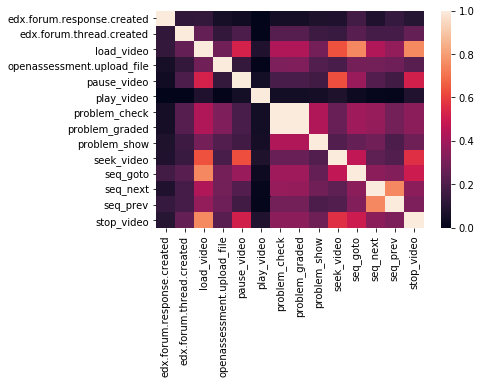

In [6]:
%matplotlib inline
import seaborn as sns
sns.heatmap(corr, annot = False)

Se establecen los limites así también, cuál será la clase que servirá para el entrenamiento del modelo?. El valor de salida es una variable T o F el cual es un String que será convertido en un valor entendible por la máquina, se estará usando LabelEncoder  una función de la librería Sklearn y debe ser importada antes de ser usada.

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

datos = entrenamiento
# Evaluar todas las columnas desde la primera hasta el limite
X = datos.values[:, 0:limite]

# Devuelve una matriz aplanada contigua.
# Se devuelve una matriz 1-D que contiene los elementos de la entrada.
Y = datos.values[:,limite]
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# Se dividen los datos de entrada en conjuntos de entramiento y testeo
# Especificando que se use el 70% del dataset para el testeo
X_train, X_test, y_train, y_test = train_test_split( X, encoded_Y, test_size = 0.70, random_state = 0)

Para futuros entrenamientos del modelo se escala los datos logrando de esta manera tener datos mas estables

In [8]:
from sklearn.preprocessing import StandardScaler

# Definir la escala
scaler = StandardScaler().fit(X_train)

# Escalar el set det entrenamiento
X_train = scaler.transform(X_train)

# Escalar el set de testeo
X_test = scaler.transform(X_test)

C:\Users\Michael\Anaconda3\envs\KerasNGpu\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Michael\Anaconda3\envs\KerasNGpu\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Michael\Anaconda3\envs\KerasNGpu\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Creación del modelo neuronal ##

Primero se crea un modelo vació de tipo Sequential. Este modelo se refiere a que crearemos una serie de capas de neuronas secuenciales, “una delante de otra”.

Se agregan 3 capas Dense con “model.add()”. 

pues al poner input_shape=limite estamos definiendo la capa de entrada con 14 neuronas y la primer capa oculta (hidden) de 12 neuronas.
Como función de activación utilizaremos “relu”*  que sabemos es la que da mejores resultados para este ejemplo.

Para terminar se agregara una capa con 1 neurona de salida y función de activación sigmoid perfecta para problemas que dan como resultado una salida binaria.

* La función RELu permiten el paso de todos los valores positivos sin cambiarlos, pero asigna todos los valores negativos a 0

In [9]:
from keras.models import Sequential
from keras.layers import Dense

# Inicia el constructor
model = Sequential()
# Se agrega la capa de entrada
model.add(Dense(limite, kernel_initializer='normal',activation='relu', input_shape=(limite,)))
# Add one hidden layer 
model.add(Dense(oculta, kernel_initializer='normal', activation='relu'))
# Add an output layer 
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model2 = Sequential()
model2.add(Dense(limite, kernel_initializer='normal',activation='relu', input_shape=(limite,)))
model2.add(Dense(oculta, kernel_initializer='normal', activation='relu'))
model2.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

In [10]:
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 14)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                180       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________


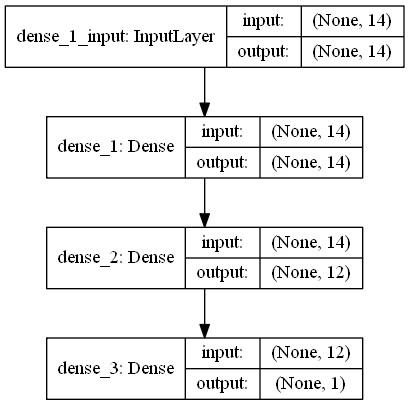

In [11]:
Image(filename='model_plot.png',width=400,height=400)

## Entrenamiento y testeo de la red neuronal ##

Para el entranamiento se usan las diferentes optimizadores de perdida que ofrece keras, en las pruebas se puede apreciar que para la perdida se logra apreciar que: mean_absolute_error y categorical_hinge son los mejores metodos, mientras que para el mejor optimizador sgd es el brinda la mejor respuesta

In [12]:
model.compile(loss='mean_absolute_error',
              optimizer='sgd',
              metrics=['accuracy'])
                   
history = model.fit(X_train, y_train,epochs=5000, validation_split=0.30, batch_size=50, verbose=1)

Train on 482 samples, validate on 208 samples
Epoch 1/5000
482/482 [==============================] - 0s 535us/step - loss: 0.5001 - acc: 0.5311 - val_loss: 0.5000 - val_acc: 0.5433
Epoch 2/5000
482/482 [==============================] - 0s 27us/step - loss: 0.5000 - acc: 0.5353 - val_loss: 0.5000 - val_acc: 0.5433
Epoch 3/5000
482/482 [==============================] - 0s 37us/step - loss: 0.5000 - acc: 0.5353 - val_loss: 0.4999 - val_acc: 0.5433
Epoch 4/5000
482/482 [==============================] - 0s 39us/step - loss: 0.4999 - acc: 0.5353 - val_loss: 0.4999 - val_acc: 0.5433
Epoch 5/5000
482/482 [==============================] - 0s 46us/step - loss: 0.4999 - acc: 0.5353 - val_loss: 0.4999 - val_acc: 0.5433
Epoch 6/5000
482/482 [==============================] - 0s 50us/step - loss: 0.4999 - acc: 0.5353 - val_loss: 0.4998 - val_acc: 0.5433
Epoch 7/5000
482/482 [==============================] - 0s 52us/step - loss: 0.4998 - acc: 0.5353 - val_loss: 0.4998 - val_acc: 0.5433
Epoch 8/

Epoch 61/5000
482/482 [==============================] - 0s 27us/step - loss: 0.4981 - acc: 0.5353 - val_loss: 0.4977 - val_acc: 0.5433
Epoch 62/5000
482/482 [==============================] - 0s 27us/step - loss: 0.4981 - acc: 0.5353 - val_loss: 0.4976 - val_acc: 0.5433
Epoch 63/5000
482/482 [==============================] - 0s 25us/step - loss: 0.4981 - acc: 0.5353 - val_loss: 0.4976 - val_acc: 0.5433
Epoch 64/5000
482/482 [==============================] - 0s 27us/step - loss: 0.4980 - acc: 0.5353 - val_loss: 0.4975 - val_acc: 0.5433
Epoch 65/5000
482/482 [==============================] - 0s 35us/step - loss: 0.4980 - acc: 0.5353 - val_loss: 0.4975 - val_acc: 0.5433
Epoch 66/5000
482/482 [==============================] - 0s 73us/step - loss: 0.4979 - acc: 0.5353 - val_loss: 0.4975 - val_acc: 0.5433
Epoch 67/5000
482/482 [==============================] - 0s 102us/step - loss: 0.4979 - acc: 0.5353 - val_loss: 0.4974 - val_acc: 0.5433
Epoch 68/5000
482/482 [========================

482/482 [==============================] - 0s 21us/step - loss: 0.4962 - acc: 0.5353 - val_loss: 0.4953 - val_acc: 0.5433
Epoch 122/5000
482/482 [==============================] - 0s 25us/step - loss: 0.4962 - acc: 0.5353 - val_loss: 0.4953 - val_acc: 0.5433
Epoch 123/5000
482/482 [==============================] - 0s 27us/step - loss: 0.4961 - acc: 0.5353 - val_loss: 0.4953 - val_acc: 0.5433
Epoch 124/5000
482/482 [==============================] - 0s 29us/step - loss: 0.4961 - acc: 0.5353 - val_loss: 0.4952 - val_acc: 0.5433
Epoch 125/5000
482/482 [==============================] - 0s 41us/step - loss: 0.4961 - acc: 0.5353 - val_loss: 0.4952 - val_acc: 0.5433
Epoch 126/5000
482/482 [==============================] - 0s 100us/step - loss: 0.4960 - acc: 0.5353 - val_loss: 0.4951 - val_acc: 0.5433
Epoch 127/5000
482/482 [==============================] - 0s 70us/step - loss: 0.4960 - acc: 0.5353 - val_loss: 0.4951 - val_acc: 0.5433
Epoch 128/5000
482/482 [==============================]

482/482 [==============================] - 0s 31us/step - loss: 0.4943 - acc: 0.5353 - val_loss: 0.4931 - val_acc: 0.5433
Epoch 181/5000
482/482 [==============================] - 0s 29us/step - loss: 0.4943 - acc: 0.5353 - val_loss: 0.4930 - val_acc: 0.5433
Epoch 182/5000
482/482 [==============================] - 0s 23us/step - loss: 0.4943 - acc: 0.5353 - val_loss: 0.4930 - val_acc: 0.5433
Epoch 183/5000
482/482 [==============================] - 0s 27us/step - loss: 0.4942 - acc: 0.5353 - val_loss: 0.4930 - val_acc: 0.5433
Epoch 184/5000
482/482 [==============================] - 0s 23us/step - loss: 0.4942 - acc: 0.5353 - val_loss: 0.4929 - val_acc: 0.5433
Epoch 185/5000
482/482 [==============================] - 0s 21us/step - loss: 0.4942 - acc: 0.5353 - val_loss: 0.4929 - val_acc: 0.5433
Epoch 186/5000
482/482 [==============================] - 0s 23us/step - loss: 0.4942 - acc: 0.5353 - val_loss: 0.4928 - val_acc: 0.5433
Epoch 187/5000
482/482 [==============================] 

482/482 [==============================] - 0s 48us/step - loss: 0.4925 - acc: 0.5353 - val_loss: 0.4908 - val_acc: 0.5433
Epoch 240/5000
482/482 [==============================] - 0s 41us/step - loss: 0.4924 - acc: 0.5353 - val_loss: 0.4908 - val_acc: 0.5433
Epoch 241/5000
482/482 [==============================] - 0s 37us/step - loss: 0.4924 - acc: 0.5353 - val_loss: 0.4907 - val_acc: 0.5433
Epoch 242/5000
482/482 [==============================] - 0s 29us/step - loss: 0.4924 - acc: 0.5353 - val_loss: 0.4907 - val_acc: 0.5433
Epoch 243/5000
482/482 [==============================] - 0s 27us/step - loss: 0.4923 - acc: 0.5353 - val_loss: 0.4907 - val_acc: 0.5433
Epoch 244/5000
482/482 [==============================] - 0s 27us/step - loss: 0.4923 - acc: 0.5353 - val_loss: 0.4906 - val_acc: 0.5433
Epoch 245/5000
482/482 [==============================] - 0s 27us/step - loss: 0.4923 - acc: 0.5353 - val_loss: 0.4906 - val_acc: 0.5433
Epoch 246/5000
482/482 [==============================] 

482/482 [==============================] - 0s 41us/step - loss: 0.4907 - acc: 0.5353 - val_loss: 0.4887 - val_acc: 0.5433
Epoch 299/5000
482/482 [==============================] - 0s 37us/step - loss: 0.4906 - acc: 0.5353 - val_loss: 0.4886 - val_acc: 0.5433
Epoch 300/5000
482/482 [==============================] - 0s 27us/step - loss: 0.4906 - acc: 0.5353 - val_loss: 0.4886 - val_acc: 0.5433
Epoch 301/5000
482/482 [==============================] - 0s 29us/step - loss: 0.4906 - acc: 0.5353 - val_loss: 0.4885 - val_acc: 0.5433
Epoch 302/5000
482/482 [==============================] - 0s 23us/step - loss: 0.4905 - acc: 0.5353 - val_loss: 0.4885 - val_acc: 0.5433
Epoch 303/5000
482/482 [==============================] - 0s 25us/step - loss: 0.4905 - acc: 0.5353 - val_loss: 0.4885 - val_acc: 0.5433
Epoch 304/5000
482/482 [==============================] - 0s 25us/step - loss: 0.4905 - acc: 0.5353 - val_loss: 0.4884 - val_acc: 0.5433
Epoch 305/5000
482/482 [==============================] 

Epoch 358/5000
482/482 [==============================] - 0s 48us/step - loss: 0.4887 - acc: 0.5353 - val_loss: 0.4864 - val_acc: 0.5433
Epoch 359/5000
482/482 [==============================] - 0s 41us/step - loss: 0.4887 - acc: 0.5353 - val_loss: 0.4863 - val_acc: 0.5433
Epoch 360/5000
482/482 [==============================] - 0s 35us/step - loss: 0.4887 - acc: 0.5353 - val_loss: 0.4863 - val_acc: 0.5433
Epoch 361/5000
482/482 [==============================] - 0s 33us/step - loss: 0.4886 - acc: 0.5353 - val_loss: 0.4862 - val_acc: 0.5433
Epoch 362/5000
482/482 [==============================] - 0s 33us/step - loss: 0.4886 - acc: 0.5353 - val_loss: 0.4862 - val_acc: 0.5433
Epoch 363/5000
482/482 [==============================] - 0s 29us/step - loss: 0.4886 - acc: 0.5353 - val_loss: 0.4862 - val_acc: 0.5433
Epoch 364/5000
482/482 [==============================] - 0s 25us/step - loss: 0.4885 - acc: 0.5353 - val_loss: 0.4861 - val_acc: 0.5433
Epoch 365/5000
482/482 [=================

482/482 [==============================] - 0s 251us/step - loss: 0.4867 - acc: 0.5353 - val_loss: 0.4840 - val_acc: 0.5433
Epoch 418/5000
482/482 [==============================] - 0s 83us/step - loss: 0.4867 - acc: 0.5353 - val_loss: 0.4839 - val_acc: 0.5433
Epoch 419/5000
482/482 [==============================] - 0s 52us/step - loss: 0.4867 - acc: 0.5353 - val_loss: 0.4839 - val_acc: 0.5433
Epoch 420/5000
482/482 [==============================] - 0s 46us/step - loss: 0.4866 - acc: 0.5353 - val_loss: 0.4839 - val_acc: 0.5433
Epoch 421/5000
482/482 [==============================] - 0s 37us/step - loss: 0.4866 - acc: 0.5353 - val_loss: 0.4838 - val_acc: 0.5433
Epoch 422/5000
482/482 [==============================] - 0s 35us/step - loss: 0.4866 - acc: 0.5353 - val_loss: 0.4838 - val_acc: 0.5433
Epoch 423/5000
482/482 [==============================] - 0s 25us/step - loss: 0.4865 - acc: 0.5353 - val_loss: 0.4837 - val_acc: 0.5433
Epoch 424/5000
482/482 [==============================]

482/482 [==============================] - 0s 108us/step - loss: 0.4844 - acc: 0.5353 - val_loss: 0.4813 - val_acc: 0.5433
Epoch 477/5000
482/482 [==============================] - 0s 81us/step - loss: 0.4844 - acc: 0.5353 - val_loss: 0.4813 - val_acc: 0.5433
Epoch 478/5000
482/482 [==============================] - 0s 54us/step - loss: 0.4843 - acc: 0.5353 - val_loss: 0.4812 - val_acc: 0.5433
Epoch 479/5000
482/482 [==============================] - 0s 46us/step - loss: 0.4843 - acc: 0.5353 - val_loss: 0.4812 - val_acc: 0.5433
Epoch 480/5000
482/482 [==============================] - 0s 31us/step - loss: 0.4843 - acc: 0.5353 - val_loss: 0.4811 - val_acc: 0.5433
Epoch 481/5000
482/482 [==============================] - 0s 37us/step - loss: 0.4842 - acc: 0.5353 - val_loss: 0.4811 - val_acc: 0.5433
Epoch 482/5000
482/482 [==============================] - 0s 29us/step - loss: 0.4842 - acc: 0.5353 - val_loss: 0.4810 - val_acc: 0.5433
Epoch 483/5000
482/482 [==============================]

Epoch 536/5000
482/482 [==============================] - 0s 60us/step - loss: 0.4812 - acc: 0.5353 - val_loss: 0.4776 - val_acc: 0.5433
Epoch 537/5000
482/482 [==============================] - 0s 52us/step - loss: 0.4811 - acc: 0.5353 - val_loss: 0.4775 - val_acc: 0.5433
Epoch 538/5000
482/482 [==============================] - 0s 48us/step - loss: 0.4810 - acc: 0.5353 - val_loss: 0.4774 - val_acc: 0.5433
Epoch 539/5000
482/482 [==============================] - 0s 33us/step - loss: 0.4809 - acc: 0.5353 - val_loss: 0.4774 - val_acc: 0.5433
Epoch 540/5000
482/482 [==============================] - 0s 31us/step - loss: 0.4809 - acc: 0.5353 - val_loss: 0.4773 - val_acc: 0.5433
Epoch 541/5000
482/482 [==============================] - 0s 29us/step - loss: 0.4808 - acc: 0.5353 - val_loss: 0.4772 - val_acc: 0.5433
Epoch 542/5000
482/482 [==============================] - 0s 27us/step - loss: 0.4807 - acc: 0.5353 - val_loss: 0.4771 - val_acc: 0.5433
Epoch 543/5000
482/482 [=================

482/482 [==============================] - 0s 68us/step - loss: 0.4750 - acc: 0.5353 - val_loss: 0.4707 - val_acc: 0.5433
Epoch 596/5000
482/482 [==============================] - 0s 52us/step - loss: 0.4749 - acc: 0.5353 - val_loss: 0.4705 - val_acc: 0.5433
Epoch 597/5000
482/482 [==============================] - 0s 41us/step - loss: 0.4747 - acc: 0.5353 - val_loss: 0.4703 - val_acc: 0.5433
Epoch 598/5000
482/482 [==============================] - 0s 37us/step - loss: 0.4745 - acc: 0.5353 - val_loss: 0.4701 - val_acc: 0.5433
Epoch 599/5000
482/482 [==============================] - 0s 31us/step - loss: 0.4744 - acc: 0.5353 - val_loss: 0.4699 - val_acc: 0.5433
Epoch 600/5000
482/482 [==============================] - 0s 29us/step - loss: 0.4742 - acc: 0.5353 - val_loss: 0.4697 - val_acc: 0.5433
Epoch 601/5000
482/482 [==============================] - 0s 25us/step - loss: 0.4740 - acc: 0.5353 - val_loss: 0.4695 - val_acc: 0.5433
Epoch 602/5000
482/482 [==============================] 

Epoch 655/5000
482/482 [==============================] - 0s 35us/step - loss: 0.4529 - acc: 0.5456 - val_loss: 0.4450 - val_acc: 0.5673
Epoch 656/5000
482/482 [==============================] - 0s 31us/step - loss: 0.4521 - acc: 0.5456 - val_loss: 0.4440 - val_acc: 0.5673
Epoch 657/5000
482/482 [==============================] - 0s 31us/step - loss: 0.4513 - acc: 0.5498 - val_loss: 0.4430 - val_acc: 0.5721
Epoch 658/5000
482/482 [==============================] - 0s 25us/step - loss: 0.4503 - acc: 0.5519 - val_loss: 0.4419 - val_acc: 0.5721
Epoch 659/5000
482/482 [==============================] - 0s 29us/step - loss: 0.4494 - acc: 0.5519 - val_loss: 0.4408 - val_acc: 0.5721
Epoch 660/5000
482/482 [==============================] - 0s 33us/step - loss: 0.4484 - acc: 0.5519 - val_loss: 0.4396 - val_acc: 0.5817
Epoch 661/5000
482/482 [==============================] - 0s 33us/step - loss: 0.4474 - acc: 0.5560 - val_loss: 0.4384 - val_acc: 0.5913
Epoch 662/5000
482/482 [=================

482/482 [==============================] - 0s 41us/step - loss: 0.3422 - acc: 0.7822 - val_loss: 0.3283 - val_acc: 0.8029
Epoch 715/5000
482/482 [==============================] - 0s 35us/step - loss: 0.3402 - acc: 0.7884 - val_loss: 0.3264 - val_acc: 0.8029
Epoch 716/5000
482/482 [==============================] - 0s 29us/step - loss: 0.3383 - acc: 0.7905 - val_loss: 0.3247 - val_acc: 0.8029
Epoch 717/5000
482/482 [==============================] - 0s 27us/step - loss: 0.3364 - acc: 0.7925 - val_loss: 0.3229 - val_acc: 0.8029
Epoch 718/5000
482/482 [==============================] - 0s 25us/step - loss: 0.3347 - acc: 0.7946 - val_loss: 0.3212 - val_acc: 0.8077
Epoch 719/5000
482/482 [==============================] - 0s 25us/step - loss: 0.3328 - acc: 0.7967 - val_loss: 0.3195 - val_acc: 0.8173
Epoch 720/5000
482/482 [==============================] - 0s 27us/step - loss: 0.3310 - acc: 0.8008 - val_loss: 0.3178 - val_acc: 0.8269
Epoch 721/5000
482/482 [==============================] 

Epoch 774/5000
482/482 [==============================] - 0s 29us/step - loss: 0.2600 - acc: 0.8631 - val_loss: 0.2505 - val_acc: 0.8702
Epoch 775/5000
482/482 [==============================] - 0s 27us/step - loss: 0.2590 - acc: 0.8651 - val_loss: 0.2495 - val_acc: 0.8750
Epoch 776/5000
482/482 [==============================] - 0s 27us/step - loss: 0.2580 - acc: 0.8651 - val_loss: 0.2486 - val_acc: 0.8750
Epoch 777/5000
482/482 [==============================] - 0s 27us/step - loss: 0.2570 - acc: 0.8672 - val_loss: 0.2477 - val_acc: 0.8798
Epoch 778/5000
482/482 [==============================] - 0s 27us/step - loss: 0.2560 - acc: 0.8693 - val_loss: 0.2468 - val_acc: 0.8798
Epoch 779/5000
482/482 [==============================] - 0s 23us/step - loss: 0.2550 - acc: 0.8714 - val_loss: 0.2459 - val_acc: 0.8798
Epoch 780/5000
482/482 [==============================] - 0s 23us/step - loss: 0.2541 - acc: 0.8714 - val_loss: 0.2450 - val_acc: 0.8798
Epoch 781/5000
482/482 [=================

Epoch 834/5000
482/482 [==============================] - 0s 29us/step - loss: 0.2127 - acc: 0.8983 - val_loss: 0.2080 - val_acc: 0.9038
Epoch 835/5000
482/482 [==============================] - 0s 31us/step - loss: 0.2120 - acc: 0.8983 - val_loss: 0.2075 - val_acc: 0.9038
Epoch 836/5000
482/482 [==============================] - 0s 29us/step - loss: 0.2115 - acc: 0.8983 - val_loss: 0.2070 - val_acc: 0.9038
Epoch 837/5000
482/482 [==============================] - 0s 27us/step - loss: 0.2109 - acc: 0.8963 - val_loss: 0.2065 - val_acc: 0.9038
Epoch 838/5000
482/482 [==============================] - 0s 23us/step - loss: 0.2103 - acc: 0.8963 - val_loss: 0.2060 - val_acc: 0.9038
Epoch 839/5000
482/482 [==============================] - 0s 23us/step - loss: 0.2097 - acc: 0.8963 - val_loss: 0.2055 - val_acc: 0.9038
Epoch 840/5000
482/482 [==============================] - 0s 23us/step - loss: 0.2091 - acc: 0.8963 - val_loss: 0.2050 - val_acc: 0.9038
Epoch 841/5000
482/482 [=================

Epoch 894/5000
482/482 [==============================] - 0s 37us/step - loss: 0.1832 - acc: 0.9046 - val_loss: 0.1834 - val_acc: 0.8990
Epoch 895/5000
482/482 [==============================] - 0s 37us/step - loss: 0.1828 - acc: 0.9046 - val_loss: 0.1831 - val_acc: 0.8990
Epoch 896/5000
482/482 [==============================] - 0s 31us/step - loss: 0.1824 - acc: 0.9046 - val_loss: 0.1828 - val_acc: 0.8990
Epoch 897/5000
482/482 [==============================] - 0s 27us/step - loss: 0.1820 - acc: 0.9046 - val_loss: 0.1825 - val_acc: 0.8990
Epoch 898/5000
482/482 [==============================] - 0s 27us/step - loss: 0.1816 - acc: 0.9046 - val_loss: 0.1821 - val_acc: 0.8990
Epoch 899/5000
482/482 [==============================] - 0s 27us/step - loss: 0.1812 - acc: 0.9046 - val_loss: 0.1818 - val_acc: 0.8990
Epoch 900/5000
482/482 [==============================] - 0s 25us/step - loss: 0.1808 - acc: 0.9046 - val_loss: 0.1815 - val_acc: 0.8990
Epoch 901/5000
482/482 [=================

482/482 [==============================] - 0s 52us/step - loss: 0.1636 - acc: 0.9108 - val_loss: 0.1669 - val_acc: 0.9038
Epoch 954/5000
482/482 [==============================] - 0s 52us/step - loss: 0.1634 - acc: 0.9108 - val_loss: 0.1667 - val_acc: 0.9038
Epoch 955/5000
482/482 [==============================] - 0s 35us/step - loss: 0.1631 - acc: 0.9108 - val_loss: 0.1664 - val_acc: 0.9038
Epoch 956/5000
482/482 [==============================] - 0s 29us/step - loss: 0.1628 - acc: 0.9108 - val_loss: 0.1662 - val_acc: 0.9038
Epoch 957/5000
482/482 [==============================] - 0s 27us/step - loss: 0.1626 - acc: 0.9108 - val_loss: 0.1660 - val_acc: 0.9038
Epoch 958/5000
482/482 [==============================] - 0s 25us/step - loss: 0.1623 - acc: 0.9108 - val_loss: 0.1657 - val_acc: 0.9038
Epoch 959/5000
482/482 [==============================] - 0s 25us/step - loss: 0.1620 - acc: 0.9108 - val_loss: 0.1655 - val_acc: 0.9038
Epoch 960/5000
482/482 [==============================] 

Epoch 1013/5000
482/482 [==============================] - 0s 85us/step - loss: 0.1496 - acc: 0.9129 - val_loss: 0.1549 - val_acc: 0.9038
Epoch 1014/5000
482/482 [==============================] - 0s 64us/step - loss: 0.1494 - acc: 0.9129 - val_loss: 0.1547 - val_acc: 0.9038
Epoch 1015/5000
482/482 [==============================] - 0s 50us/step - loss: 0.1492 - acc: 0.9129 - val_loss: 0.1545 - val_acc: 0.9038
Epoch 1016/5000
482/482 [==============================] - 0s 41us/step - loss: 0.1490 - acc: 0.9129 - val_loss: 0.1544 - val_acc: 0.9038
Epoch 1017/5000
482/482 [==============================] - 0s 31us/step - loss: 0.1488 - acc: 0.9129 - val_loss: 0.1542 - val_acc: 0.9038
Epoch 1018/5000
482/482 [==============================] - 0s 27us/step - loss: 0.1486 - acc: 0.9129 - val_loss: 0.1541 - val_acc: 0.9038
Epoch 1019/5000
482/482 [==============================] - 0s 27us/step - loss: 0.1484 - acc: 0.9129 - val_loss: 0.1539 - val_acc: 0.9038
Epoch 1020/5000
482/482 [=========

Epoch 1072/5000
482/482 [==============================] - 0s 116us/step - loss: 0.1396 - acc: 0.9129 - val_loss: 0.1465 - val_acc: 0.9038
Epoch 1073/5000
482/482 [==============================] - 0s 60us/step - loss: 0.1395 - acc: 0.9129 - val_loss: 0.1464 - val_acc: 0.9038
Epoch 1074/5000
482/482 [==============================] - 0s 44us/step - loss: 0.1393 - acc: 0.9129 - val_loss: 0.1463 - val_acc: 0.9038
Epoch 1075/5000
482/482 [==============================] - 0s 39us/step - loss: 0.1392 - acc: 0.9129 - val_loss: 0.1462 - val_acc: 0.9038
Epoch 1076/5000
482/482 [==============================] - 0s 39us/step - loss: 0.1391 - acc: 0.9129 - val_loss: 0.1460 - val_acc: 0.9038
Epoch 1077/5000
482/482 [==============================] - 0s 31us/step - loss: 0.1389 - acc: 0.9129 - val_loss: 0.1459 - val_acc: 0.9038
Epoch 1078/5000
482/482 [==============================] - 0s 29us/step - loss: 0.1388 - acc: 0.9129 - val_loss: 0.1458 - val_acc: 0.9038
Epoch 1079/5000
482/482 [========

482/482 [==============================] - 0s 39us/step - loss: 0.1323 - acc: 0.9129 - val_loss: 0.1401 - val_acc: 0.8942
Epoch 1132/5000
482/482 [==============================] - 0s 220us/step - loss: 0.1322 - acc: 0.9129 - val_loss: 0.1400 - val_acc: 0.8942
Epoch 1133/5000
482/482 [==============================] - 0s 73us/step - loss: 0.1321 - acc: 0.9129 - val_loss: 0.1399 - val_acc: 0.8942
Epoch 1134/5000
482/482 [==============================] - 0s 54us/step - loss: 0.1320 - acc: 0.9129 - val_loss: 0.1398 - val_acc: 0.8942
Epoch 1135/5000
482/482 [==============================] - 0s 44us/step - loss: 0.1319 - acc: 0.9129 - val_loss: 0.1397 - val_acc: 0.8942
Epoch 1136/5000
482/482 [==============================] - 0s 44us/step - loss: 0.1318 - acc: 0.9129 - val_loss: 0.1396 - val_acc: 0.8942
Epoch 1137/5000
482/482 [==============================] - 0s 39us/step - loss: 0.1317 - acc: 0.9129 - val_loss: 0.1395 - val_acc: 0.8942
Epoch 1138/5000
482/482 [========================

482/482 [==============================] - 0s 29us/step - loss: 0.1267 - acc: 0.9129 - val_loss: 0.1352 - val_acc: 0.8990
Epoch 1191/5000
482/482 [==============================] - 0s 31us/step - loss: 0.1266 - acc: 0.9129 - val_loss: 0.1351 - val_acc: 0.8990
Epoch 1192/5000
482/482 [==============================] - 0s 27us/step - loss: 0.1265 - acc: 0.9129 - val_loss: 0.1350 - val_acc: 0.8990
Epoch 1193/5000
482/482 [==============================] - 0s 33us/step - loss: 0.1265 - acc: 0.9108 - val_loss: 0.1349 - val_acc: 0.8990
Epoch 1194/5000
482/482 [==============================] - 0s 54us/step - loss: 0.1264 - acc: 0.9108 - val_loss: 0.1349 - val_acc: 0.8990
Epoch 1195/5000
482/482 [==============================] - 0s 197us/step - loss: 0.1263 - acc: 0.9129 - val_loss: 0.1348 - val_acc: 0.8990
Epoch 1196/5000
482/482 [==============================] - 0s 73us/step - loss: 0.1262 - acc: 0.9108 - val_loss: 0.1347 - val_acc: 0.8990
Epoch 1197/5000
482/482 [========================

482/482 [==============================] - 0s 23us/step - loss: 0.1223 - acc: 0.9108 - val_loss: 0.1312 - val_acc: 0.9038
Epoch 1250/5000
482/482 [==============================] - 0s 27us/step - loss: 0.1222 - acc: 0.9108 - val_loss: 0.1311 - val_acc: 0.9038
Epoch 1251/5000
482/482 [==============================] - 0s 27us/step - loss: 0.1222 - acc: 0.9108 - val_loss: 0.1310 - val_acc: 0.9038
Epoch 1252/5000
482/482 [==============================] - 0s 29us/step - loss: 0.1221 - acc: 0.9108 - val_loss: 0.1310 - val_acc: 0.9038
Epoch 1253/5000
482/482 [==============================] - 0s 25us/step - loss: 0.1220 - acc: 0.9108 - val_loss: 0.1309 - val_acc: 0.9038
Epoch 1254/5000
482/482 [==============================] - 0s 29us/step - loss: 0.1220 - acc: 0.9108 - val_loss: 0.1308 - val_acc: 0.9038
Epoch 1255/5000
482/482 [==============================] - 0s 37us/step - loss: 0.1219 - acc: 0.9108 - val_loss: 0.1307 - val_acc: 0.9038
Epoch 1256/5000
482/482 [=========================

482/482 [==============================] - 0s 25us/step - loss: 0.1187 - acc: 0.9129 - val_loss: 0.1278 - val_acc: 0.9038
Epoch 1309/5000
482/482 [==============================] - 0s 23us/step - loss: 0.1187 - acc: 0.9129 - val_loss: 0.1278 - val_acc: 0.9038
Epoch 1310/5000
482/482 [==============================] - 0s 23us/step - loss: 0.1186 - acc: 0.9129 - val_loss: 0.1277 - val_acc: 0.9038
Epoch 1311/5000
482/482 [==============================] - 0s 25us/step - loss: 0.1186 - acc: 0.9129 - val_loss: 0.1276 - val_acc: 0.9038
Epoch 1312/5000
482/482 [==============================] - 0s 23us/step - loss: 0.1185 - acc: 0.9129 - val_loss: 0.1276 - val_acc: 0.9038
Epoch 1313/5000
482/482 [==============================] - 0s 25us/step - loss: 0.1185 - acc: 0.9129 - val_loss: 0.1276 - val_acc: 0.9038
Epoch 1314/5000
482/482 [==============================] - 0s 27us/step - loss: 0.1184 - acc: 0.9129 - val_loss: 0.1275 - val_acc: 0.9038
Epoch 1315/5000
482/482 [=========================

482/482 [==============================] - 0s 31us/step - loss: 0.1158 - acc: 0.9129 - val_loss: 0.1249 - val_acc: 0.9087
Epoch 1368/5000
482/482 [==============================] - 0s 29us/step - loss: 0.1158 - acc: 0.9129 - val_loss: 0.1249 - val_acc: 0.9087
Epoch 1369/5000
482/482 [==============================] - 0s 33us/step - loss: 0.1157 - acc: 0.9129 - val_loss: 0.1249 - val_acc: 0.9087
Epoch 1370/5000
482/482 [==============================] - 0s 33us/step - loss: 0.1157 - acc: 0.9129 - val_loss: 0.1248 - val_acc: 0.9087
Epoch 1371/5000
482/482 [==============================] - 0s 37us/step - loss: 0.1156 - acc: 0.9129 - val_loss: 0.1248 - val_acc: 0.9087
Epoch 1372/5000
482/482 [==============================] - 0s 37us/step - loss: 0.1156 - acc: 0.9129 - val_loss: 0.1247 - val_acc: 0.9087
Epoch 1373/5000
482/482 [==============================] - 0s 31us/step - loss: 0.1155 - acc: 0.9129 - val_loss: 0.1247 - val_acc: 0.9087
Epoch 1374/5000
482/482 [=========================

482/482 [==============================] - 0s 33us/step - loss: 0.1133 - acc: 0.9129 - val_loss: 0.1226 - val_acc: 0.9087
Epoch 1427/5000
482/482 [==============================] - 0s 27us/step - loss: 0.1133 - acc: 0.9129 - val_loss: 0.1226 - val_acc: 0.9087
Epoch 1428/5000
482/482 [==============================] - 0s 27us/step - loss: 0.1132 - acc: 0.9129 - val_loss: 0.1225 - val_acc: 0.9087
Epoch 1429/5000
482/482 [==============================] - 0s 29us/step - loss: 0.1132 - acc: 0.9129 - val_loss: 0.1225 - val_acc: 0.9087
Epoch 1430/5000
482/482 [==============================] - 0s 27us/step - loss: 0.1131 - acc: 0.9129 - val_loss: 0.1224 - val_acc: 0.9087
Epoch 1431/5000
482/482 [==============================] - 0s 27us/step - loss: 0.1131 - acc: 0.9129 - val_loss: 0.1224 - val_acc: 0.9087
Epoch 1432/5000
482/482 [==============================] - 0s 27us/step - loss: 0.1131 - acc: 0.9129 - val_loss: 0.1223 - val_acc: 0.9087
Epoch 1433/5000
482/482 [=========================

482/482 [==============================] - 0s 31us/step - loss: 0.1112 - acc: 0.9108 - val_loss: 0.1204 - val_acc: 0.9087
Epoch 1486/5000
482/482 [==============================] - 0s 27us/step - loss: 0.1112 - acc: 0.9108 - val_loss: 0.1203 - val_acc: 0.9087
Epoch 1487/5000
482/482 [==============================] - 0s 25us/step - loss: 0.1111 - acc: 0.9108 - val_loss: 0.1203 - val_acc: 0.9087
Epoch 1488/5000
482/482 [==============================] - 0s 23us/step - loss: 0.1111 - acc: 0.9108 - val_loss: 0.1203 - val_acc: 0.9087
Epoch 1489/5000
482/482 [==============================] - 0s 23us/step - loss: 0.1111 - acc: 0.9108 - val_loss: 0.1202 - val_acc: 0.9087
Epoch 1490/5000
482/482 [==============================] - 0s 25us/step - loss: 0.1110 - acc: 0.9108 - val_loss: 0.1202 - val_acc: 0.9087
Epoch 1491/5000
482/482 [==============================] - 0s 25us/step - loss: 0.1110 - acc: 0.9129 - val_loss: 0.1202 - val_acc: 0.9087
Epoch 1492/5000
482/482 [=========================

482/482 [==============================] - 0s 29us/step - loss: 0.1094 - acc: 0.9108 - val_loss: 0.1187 - val_acc: 0.9087
Epoch 1545/5000
482/482 [==============================] - 0s 29us/step - loss: 0.1094 - acc: 0.9108 - val_loss: 0.1187 - val_acc: 0.9087
Epoch 1546/5000
482/482 [==============================] - 0s 35us/step - loss: 0.1093 - acc: 0.9108 - val_loss: 0.1186 - val_acc: 0.9087
Epoch 1547/5000
482/482 [==============================] - 0s 31us/step - loss: 0.1093 - acc: 0.9108 - val_loss: 0.1186 - val_acc: 0.9087
Epoch 1548/5000
482/482 [==============================] - 0s 27us/step - loss: 0.1093 - acc: 0.9108 - val_loss: 0.1186 - val_acc: 0.9087
Epoch 1549/5000
482/482 [==============================] - 0s 23us/step - loss: 0.1092 - acc: 0.9108 - val_loss: 0.1185 - val_acc: 0.9087
Epoch 1550/5000
482/482 [==============================] - 0s 21us/step - loss: 0.1092 - acc: 0.9108 - val_loss: 0.1185 - val_acc: 0.9087
Epoch 1551/5000
482/482 [=========================

482/482 [==============================] - 0s 27us/step - loss: 0.1078 - acc: 0.9108 - val_loss: 0.1170 - val_acc: 0.9087
Epoch 1604/5000
482/482 [==============================] - 0s 27us/step - loss: 0.1078 - acc: 0.9108 - val_loss: 0.1170 - val_acc: 0.9087
Epoch 1605/5000
482/482 [==============================] - 0s 23us/step - loss: 0.1078 - acc: 0.9108 - val_loss: 0.1170 - val_acc: 0.9087
Epoch 1606/5000
482/482 [==============================] - 0s 23us/step - loss: 0.1077 - acc: 0.9108 - val_loss: 0.1169 - val_acc: 0.9087
Epoch 1607/5000
482/482 [==============================] - 0s 23us/step - loss: 0.1077 - acc: 0.9108 - val_loss: 0.1169 - val_acc: 0.9087
Epoch 1608/5000
482/482 [==============================] - 0s 21us/step - loss: 0.1077 - acc: 0.9108 - val_loss: 0.1169 - val_acc: 0.9087
Epoch 1609/5000
482/482 [==============================] - 0s 25us/step - loss: 0.1077 - acc: 0.9108 - val_loss: 0.1168 - val_acc: 0.9087
Epoch 1610/5000
482/482 [=========================

482/482 [==============================] - 0s 27us/step - loss: 0.1065 - acc: 0.9108 - val_loss: 0.1156 - val_acc: 0.9087
Epoch 1663/5000
482/482 [==============================] - 0s 27us/step - loss: 0.1064 - acc: 0.9108 - val_loss: 0.1156 - val_acc: 0.9087
Epoch 1664/5000
482/482 [==============================] - 0s 25us/step - loss: 0.1064 - acc: 0.9108 - val_loss: 0.1156 - val_acc: 0.9087
Epoch 1665/5000
482/482 [==============================] - 0s 25us/step - loss: 0.1064 - acc: 0.9108 - val_loss: 0.1155 - val_acc: 0.9087
Epoch 1666/5000
482/482 [==============================] - 0s 23us/step - loss: 0.1064 - acc: 0.9108 - val_loss: 0.1155 - val_acc: 0.9087
Epoch 1667/5000
482/482 [==============================] - 0s 25us/step - loss: 0.1063 - acc: 0.9108 - val_loss: 0.1155 - val_acc: 0.9087
Epoch 1668/5000
482/482 [==============================] - 0s 25us/step - loss: 0.1063 - acc: 0.9108 - val_loss: 0.1154 - val_acc: 0.9087
Epoch 1669/5000
482/482 [=========================

482/482 [==============================] - 0s 29us/step - loss: 0.1052 - acc: 0.9129 - val_loss: 0.1144 - val_acc: 0.9087
Epoch 1722/5000
482/482 [==============================] - 0s 23us/step - loss: 0.1052 - acc: 0.9129 - val_loss: 0.1144 - val_acc: 0.9087
Epoch 1723/5000
482/482 [==============================] - 0s 27us/step - loss: 0.1052 - acc: 0.9129 - val_loss: 0.1144 - val_acc: 0.9087
Epoch 1724/5000
482/482 [==============================] - 0s 25us/step - loss: 0.1052 - acc: 0.9108 - val_loss: 0.1143 - val_acc: 0.9087
Epoch 1725/5000
482/482 [==============================] - 0s 23us/step - loss: 0.1052 - acc: 0.9129 - val_loss: 0.1143 - val_acc: 0.9087
Epoch 1726/5000
482/482 [==============================] - 0s 23us/step - loss: 0.1051 - acc: 0.9108 - val_loss: 0.1143 - val_acc: 0.9087
Epoch 1727/5000
482/482 [==============================] - 0s 25us/step - loss: 0.1051 - acc: 0.9129 - val_loss: 0.1142 - val_acc: 0.9087
Epoch 1728/5000
482/482 [=========================

482/482 [==============================] - 0s 23us/step - loss: 0.1042 - acc: 0.9129 - val_loss: 0.1134 - val_acc: 0.9087
Epoch 1781/5000
482/482 [==============================] - 0s 25us/step - loss: 0.1041 - acc: 0.9129 - val_loss: 0.1134 - val_acc: 0.9087
Epoch 1782/5000
482/482 [==============================] - 0s 23us/step - loss: 0.1041 - acc: 0.9129 - val_loss: 0.1133 - val_acc: 0.9087
Epoch 1783/5000
482/482 [==============================] - 0s 25us/step - loss: 0.1041 - acc: 0.9129 - val_loss: 0.1133 - val_acc: 0.9087
Epoch 1784/5000
482/482 [==============================] - 0s 23us/step - loss: 0.1041 - acc: 0.9129 - val_loss: 0.1133 - val_acc: 0.9087
Epoch 1785/5000
482/482 [==============================] - 0s 23us/step - loss: 0.1041 - acc: 0.9129 - val_loss: 0.1133 - val_acc: 0.9087
Epoch 1786/5000
482/482 [==============================] - 0s 27us/step - loss: 0.1041 - acc: 0.9129 - val_loss: 0.1133 - val_acc: 0.9087
Epoch 1787/5000
482/482 [=========================

482/482 [==============================] - 0s 27us/step - loss: 0.1032 - acc: 0.9129 - val_loss: 0.1121 - val_acc: 0.9087
Epoch 1840/5000
482/482 [==============================] - 0s 27us/step - loss: 0.1032 - acc: 0.9129 - val_loss: 0.1121 - val_acc: 0.9087
Epoch 1841/5000
482/482 [==============================] - 0s 31us/step - loss: 0.1032 - acc: 0.9129 - val_loss: 0.1121 - val_acc: 0.9087
Epoch 1842/5000
482/482 [==============================] - 0s 46us/step - loss: 0.1032 - acc: 0.9129 - val_loss: 0.1121 - val_acc: 0.9087
Epoch 1843/5000
482/482 [==============================] - 0s 224us/step - loss: 0.1031 - acc: 0.9129 - val_loss: 0.1121 - val_acc: 0.9087
Epoch 1844/5000
482/482 [==============================] - 0s 73us/step - loss: 0.1031 - acc: 0.9129 - val_loss: 0.1120 - val_acc: 0.9087
Epoch 1845/5000
482/482 [==============================] - 0s 50us/step - loss: 0.1031 - acc: 0.9129 - val_loss: 0.1120 - val_acc: 0.9087
Epoch 1846/5000
482/482 [========================

482/482 [==============================] - 0s 23us/step - loss: 0.1023 - acc: 0.9129 - val_loss: 0.1110 - val_acc: 0.9087
Epoch 1899/5000
482/482 [==============================] - 0s 25us/step - loss: 0.1023 - acc: 0.9129 - val_loss: 0.1110 - val_acc: 0.9087
Epoch 1900/5000
482/482 [==============================] - 0s 25us/step - loss: 0.1023 - acc: 0.9129 - val_loss: 0.1110 - val_acc: 0.9087
Epoch 1901/5000
482/482 [==============================] - 0s 25us/step - loss: 0.1023 - acc: 0.9129 - val_loss: 0.1109 - val_acc: 0.9087
Epoch 1902/5000
482/482 [==============================] - 0s 29us/step - loss: 0.1022 - acc: 0.9129 - val_loss: 0.1110 - val_acc: 0.9087
Epoch 1903/5000
482/482 [==============================] - 0s 35us/step - loss: 0.1022 - acc: 0.9129 - val_loss: 0.1109 - val_acc: 0.9087
Epoch 1904/5000
482/482 [==============================] - 0s 170us/step - loss: 0.1022 - acc: 0.9129 - val_loss: 0.1109 - val_acc: 0.9087
Epoch 1905/5000
482/482 [========================

482/482 [==============================] - 0s 23us/step - loss: 0.1015 - acc: 0.9129 - val_loss: 0.1099 - val_acc: 0.9087
Epoch 1958/5000
482/482 [==============================] - 0s 23us/step - loss: 0.1015 - acc: 0.9129 - val_loss: 0.1099 - val_acc: 0.9087
Epoch 1959/5000
482/482 [==============================] - 0s 23us/step - loss: 0.1015 - acc: 0.9129 - val_loss: 0.1099 - val_acc: 0.9087
Epoch 1960/5000
482/482 [==============================] - 0s 25us/step - loss: 0.1015 - acc: 0.9129 - val_loss: 0.1098 - val_acc: 0.9087
Epoch 1961/5000
482/482 [==============================] - 0s 27us/step - loss: 0.1014 - acc: 0.9129 - val_loss: 0.1098 - val_acc: 0.9087
Epoch 1962/5000
482/482 [==============================] - 0s 27us/step - loss: 0.1014 - acc: 0.9129 - val_loss: 0.1098 - val_acc: 0.9087
Epoch 1963/5000
482/482 [==============================] - 0s 37us/step - loss: 0.1014 - acc: 0.9129 - val_loss: 0.1098 - val_acc: 0.9087
Epoch 1964/5000
482/482 [=========================

482/482 [==============================] - 0s 23us/step - loss: 0.1008 - acc: 0.9149 - val_loss: 0.1091 - val_acc: 0.9087
Epoch 2017/5000
482/482 [==============================] - 0s 25us/step - loss: 0.1007 - acc: 0.9149 - val_loss: 0.1091 - val_acc: 0.9087
Epoch 2018/5000
482/482 [==============================] - 0s 25us/step - loss: 0.1007 - acc: 0.9149 - val_loss: 0.1091 - val_acc: 0.9087
Epoch 2019/5000
482/482 [==============================] - 0s 23us/step - loss: 0.1007 - acc: 0.9129 - val_loss: 0.1091 - val_acc: 0.9087
Epoch 2020/5000
482/482 [==============================] - 0s 27us/step - loss: 0.1007 - acc: 0.9129 - val_loss: 0.1091 - val_acc: 0.9087
Epoch 2021/5000
482/482 [==============================] - 0s 31us/step - loss: 0.1007 - acc: 0.9149 - val_loss: 0.1091 - val_acc: 0.9087
Epoch 2022/5000
482/482 [==============================] - ETA: 0s - loss: 0.0682 - acc: 0.960 - 0s 168us/step - loss: 0.1007 - acc: 0.9149 - val_loss: 0.1091 - val_acc: 0.9087
Epoch 2023/

Epoch 2075/5000
482/482 [==============================] - 0s 31us/step - loss: 0.1001 - acc: 0.9149 - val_loss: 0.1084 - val_acc: 0.9087
Epoch 2076/5000
482/482 [==============================] - 0s 41us/step - loss: 0.1001 - acc: 0.9149 - val_loss: 0.1084 - val_acc: 0.9087
Epoch 2077/5000
482/482 [==============================] - 0s 231us/step - loss: 0.1001 - acc: 0.9149 - val_loss: 0.1084 - val_acc: 0.9087
Epoch 2078/5000
482/482 [==============================] - 0s 81us/step - loss: 0.1000 - acc: 0.9149 - val_loss: 0.1084 - val_acc: 0.9087
Epoch 2079/5000
482/482 [==============================] - 0s 62us/step - loss: 0.1000 - acc: 0.9149 - val_loss: 0.1084 - val_acc: 0.9087
Epoch 2080/5000
482/482 [==============================] - 0s 46us/step - loss: 0.1000 - acc: 0.9149 - val_loss: 0.1083 - val_acc: 0.9087
Epoch 2081/5000
482/482 [==============================] - 0s 37us/step - loss: 0.1000 - acc: 0.9149 - val_loss: 0.1083 - val_acc: 0.9087
Epoch 2082/5000
482/482 [========

482/482 [==============================] - 0s 35us/step - loss: 0.0994 - acc: 0.9149 - val_loss: 0.1077 - val_acc: 0.9087
Epoch 2135/5000
482/482 [==============================] - 0s 41us/step - loss: 0.0994 - acc: 0.9149 - val_loss: 0.1077 - val_acc: 0.9087
Epoch 2136/5000
482/482 [==============================] - 0s 226us/step - loss: 0.0994 - acc: 0.9149 - val_loss: 0.1077 - val_acc: 0.9087
Epoch 2137/5000
482/482 [==============================] - 0s 68us/step - loss: 0.0994 - acc: 0.9149 - val_loss: 0.1077 - val_acc: 0.9087
Epoch 2138/5000
482/482 [==============================] - 0s 56us/step - loss: 0.0994 - acc: 0.9149 - val_loss: 0.1077 - val_acc: 0.9087
Epoch 2139/5000
482/482 [==============================] - 0s 48us/step - loss: 0.0994 - acc: 0.9149 - val_loss: 0.1076 - val_acc: 0.9087
Epoch 2140/5000
482/482 [==============================] - 0s 37us/step - loss: 0.0994 - acc: 0.9149 - val_loss: 0.1076 - val_acc: 0.9087
Epoch 2141/5000
482/482 [========================

482/482 [==============================] - 0s 243us/step - loss: 0.0989 - acc: 0.9170 - val_loss: 0.1069 - val_acc: 0.9087
Epoch 2194/5000
482/482 [==============================] - 0s 62us/step - loss: 0.0988 - acc: 0.9149 - val_loss: 0.1069 - val_acc: 0.9087
Epoch 2195/5000
482/482 [==============================] - 0s 58us/step - loss: 0.0988 - acc: 0.9149 - val_loss: 0.1069 - val_acc: 0.9087
Epoch 2196/5000
482/482 [==============================] - 0s 44us/step - loss: 0.0988 - acc: 0.9149 - val_loss: 0.1069 - val_acc: 0.9087
Epoch 2197/5000
482/482 [==============================] - 0s 37us/step - loss: 0.0988 - acc: 0.9149 - val_loss: 0.1069 - val_acc: 0.9087
Epoch 2198/5000
482/482 [==============================] - 0s 29us/step - loss: 0.0988 - acc: 0.9149 - val_loss: 0.1069 - val_acc: 0.9087
Epoch 2199/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0988 - acc: 0.9149 - val_loss: 0.1069 - val_acc: 0.9087
Epoch 2200/5000
482/482 [========================

482/482 [==============================] - 0s 23us/step - loss: 0.0983 - acc: 0.9149 - val_loss: 0.1064 - val_acc: 0.9087
Epoch 2253/5000
482/482 [==============================] - 0s 23us/step - loss: 0.0983 - acc: 0.9170 - val_loss: 0.1064 - val_acc: 0.9087
Epoch 2254/5000
482/482 [==============================] - 0s 21us/step - loss: 0.0983 - acc: 0.9170 - val_loss: 0.1064 - val_acc: 0.9087
Epoch 2255/5000
482/482 [==============================] - 0s 29us/step - loss: 0.0982 - acc: 0.9170 - val_loss: 0.1064 - val_acc: 0.9087
Epoch 2256/5000
482/482 [==============================] - 0s 31us/step - loss: 0.0982 - acc: 0.9170 - val_loss: 0.1064 - val_acc: 0.9087
Epoch 2257/5000
482/482 [==============================] - 0s 48us/step - loss: 0.0982 - acc: 0.9170 - val_loss: 0.1064 - val_acc: 0.9087
Epoch 2258/5000
482/482 [==============================] - 0s 244us/step - loss: 0.0982 - acc: 0.9170 - val_loss: 0.1063 - val_acc: 0.9087
Epoch 2259/5000
482/482 [========================

Epoch 2311/5000
482/482 [==============================] - 0s 25us/step - loss: 0.0977 - acc: 0.9170 - val_loss: 0.1059 - val_acc: 0.9087
Epoch 2312/5000
482/482 [==============================] - 0s 23us/step - loss: 0.0977 - acc: 0.9170 - val_loss: 0.1059 - val_acc: 0.9087
Epoch 2313/5000
482/482 [==============================] - 0s 25us/step - loss: 0.0977 - acc: 0.9170 - val_loss: 0.1059 - val_acc: 0.9087
Epoch 2314/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0977 - acc: 0.9170 - val_loss: 0.1059 - val_acc: 0.9087
Epoch 2315/5000
482/482 [==============================] - 0s 31us/step - loss: 0.0977 - acc: 0.9170 - val_loss: 0.1059 - val_acc: 0.9087
Epoch 2316/5000
482/482 [==============================] - 0s 52us/step - loss: 0.0977 - acc: 0.9170 - val_loss: 0.1059 - val_acc: 0.9087
Epoch 2317/5000
482/482 [==============================] - 0s 223us/step - loss: 0.0977 - acc: 0.9170 - val_loss: 0.1059 - val_acc: 0.9087
Epoch 2318/5000
482/482 [========

482/482 [==============================] - 0s 41us/step - loss: 0.0973 - acc: 0.9170 - val_loss: 0.1055 - val_acc: 0.9087
Epoch 2371/5000
482/482 [==============================] - 0s 37us/step - loss: 0.0972 - acc: 0.9170 - val_loss: 0.1055 - val_acc: 0.9087
Epoch 2372/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0972 - acc: 0.9170 - val_loss: 0.1054 - val_acc: 0.9087
Epoch 2373/5000
482/482 [==============================] - 0s 25us/step - loss: 0.0972 - acc: 0.9170 - val_loss: 0.1054 - val_acc: 0.9087
Epoch 2374/5000
482/482 [==============================] - 0s 25us/step - loss: 0.0972 - acc: 0.9170 - val_loss: 0.1054 - val_acc: 0.9087
Epoch 2375/5000
482/482 [==============================] - 0s 23us/step - loss: 0.0972 - acc: 0.9170 - val_loss: 0.1054 - val_acc: 0.9087
Epoch 2376/5000
482/482 [==============================] - 0s 23us/step - loss: 0.0972 - acc: 0.9170 - val_loss: 0.1054 - val_acc: 0.9087
Epoch 2377/5000
482/482 [=========================

482/482 [==============================] - 0s 29us/step - loss: 0.0968 - acc: 0.9170 - val_loss: 0.1049 - val_acc: 0.9087
Epoch 2430/5000
482/482 [==============================] - 0s 33us/step - loss: 0.0968 - acc: 0.9170 - val_loss: 0.1049 - val_acc: 0.9087
Epoch 2431/5000
482/482 [==============================] - 0s 48us/step - loss: 0.0968 - acc: 0.9170 - val_loss: 0.1049 - val_acc: 0.9087
Epoch 2432/5000
482/482 [==============================] - 0s 233us/step - loss: 0.0968 - acc: 0.9170 - val_loss: 0.1050 - val_acc: 0.9087
Epoch 2433/5000
482/482 [==============================] - 0s 79us/step - loss: 0.0967 - acc: 0.9170 - val_loss: 0.1050 - val_acc: 0.9087
Epoch 2434/5000
482/482 [==============================] - 0s 54us/step - loss: 0.0967 - acc: 0.9170 - val_loss: 0.1050 - val_acc: 0.9087
Epoch 2435/5000
482/482 [==============================] - 0s 44us/step - loss: 0.0967 - acc: 0.9170 - val_loss: 0.1049 - val_acc: 0.9087
Epoch 2436/5000
482/482 [========================

482/482 [==============================] - 0s 31us/step - loss: 0.0963 - acc: 0.9170 - val_loss: 0.1046 - val_acc: 0.9087
Epoch 2489/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0963 - acc: 0.9170 - val_loss: 0.1046 - val_acc: 0.9087
Epoch 2490/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0963 - acc: 0.9170 - val_loss: 0.1046 - val_acc: 0.9087
Epoch 2491/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0963 - acc: 0.9170 - val_loss: 0.1046 - val_acc: 0.9087
Epoch 2492/5000
482/482 [==============================] - 0s 23us/step - loss: 0.0963 - acc: 0.9170 - val_loss: 0.1045 - val_acc: 0.9087
Epoch 2493/5000
482/482 [==============================] - 0s 23us/step - loss: 0.0963 - acc: 0.9170 - val_loss: 0.1045 - val_acc: 0.9087
Epoch 2494/5000
482/482 [==============================] - 0s 23us/step - loss: 0.0963 - acc: 0.9170 - val_loss: 0.1045 - val_acc: 0.9087
Epoch 2495/5000
482/482 [=========================

482/482 [==============================] - 0s 31us/step - loss: 0.0959 - acc: 0.9170 - val_loss: 0.1043 - val_acc: 0.9087
Epoch 2548/5000
482/482 [==============================] - 0s 35us/step - loss: 0.0959 - acc: 0.9170 - val_loss: 0.1042 - val_acc: 0.9087
Epoch 2549/5000
482/482 [==============================] - 0s 56us/step - loss: 0.0959 - acc: 0.9170 - val_loss: 0.1042 - val_acc: 0.9087
Epoch 2550/5000
482/482 [==============================] - 0s 230us/step - loss: 0.0959 - acc: 0.9170 - val_loss: 0.1042 - val_acc: 0.9087
Epoch 2551/5000
482/482 [==============================] - 0s 60us/step - loss: 0.0959 - acc: 0.9170 - val_loss: 0.1042 - val_acc: 0.9087
Epoch 2552/5000
482/482 [==============================] - 0s 52us/step - loss: 0.0959 - acc: 0.9170 - val_loss: 0.1042 - val_acc: 0.9087
Epoch 2553/5000
482/482 [==============================] - 0s 48us/step - loss: 0.0958 - acc: 0.9170 - val_loss: 0.1042 - val_acc: 0.9087
Epoch 2554/5000
482/482 [========================

482/482 [==============================] - 0s 25us/step - loss: 0.0955 - acc: 0.9170 - val_loss: 0.1039 - val_acc: 0.9087
Epoch 2607/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0955 - acc: 0.9170 - val_loss: 0.1039 - val_acc: 0.9087
Epoch 2608/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0955 - acc: 0.9170 - val_loss: 0.1039 - val_acc: 0.9087
Epoch 2609/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0955 - acc: 0.9170 - val_loss: 0.1039 - val_acc: 0.9087
Epoch 2610/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0954 - acc: 0.9170 - val_loss: 0.1039 - val_acc: 0.9087
Epoch 2611/5000
482/482 [==============================] - 0s 25us/step - loss: 0.0954 - acc: 0.9170 - val_loss: 0.1039 - val_acc: 0.9087
Epoch 2612/5000
482/482 [==============================] - 0s 29us/step - loss: 0.0954 - acc: 0.9170 - val_loss: 0.1039 - val_acc: 0.9087
Epoch 2613/5000
482/482 [=========================

482/482 [==============================] - 0s 85us/step - loss: 0.0951 - acc: 0.9170 - val_loss: 0.1037 - val_acc: 0.9087
Epoch 2666/5000
482/482 [==============================] - 0s 62us/step - loss: 0.0951 - acc: 0.9170 - val_loss: 0.1037 - val_acc: 0.9087
Epoch 2667/5000
482/482 [==============================] - 0s 44us/step - loss: 0.0951 - acc: 0.9170 - val_loss: 0.1037 - val_acc: 0.9087
Epoch 2668/5000
482/482 [==============================] - 0s 39us/step - loss: 0.0951 - acc: 0.9170 - val_loss: 0.1037 - val_acc: 0.9087
Epoch 2669/5000
482/482 [==============================] - 0s 33us/step - loss: 0.0951 - acc: 0.9170 - val_loss: 0.1037 - val_acc: 0.9087
Epoch 2670/5000
482/482 [==============================] - 0s 33us/step - loss: 0.0950 - acc: 0.9170 - val_loss: 0.1037 - val_acc: 0.9087
Epoch 2671/5000
482/482 [==============================] - 0s 33us/step - loss: 0.0950 - acc: 0.9170 - val_loss: 0.1037 - val_acc: 0.9087
Epoch 2672/5000
482/482 [=========================

482/482 [==============================] - 0s 52us/step - loss: 0.0947 - acc: 0.9170 - val_loss: 0.1035 - val_acc: 0.9087
Epoch 2725/5000
482/482 [==============================] - 0s 62us/step - loss: 0.0947 - acc: 0.9170 - val_loss: 0.1035 - val_acc: 0.9087
Epoch 2726/5000
482/482 [==============================] - 0s 195us/step - loss: 0.0947 - acc: 0.9170 - val_loss: 0.1035 - val_acc: 0.9087
Epoch 2727/5000
482/482 [==============================] - 0s 180us/step - loss: 0.0947 - acc: 0.9170 - val_loss: 0.1035 - val_acc: 0.9087
Epoch 2728/5000
482/482 [==============================] - 0s 81us/step - loss: 0.0947 - acc: 0.9170 - val_loss: 0.1035 - val_acc: 0.9087
Epoch 2729/5000
482/482 [==============================] - 0s 54us/step - loss: 0.0947 - acc: 0.9170 - val_loss: 0.1035 - val_acc: 0.9087
Epoch 2730/5000
482/482 [==============================] - 0s 60us/step - loss: 0.0947 - acc: 0.9170 - val_loss: 0.1034 - val_acc: 0.9087
Epoch 2731/5000
482/482 [=======================

482/482 [==============================] - 0s 66us/step - loss: 0.0943 - acc: 0.9170 - val_loss: 0.1034 - val_acc: 0.9087
Epoch 2784/5000
482/482 [==============================] - 0s 48us/step - loss: 0.0943 - acc: 0.9170 - val_loss: 0.1034 - val_acc: 0.9087
Epoch 2785/5000
482/482 [==============================] - 0s 54us/step - loss: 0.0943 - acc: 0.9170 - val_loss: 0.1034 - val_acc: 0.9087
Epoch 2786/5000
482/482 [==============================] - 0s 39us/step - loss: 0.0943 - acc: 0.9170 - val_loss: 0.1034 - val_acc: 0.9087
Epoch 2787/5000
482/482 [==============================] - 0s 33us/step - loss: 0.0943 - acc: 0.9170 - val_loss: 0.1034 - val_acc: 0.9087
Epoch 2788/5000
482/482 [==============================] - 0s 29us/step - loss: 0.0943 - acc: 0.9170 - val_loss: 0.1034 - val_acc: 0.9087
Epoch 2789/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0943 - acc: 0.9170 - val_loss: 0.1033 - val_acc: 0.9087
Epoch 2790/5000
482/482 [=========================

482/482 [==============================] - 0s 29us/step - loss: 0.0940 - acc: 0.9170 - val_loss: 0.1032 - val_acc: 0.9087
Epoch 2843/5000
482/482 [==============================] - 0s 25us/step - loss: 0.0940 - acc: 0.9170 - val_loss: 0.1032 - val_acc: 0.9087
Epoch 2844/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0940 - acc: 0.9170 - val_loss: 0.1032 - val_acc: 0.9087
Epoch 2845/5000
482/482 [==============================] - 0s 29us/step - loss: 0.0940 - acc: 0.9170 - val_loss: 0.1032 - val_acc: 0.9087
Epoch 2846/5000
482/482 [==============================] - 0s 23us/step - loss: 0.0939 - acc: 0.9170 - val_loss: 0.1032 - val_acc: 0.9087
Epoch 2847/5000
482/482 [==============================] - 0s 23us/step - loss: 0.0939 - acc: 0.9170 - val_loss: 0.1032 - val_acc: 0.9087
Epoch 2848/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0939 - acc: 0.9170 - val_loss: 0.1032 - val_acc: 0.9087
Epoch 2849/5000
482/482 [=========================

482/482 [==============================] - 0s 77us/step - loss: 0.0936 - acc: 0.9191 - val_loss: 0.1031 - val_acc: 0.9087
Epoch 2902/5000
482/482 [==============================] - 0s 60us/step - loss: 0.0936 - acc: 0.9191 - val_loss: 0.1031 - val_acc: 0.9087
Epoch 2903/5000
482/482 [==============================] - 0s 44us/step - loss: 0.0936 - acc: 0.9191 - val_loss: 0.1031 - val_acc: 0.9135
Epoch 2904/5000
482/482 [==============================] - 0s 35us/step - loss: 0.0936 - acc: 0.9191 - val_loss: 0.1031 - val_acc: 0.9135
Epoch 2905/5000
482/482 [==============================] - 0s 33us/step - loss: 0.0936 - acc: 0.9191 - val_loss: 0.1031 - val_acc: 0.9135
Epoch 2906/5000
482/482 [==============================] - 0s 31us/step - loss: 0.0936 - acc: 0.9191 - val_loss: 0.1031 - val_acc: 0.9135
Epoch 2907/5000
482/482 [==============================] - 0s 29us/step - loss: 0.0936 - acc: 0.9191 - val_loss: 0.1031 - val_acc: 0.9135
Epoch 2908/5000
482/482 [=========================

482/482 [==============================] - 0s 29us/step - loss: 0.0933 - acc: 0.9191 - val_loss: 0.1030 - val_acc: 0.9135
Epoch 2961/5000
482/482 [==============================] - 0s 25us/step - loss: 0.0933 - acc: 0.9191 - val_loss: 0.1030 - val_acc: 0.9135
Epoch 2962/5000
482/482 [==============================] - 0s 25us/step - loss: 0.0933 - acc: 0.9191 - val_loss: 0.1030 - val_acc: 0.9135
Epoch 2963/5000
482/482 [==============================] - 0s 29us/step - loss: 0.0933 - acc: 0.9191 - val_loss: 0.1030 - val_acc: 0.9135
Epoch 2964/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0933 - acc: 0.9191 - val_loss: 0.1030 - val_acc: 0.9135
Epoch 2965/5000
482/482 [==============================] - 0s 25us/step - loss: 0.0933 - acc: 0.9191 - val_loss: 0.1030 - val_acc: 0.9135
Epoch 2966/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0932 - acc: 0.9191 - val_loss: 0.1030 - val_acc: 0.9135
Epoch 2967/5000
482/482 [=========================

482/482 [==============================] - 0s 27us/step - loss: 0.0930 - acc: 0.9191 - val_loss: 0.1029 - val_acc: 0.9135
Epoch 3020/5000
482/482 [==============================] - 0s 31us/step - loss: 0.0930 - acc: 0.9191 - val_loss: 0.1030 - val_acc: 0.9135
Epoch 3021/5000
482/482 [==============================] - 0s 31us/step - loss: 0.0929 - acc: 0.9191 - val_loss: 0.1030 - val_acc: 0.9135
Epoch 3022/5000
482/482 [==============================] - 0s 58us/step - loss: 0.0930 - acc: 0.9191 - val_loss: 0.1030 - val_acc: 0.9135
Epoch 3023/5000
482/482 [==============================] - 0s 222us/step - loss: 0.0929 - acc: 0.9191 - val_loss: 0.1030 - val_acc: 0.9135
Epoch 3024/5000
482/482 [==============================] - 0s 68us/step - loss: 0.0929 - acc: 0.9191 - val_loss: 0.1030 - val_acc: 0.9135
Epoch 3025/5000
482/482 [==============================] - 0s 66us/step - loss: 0.0929 - acc: 0.9191 - val_loss: 0.1030 - val_acc: 0.9135
Epoch 3026/5000
482/482 [========================

482/482 [==============================] - 0s 27us/step - loss: 0.0926 - acc: 0.9191 - val_loss: 0.1030 - val_acc: 0.9087
Epoch 3079/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0926 - acc: 0.9191 - val_loss: 0.1030 - val_acc: 0.9087
Epoch 3080/5000
482/482 [==============================] - 0s 29us/step - loss: 0.0926 - acc: 0.9191 - val_loss: 0.1030 - val_acc: 0.9087
Epoch 3081/5000
482/482 [==============================] - 0s 29us/step - loss: 0.0926 - acc: 0.9191 - val_loss: 0.1030 - val_acc: 0.9087
Epoch 3082/5000
482/482 [==============================] - 0s 31us/step - loss: 0.0926 - acc: 0.9191 - val_loss: 0.1030 - val_acc: 0.9087
Epoch 3083/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0926 - acc: 0.9191 - val_loss: 0.1030 - val_acc: 0.9087
Epoch 3084/5000
482/482 [==============================] - 0s 37us/step - loss: 0.0926 - acc: 0.9191 - val_loss: 0.1030 - val_acc: 0.9087
Epoch 3085/5000
482/482 [=========================

482/482 [==============================] - 0s 54us/step - loss: 0.0923 - acc: 0.9212 - val_loss: 0.1030 - val_acc: 0.9087
Epoch 3138/5000
482/482 [==============================] - 0s 37us/step - loss: 0.0923 - acc: 0.9212 - val_loss: 0.1030 - val_acc: 0.9087
Epoch 3139/5000
482/482 [==============================] - 0s 39us/step - loss: 0.0923 - acc: 0.9212 - val_loss: 0.1030 - val_acc: 0.9087
Epoch 3140/5000
482/482 [==============================] - ETA: 0s - loss: 0.0596 - acc: 0.960 - 0s 35us/step - loss: 0.0923 - acc: 0.9212 - val_loss: 0.1030 - val_acc: 0.9087
Epoch 3141/5000
482/482 [==============================] - 0s 29us/step - loss: 0.0923 - acc: 0.9212 - val_loss: 0.1030 - val_acc: 0.9087
Epoch 3142/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0923 - acc: 0.9212 - val_loss: 0.1030 - val_acc: 0.9087
Epoch 3143/5000
482/482 [==============================] - 0s 33us/step - loss: 0.0923 - acc: 0.9212 - val_loss: 0.1030 - val_acc: 0.9087
Epoch 3144/5

482/482 [==============================] - 0s 25us/step - loss: 0.0920 - acc: 0.9212 - val_loss: 0.1030 - val_acc: 0.9038
Epoch 3197/5000
482/482 [==============================] - 0s 31us/step - loss: 0.0920 - acc: 0.9212 - val_loss: 0.1030 - val_acc: 0.9038
Epoch 3198/5000
482/482 [==============================] - 0s 33us/step - loss: 0.0920 - acc: 0.9212 - val_loss: 0.1030 - val_acc: 0.9038
Epoch 3199/5000
482/482 [==============================] - 0s 56us/step - loss: 0.0920 - acc: 0.9212 - val_loss: 0.1030 - val_acc: 0.9038
Epoch 3200/5000
482/482 [==============================] - 0s 236us/step - loss: 0.0920 - acc: 0.9212 - val_loss: 0.1030 - val_acc: 0.9038
Epoch 3201/5000
482/482 [==============================] - 0s 68us/step - loss: 0.0920 - acc: 0.9212 - val_loss: 0.1030 - val_acc: 0.9038
Epoch 3202/5000
482/482 [==============================] - 0s 56us/step - loss: 0.0920 - acc: 0.9212 - val_loss: 0.1029 - val_acc: 0.9038
Epoch 3203/5000
482/482 [========================

482/482 [==============================] - 0s 39us/step - loss: 0.0917 - acc: 0.9212 - val_loss: 0.1030 - val_acc: 0.9038
Epoch 3256/5000
482/482 [==============================] - 0s 31us/step - loss: 0.0917 - acc: 0.9212 - val_loss: 0.1030 - val_acc: 0.9038
Epoch 3257/5000
482/482 [==============================] - 0s 39us/step - loss: 0.0917 - acc: 0.9212 - val_loss: 0.1030 - val_acc: 0.9038
Epoch 3258/5000
482/482 [==============================] - 0s 23us/step - loss: 0.0917 - acc: 0.9212 - val_loss: 0.1030 - val_acc: 0.9038
Epoch 3259/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0917 - acc: 0.9212 - val_loss: 0.1030 - val_acc: 0.9038
Epoch 3260/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0917 - acc: 0.9212 - val_loss: 0.1030 - val_acc: 0.9038
Epoch 3261/5000
482/482 [==============================] - 0s 23us/step - loss: 0.0917 - acc: 0.9212 - val_loss: 0.1030 - val_acc: 0.9038
Epoch 3262/5000
482/482 [=========================

482/482 [==============================] - 0s 79us/step - loss: 0.0914 - acc: 0.9212 - val_loss: 0.1028 - val_acc: 0.9038
Epoch 3315/5000
482/482 [==============================] - 0s 60us/step - loss: 0.0914 - acc: 0.9212 - val_loss: 0.1028 - val_acc: 0.9038
Epoch 3316/5000
482/482 [==============================] - 0s 48us/step - loss: 0.0914 - acc: 0.9212 - val_loss: 0.1028 - val_acc: 0.9038
Epoch 3317/5000
482/482 [==============================] - 0s 37us/step - loss: 0.0914 - acc: 0.9212 - val_loss: 0.1028 - val_acc: 0.9038
Epoch 3318/5000
482/482 [==============================] - 0s 33us/step - loss: 0.0914 - acc: 0.9212 - val_loss: 0.1028 - val_acc: 0.9038
Epoch 3319/5000
482/482 [==============================] - 0s 37us/step - loss: 0.0914 - acc: 0.9212 - val_loss: 0.1028 - val_acc: 0.9038
Epoch 3320/5000
482/482 [==============================] - 0s 37us/step - loss: 0.0914 - acc: 0.9212 - val_loss: 0.1028 - val_acc: 0.9038
Epoch 3321/5000
482/482 [=========================

482/482 [==============================] - 0s 29us/step - loss: 0.0911 - acc: 0.9212 - val_loss: 0.1028 - val_acc: 0.9038
Epoch 3374/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0911 - acc: 0.9212 - val_loss: 0.1028 - val_acc: 0.9038
Epoch 3375/5000
482/482 [==============================] - 0s 25us/step - loss: 0.0911 - acc: 0.9212 - val_loss: 0.1028 - val_acc: 0.9038
Epoch 3376/5000
482/482 [==============================] - 0s 33us/step - loss: 0.0911 - acc: 0.9212 - val_loss: 0.1028 - val_acc: 0.9038
Epoch 3377/5000
482/482 [==============================] - 0s 41us/step - loss: 0.0911 - acc: 0.9212 - val_loss: 0.1028 - val_acc: 0.9038
Epoch 3378/5000
482/482 [==============================] - 0s 263us/step - loss: 0.0911 - acc: 0.9212 - val_loss: 0.1028 - val_acc: 0.9038
Epoch 3379/5000
482/482 [==============================] - 0s 77us/step - loss: 0.0911 - acc: 0.9212 - val_loss: 0.1029 - val_acc: 0.9038
Epoch 3380/5000
482/482 [========================

482/482 [==============================] - 0s 46us/step - loss: 0.0909 - acc: 0.9212 - val_loss: 0.1026 - val_acc: 0.9038
Epoch 3433/5000
482/482 [==============================] - 0s 39us/step - loss: 0.0909 - acc: 0.9212 - val_loss: 0.1026 - val_acc: 0.9038
Epoch 3434/5000
482/482 [==============================] - 0s 35us/step - loss: 0.0908 - acc: 0.9212 - val_loss: 0.1026 - val_acc: 0.9038
Epoch 3435/5000
482/482 [==============================] - 0s 33us/step - loss: 0.0908 - acc: 0.9212 - val_loss: 0.1026 - val_acc: 0.9038
Epoch 3436/5000
482/482 [==============================] - 0s 29us/step - loss: 0.0908 - acc: 0.9212 - val_loss: 0.1026 - val_acc: 0.9038
Epoch 3437/5000
482/482 [==============================] - 0s 31us/step - loss: 0.0908 - acc: 0.9212 - val_loss: 0.1026 - val_acc: 0.9038
Epoch 3438/5000
482/482 [==============================] - 0s 25us/step - loss: 0.0908 - acc: 0.9212 - val_loss: 0.1026 - val_acc: 0.9038
Epoch 3439/5000
482/482 [=========================

Epoch 3491/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0906 - acc: 0.9212 - val_loss: 0.1026 - val_acc: 0.9038
Epoch 3492/5000
482/482 [==============================] - 0s 33us/step - loss: 0.0906 - acc: 0.9212 - val_loss: 0.1026 - val_acc: 0.9038
Epoch 3493/5000
482/482 [==============================] - 0s 31us/step - loss: 0.0906 - acc: 0.9212 - val_loss: 0.1026 - val_acc: 0.9038
Epoch 3494/5000
482/482 [==============================] - 0s 58us/step - loss: 0.0906 - acc: 0.9212 - val_loss: 0.1026 - val_acc: 0.9038
Epoch 3495/5000
482/482 [==============================] - 0s 247us/step - loss: 0.0906 - acc: 0.9212 - val_loss: 0.1026 - val_acc: 0.9038
Epoch 3496/5000
482/482 [==============================] - 0s 64us/step - loss: 0.0906 - acc: 0.9212 - val_loss: 0.1026 - val_acc: 0.9038
Epoch 3497/5000
482/482 [==============================] - 0s 46us/step - loss: 0.0906 - acc: 0.9212 - val_loss: 0.1026 - val_acc: 0.9038
Epoch 3498/5000
482/482 [========

482/482 [==============================] - 0s 29us/step - loss: 0.0904 - acc: 0.9212 - val_loss: 0.1023 - val_acc: 0.9038
Epoch 3551/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0904 - acc: 0.9212 - val_loss: 0.1023 - val_acc: 0.9038
Epoch 3552/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0903 - acc: 0.9212 - val_loss: 0.1023 - val_acc: 0.9038
Epoch 3553/5000
482/482 [==============================] - 0s 29us/step - loss: 0.0903 - acc: 0.9212 - val_loss: 0.1023 - val_acc: 0.9038
Epoch 3554/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0903 - acc: 0.9212 - val_loss: 0.1023 - val_acc: 0.9038
Epoch 3555/5000
482/482 [==============================] - 0s 37us/step - loss: 0.0903 - acc: 0.9212 - val_loss: 0.1023 - val_acc: 0.9038
Epoch 3556/5000
482/482 [==============================] - 0s 282us/step - loss: 0.0903 - acc: 0.9212 - val_loss: 0.1023 - val_acc: 0.9038
Epoch 3557/5000
482/482 [========================

482/482 [==============================] - 0s 37us/step - loss: 0.0901 - acc: 0.9212 - val_loss: 0.1022 - val_acc: 0.9038
Epoch 3610/5000
482/482 [==============================] - 0s 29us/step - loss: 0.0901 - acc: 0.9212 - val_loss: 0.1022 - val_acc: 0.9038
Epoch 3611/5000
482/482 [==============================] - 0s 33us/step - loss: 0.0901 - acc: 0.9212 - val_loss: 0.1022 - val_acc: 0.9038
Epoch 3612/5000
482/482 [==============================] - 0s 29us/step - loss: 0.0901 - acc: 0.9212 - val_loss: 0.1022 - val_acc: 0.9038
Epoch 3613/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0901 - acc: 0.9212 - val_loss: 0.1021 - val_acc: 0.9038
Epoch 3614/5000
482/482 [==============================] - 0s 25us/step - loss: 0.0901 - acc: 0.9212 - val_loss: 0.1021 - val_acc: 0.9038
Epoch 3615/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0901 - acc: 0.9212 - val_loss: 0.1021 - val_acc: 0.9038
Epoch 3616/5000
482/482 [=========================

482/482 [==============================] - 0s 23us/step - loss: 0.0899 - acc: 0.9212 - val_loss: 0.1021 - val_acc: 0.9038
Epoch 3669/5000
482/482 [==============================] - 0s 29us/step - loss: 0.0899 - acc: 0.9212 - val_loss: 0.1021 - val_acc: 0.9038
Epoch 3670/5000
482/482 [==============================] - 0s 25us/step - loss: 0.0899 - acc: 0.9212 - val_loss: 0.1021 - val_acc: 0.9038
Epoch 3671/5000
482/482 [==============================] - 0s 37us/step - loss: 0.0899 - acc: 0.9212 - val_loss: 0.1021 - val_acc: 0.9038
Epoch 3672/5000
482/482 [==============================] - 0s 263us/step - loss: 0.0899 - acc: 0.9212 - val_loss: 0.1021 - val_acc: 0.9038
Epoch 3673/5000
482/482 [==============================] - 0s 89us/step - loss: 0.0899 - acc: 0.9212 - val_loss: 0.1021 - val_acc: 0.9038
Epoch 3674/5000
482/482 [==============================] - 0s 60us/step - loss: 0.0899 - acc: 0.9212 - val_loss: 0.1020 - val_acc: 0.9038
Epoch 3675/5000
482/482 [========================

482/482 [==============================] - 0s 41us/step - loss: 0.0897 - acc: 0.9212 - val_loss: 0.1018 - val_acc: 0.9038
Epoch 3728/5000
482/482 [==============================] - 0s 29us/step - loss: 0.0896 - acc: 0.9212 - val_loss: 0.1018 - val_acc: 0.9038
Epoch 3729/5000
482/482 [==============================] - 0s 31us/step - loss: 0.0896 - acc: 0.9212 - val_loss: 0.1018 - val_acc: 0.9038
Epoch 3730/5000
482/482 [==============================] - 0s 31us/step - loss: 0.0896 - acc: 0.9212 - val_loss: 0.1018 - val_acc: 0.9087
Epoch 3731/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0896 - acc: 0.9212 - val_loss: 0.1018 - val_acc: 0.9038
Epoch 3732/5000
482/482 [==============================] - 0s 23us/step - loss: 0.0896 - acc: 0.9212 - val_loss: 0.1018 - val_acc: 0.9087
Epoch 3733/5000
482/482 [==============================] - 0s 25us/step - loss: 0.0896 - acc: 0.9212 - val_loss: 0.1018 - val_acc: 0.9087
Epoch 3734/5000
482/482 [=========================

482/482 [==============================] - 0s 81us/step - loss: 0.0894 - acc: 0.9212 - val_loss: 0.1017 - val_acc: 0.9087
Epoch 3787/5000
482/482 [==============================] - 0s 62us/step - loss: 0.0894 - acc: 0.9212 - val_loss: 0.1017 - val_acc: 0.9087
Epoch 3788/5000
482/482 [==============================] - 0s 46us/step - loss: 0.0894 - acc: 0.9212 - val_loss: 0.1017 - val_acc: 0.9087
Epoch 3789/5000
482/482 [==============================] - 0s 37us/step - loss: 0.0894 - acc: 0.9212 - val_loss: 0.1017 - val_acc: 0.9087
Epoch 3790/5000
482/482 [==============================] - 0s 33us/step - loss: 0.0894 - acc: 0.9212 - val_loss: 0.1017 - val_acc: 0.9087
Epoch 3791/5000
482/482 [==============================] - 0s 31us/step - loss: 0.0894 - acc: 0.9212 - val_loss: 0.1017 - val_acc: 0.9087
Epoch 3792/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0894 - acc: 0.9212 - val_loss: 0.1017 - val_acc: 0.9087
Epoch 3793/5000
482/482 [=========================

482/482 [==============================] - 0s 32us/step - loss: 0.0892 - acc: 0.9212 - val_loss: 0.1016 - val_acc: 0.9087
Epoch 3846/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0892 - acc: 0.9212 - val_loss: 0.1016 - val_acc: 0.9087
Epoch 3847/5000
482/482 [==============================] - 0s 35us/step - loss: 0.0892 - acc: 0.9212 - val_loss: 0.1016 - val_acc: 0.9087
Epoch 3848/5000
482/482 [==============================] - 0s 52us/step - loss: 0.0892 - acc: 0.9212 - val_loss: 0.1016 - val_acc: 0.9087
Epoch 3849/5000
482/482 [==============================] - 0s 220us/step - loss: 0.0892 - acc: 0.9212 - val_loss: 0.1016 - val_acc: 0.9087
Epoch 3850/5000
482/482 [==============================] - 0s 66us/step - loss: 0.0892 - acc: 0.9212 - val_loss: 0.1016 - val_acc: 0.9087
Epoch 3851/5000
482/482 [==============================] - 0s 56us/step - loss: 0.0892 - acc: 0.9212 - val_loss: 0.1016 - val_acc: 0.9087
Epoch 3852/5000
482/482 [========================

482/482 [==============================] - 0s 27us/step - loss: 0.0890 - acc: 0.9212 - val_loss: 0.1016 - val_acc: 0.9038
Epoch 3905/5000
482/482 [==============================] - 0s 31us/step - loss: 0.0890 - acc: 0.9212 - val_loss: 0.1016 - val_acc: 0.9038
Epoch 3906/5000
482/482 [==============================] - 0s 31us/step - loss: 0.0890 - acc: 0.9212 - val_loss: 0.1016 - val_acc: 0.9038
Epoch 3907/5000
482/482 [==============================] - 0s 33us/step - loss: 0.0890 - acc: 0.9212 - val_loss: 0.1016 - val_acc: 0.9038
Epoch 3908/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0890 - acc: 0.9212 - val_loss: 0.1016 - val_acc: 0.9038
Epoch 3909/5000
482/482 [==============================] - 0s 31us/step - loss: 0.0890 - acc: 0.9212 - val_loss: 0.1015 - val_acc: 0.9038
Epoch 3910/5000
482/482 [==============================] - 0s 29us/step - loss: 0.0890 - acc: 0.9212 - val_loss: 0.1015 - val_acc: 0.9038
Epoch 3911/5000
482/482 [=========================

482/482 [==============================] - 0s 258us/step - loss: 0.0888 - acc: 0.9212 - val_loss: 0.1014 - val_acc: 0.9038
Epoch 3964/5000
482/482 [==============================] - 0s 81us/step - loss: 0.0888 - acc: 0.9212 - val_loss: 0.1014 - val_acc: 0.9087
Epoch 3965/5000
482/482 [==============================] - 0s 60us/step - loss: 0.0888 - acc: 0.9212 - val_loss: 0.1014 - val_acc: 0.9087
Epoch 3966/5000
482/482 [==============================] - 0s 41us/step - loss: 0.0888 - acc: 0.9212 - val_loss: 0.1014 - val_acc: 0.9087
Epoch 3967/5000
482/482 [==============================] - 0s 35us/step - loss: 0.0888 - acc: 0.9212 - val_loss: 0.1014 - val_acc: 0.9087
Epoch 3968/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0888 - acc: 0.9212 - val_loss: 0.1014 - val_acc: 0.9087
Epoch 3969/5000
482/482 [==============================] - 0s 31us/step - loss: 0.0888 - acc: 0.9212 - val_loss: 0.1015 - val_acc: 0.9038
Epoch 3970/5000
482/482 [========================

482/482 [==============================] - 0s 27us/step - loss: 0.0886 - acc: 0.9212 - val_loss: 0.1014 - val_acc: 0.9038
Epoch 4023/5000
482/482 [==============================] - 0s 25us/step - loss: 0.0886 - acc: 0.9212 - val_loss: 0.1014 - val_acc: 0.9038
Epoch 4024/5000
482/482 [==============================] - 0s 29us/step - loss: 0.0886 - acc: 0.9212 - val_loss: 0.1014 - val_acc: 0.9038
Epoch 4025/5000
482/482 [==============================] - 0s 31us/step - loss: 0.0886 - acc: 0.9212 - val_loss: 0.1014 - val_acc: 0.9038
Epoch 4026/5000
482/482 [==============================] - 0s 33us/step - loss: 0.0886 - acc: 0.9212 - val_loss: 0.1014 - val_acc: 0.9038
Epoch 4027/5000
482/482 [==============================] - 0s 37us/step - loss: 0.0886 - acc: 0.9212 - val_loss: 0.1014 - val_acc: 0.9038
Epoch 4028/5000
482/482 [==============================] - 0s 187us/step - loss: 0.0886 - acc: 0.9212 - val_loss: 0.1014 - val_acc: 0.9038
Epoch 4029/5000
482/482 [========================

482/482 [==============================] - 0s 29us/step - loss: 0.0884 - acc: 0.9212 - val_loss: 0.1013 - val_acc: 0.9087
Epoch 4082/5000
482/482 [==============================] - 0s 25us/step - loss: 0.0884 - acc: 0.9212 - val_loss: 0.1013 - val_acc: 0.9087
Epoch 4083/5000
482/482 [==============================] - 0s 25us/step - loss: 0.0884 - acc: 0.9212 - val_loss: 0.1013 - val_acc: 0.9087
Epoch 4084/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0884 - acc: 0.9212 - val_loss: 0.1013 - val_acc: 0.9087
Epoch 4085/5000
482/482 [==============================] - 0s 23us/step - loss: 0.0884 - acc: 0.9212 - val_loss: 0.1013 - val_acc: 0.9087
Epoch 4086/5000
482/482 [==============================] - 0s 23us/step - loss: 0.0884 - acc: 0.9212 - val_loss: 0.1013 - val_acc: 0.9087
Epoch 4087/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0884 - acc: 0.9212 - val_loss: 0.1013 - val_acc: 0.9087
Epoch 4088/5000
482/482 [=========================

482/482 [==============================] - 0s 286us/step - loss: 0.0883 - acc: 0.9212 - val_loss: 0.1013 - val_acc: 0.9038
Epoch 4141/5000
482/482 [==============================] - 0s 83us/step - loss: 0.0882 - acc: 0.9212 - val_loss: 0.1013 - val_acc: 0.9038
Epoch 4142/5000
482/482 [==============================] - 0s 54us/step - loss: 0.0882 - acc: 0.9212 - val_loss: 0.1013 - val_acc: 0.9038
Epoch 4143/5000
482/482 [==============================] - 0s 39us/step - loss: 0.0882 - acc: 0.9212 - val_loss: 0.1013 - val_acc: 0.9038
Epoch 4144/5000
482/482 [==============================] - 0s 35us/step - loss: 0.0882 - acc: 0.9212 - val_loss: 0.1013 - val_acc: 0.9038
Epoch 4145/5000
482/482 [==============================] - 0s 33us/step - loss: 0.0882 - acc: 0.9212 - val_loss: 0.1013 - val_acc: 0.9038
Epoch 4146/5000
482/482 [==============================] - 0s 33us/step - loss: 0.0882 - acc: 0.9212 - val_loss: 0.1013 - val_acc: 0.9038
Epoch 4147/5000
482/482 [========================

482/482 [==============================] - 0s 29us/step - loss: 0.0881 - acc: 0.9212 - val_loss: 0.1012 - val_acc: 0.9038
Epoch 4200/5000
482/482 [==============================] - 0s 33us/step - loss: 0.0881 - acc: 0.9212 - val_loss: 0.1012 - val_acc: 0.9087
Epoch 4201/5000
482/482 [==============================] - 0s 31us/step - loss: 0.0881 - acc: 0.9212 - val_loss: 0.1012 - val_acc: 0.9038
Epoch 4202/5000
482/482 [==============================] - 0s 33us/step - loss: 0.0881 - acc: 0.9212 - val_loss: 0.1012 - val_acc: 0.9038
Epoch 4203/5000
482/482 [==============================] - 0s 33us/step - loss: 0.0881 - acc: 0.9212 - val_loss: 0.1012 - val_acc: 0.9038
Epoch 4204/5000
482/482 [==============================] - 0s 52us/step - loss: 0.0881 - acc: 0.9212 - val_loss: 0.1012 - val_acc: 0.9038
Epoch 4205/5000
482/482 [==============================] - 0s 220us/step - loss: 0.0881 - acc: 0.9212 - val_loss: 0.1012 - val_acc: 0.9038
Epoch 4206/5000
482/482 [========================

482/482 [==============================] - 0s 48us/step - loss: 0.0879 - acc: 0.9212 - val_loss: 0.1011 - val_acc: 0.9087
Epoch 4259/5000
482/482 [==============================] - 0s 48us/step - loss: 0.0879 - acc: 0.9212 - val_loss: 0.1011 - val_acc: 0.9087
Epoch 4260/5000
482/482 [==============================] - 0s 46us/step - loss: 0.0879 - acc: 0.9212 - val_loss: 0.1010 - val_acc: 0.9087
Epoch 4261/5000
482/482 [==============================] - 0s 35us/step - loss: 0.0879 - acc: 0.9212 - val_loss: 0.1010 - val_acc: 0.9087
Epoch 4262/5000
482/482 [==============================] - 0s 29us/step - loss: 0.0879 - acc: 0.9212 - val_loss: 0.1010 - val_acc: 0.9087
Epoch 4263/5000
482/482 [==============================] - 0s 29us/step - loss: 0.0879 - acc: 0.9212 - val_loss: 0.1011 - val_acc: 0.9087
Epoch 4264/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0879 - acc: 0.9212 - val_loss: 0.1011 - val_acc: 0.9087
Epoch 4265/5000
482/482 [=========================

482/482 [==============================] - 0s 58us/step - loss: 0.0877 - acc: 0.9212 - val_loss: 0.1010 - val_acc: 0.9087
Epoch 4318/5000
482/482 [==============================] - 0s 44us/step - loss: 0.0877 - acc: 0.9212 - val_loss: 0.1010 - val_acc: 0.9087
Epoch 4319/5000
482/482 [==============================] - 0s 35us/step - loss: 0.0877 - acc: 0.9212 - val_loss: 0.1010 - val_acc: 0.9087
Epoch 4320/5000
482/482 [==============================] - 0s 33us/step - loss: 0.0877 - acc: 0.9212 - val_loss: 0.1010 - val_acc: 0.9087
Epoch 4321/5000
482/482 [==============================] - 0s 31us/step - loss: 0.0877 - acc: 0.9212 - val_loss: 0.1010 - val_acc: 0.9087
Epoch 4322/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0877 - acc: 0.9212 - val_loss: 0.1010 - val_acc: 0.9087
Epoch 4323/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0877 - acc: 0.9212 - val_loss: 0.1010 - val_acc: 0.9087
Epoch 4324/5000
482/482 [=========================

482/482 [==============================] - 0s 25us/step - loss: 0.0876 - acc: 0.9212 - val_loss: 0.1010 - val_acc: 0.9038
Epoch 4377/5000
482/482 [==============================] - 0s 25us/step - loss: 0.0876 - acc: 0.9212 - val_loss: 0.1010 - val_acc: 0.9038
Epoch 4378/5000
482/482 [==============================] - 0s 29us/step - loss: 0.0876 - acc: 0.9212 - val_loss: 0.1010 - val_acc: 0.9087
Epoch 4379/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0876 - acc: 0.9212 - val_loss: 0.1010 - val_acc: 0.9087
Epoch 4380/5000
482/482 [==============================] - 0s 33us/step - loss: 0.0876 - acc: 0.9212 - val_loss: 0.1010 - val_acc: 0.9087
Epoch 4381/5000
482/482 [==============================] - 0s 31us/step - loss: 0.0876 - acc: 0.9212 - val_loss: 0.1010 - val_acc: 0.9087
Epoch 4382/5000
482/482 [==============================] - 0s 50us/step - loss: 0.0876 - acc: 0.9212 - val_loss: 0.1010 - val_acc: 0.9087
Epoch 4383/5000
482/482 [=========================

482/482 [==============================] - 0s 48us/step - loss: 0.0874 - acc: 0.9212 - val_loss: 0.1009 - val_acc: 0.9087
Epoch 4436/5000
482/482 [==============================] - 0s 41us/step - loss: 0.0874 - acc: 0.9212 - val_loss: 0.1009 - val_acc: 0.9087
Epoch 4437/5000
482/482 [==============================] - 0s 35us/step - loss: 0.0874 - acc: 0.9212 - val_loss: 0.1009 - val_acc: 0.9087
Epoch 4438/5000
482/482 [==============================] - 0s 31us/step - loss: 0.0874 - acc: 0.9212 - val_loss: 0.1009 - val_acc: 0.9087
Epoch 4439/5000
482/482 [==============================] - 0s 29us/step - loss: 0.0874 - acc: 0.9212 - val_loss: 0.1009 - val_acc: 0.9087
Epoch 4440/5000
482/482 [==============================] - 0s 29us/step - loss: 0.0874 - acc: 0.9212 - val_loss: 0.1009 - val_acc: 0.9087
Epoch 4441/5000
482/482 [==============================] - 0s 25us/step - loss: 0.0874 - acc: 0.9212 - val_loss: 0.1009 - val_acc: 0.9087
Epoch 4442/5000
482/482 [=========================

482/482 [==============================] - 0s 23us/step - loss: 0.0872 - acc: 0.9212 - val_loss: 0.1008 - val_acc: 0.9087
Epoch 4495/5000
482/482 [==============================] - 0s 31us/step - loss: 0.0873 - acc: 0.9212 - val_loss: 0.1007 - val_acc: 0.9087
Epoch 4496/5000
482/482 [==============================] - 0s 46us/step - loss: 0.0872 - acc: 0.9212 - val_loss: 0.1007 - val_acc: 0.9087
Epoch 4497/5000
482/482 [==============================] - 0s 251us/step - loss: 0.0872 - acc: 0.9212 - val_loss: 0.1007 - val_acc: 0.9087
Epoch 4498/5000
482/482 [==============================] - 0s 91us/step - loss: 0.0873 - acc: 0.9212 - val_loss: 0.1008 - val_acc: 0.9087
Epoch 4499/5000
482/482 [==============================] - 0s 62us/step - loss: 0.0873 - acc: 0.9212 - val_loss: 0.1008 - val_acc: 0.9087
Epoch 4500/5000
482/482 [==============================] - 0s 46us/step - loss: 0.0872 - acc: 0.9212 - val_loss: 0.1008 - val_acc: 0.9087
Epoch 4501/5000
482/482 [========================

482/482 [==============================] - 0s 35us/step - loss: 0.0871 - acc: 0.9212 - val_loss: 0.1008 - val_acc: 0.9087
Epoch 4553/5000
482/482 [==============================] - 0s 33us/step - loss: 0.0871 - acc: 0.9212 - val_loss: 0.1008 - val_acc: 0.9087
Epoch 4554/5000
482/482 [==============================] - 0s 31us/step - loss: 0.0871 - acc: 0.9212 - val_loss: 0.1008 - val_acc: 0.9087
Epoch 4555/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0871 - acc: 0.9212 - val_loss: 0.1008 - val_acc: 0.9087
Epoch 4556/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0871 - acc: 0.9212 - val_loss: 0.1008 - val_acc: 0.9087
Epoch 4557/5000
482/482 [==============================] - 0s 25us/step - loss: 0.0871 - acc: 0.9212 - val_loss: 0.1008 - val_acc: 0.9087
Epoch 4558/5000
482/482 [==============================] - 0s 33us/step - loss: 0.0871 - acc: 0.9212 - val_loss: 0.1008 - val_acc: 0.9087
Epoch 4559/5000
482/482 [=========================

482/482 [==============================] - 0s 37us/step - loss: 0.0870 - acc: 0.9212 - val_loss: 0.1006 - val_acc: 0.9087
Epoch 4612/5000
482/482 [==============================] - 0s 33us/step - loss: 0.0870 - acc: 0.9212 - val_loss: 0.1006 - val_acc: 0.9087
Epoch 4613/5000
482/482 [==============================] - 0s 33us/step - loss: 0.0870 - acc: 0.9212 - val_loss: 0.1006 - val_acc: 0.9087
Epoch 4614/5000
482/482 [==============================] - 0s 31us/step - loss: 0.0870 - acc: 0.9212 - val_loss: 0.1006 - val_acc: 0.9087
Epoch 4615/5000
482/482 [==============================] - 0s 31us/step - loss: 0.0869 - acc: 0.9212 - val_loss: 0.1006 - val_acc: 0.9087
Epoch 4616/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0870 - acc: 0.9212 - val_loss: 0.1006 - val_acc: 0.9087
Epoch 4617/5000
482/482 [==============================] - 0s 31us/step - loss: 0.0870 - acc: 0.9212 - val_loss: 0.1006 - val_acc: 0.9087
Epoch 4618/5000
482/482 [=========================

482/482 [==============================] - 0s 48us/step - loss: 0.0868 - acc: 0.9212 - val_loss: 0.1007 - val_acc: 0.9087
Epoch 4671/5000
482/482 [==============================] - 0s 211us/step - loss: 0.0868 - acc: 0.9212 - val_loss: 0.1007 - val_acc: 0.9038
Epoch 4672/5000
482/482 [==============================] - 0s 66us/step - loss: 0.0868 - acc: 0.9212 - val_loss: 0.1007 - val_acc: 0.9038
Epoch 4673/5000
482/482 [==============================] - 0s 52us/step - loss: 0.0868 - acc: 0.9212 - val_loss: 0.1007 - val_acc: 0.9038
Epoch 4674/5000
482/482 [==============================] - 0s 46us/step - loss: 0.0868 - acc: 0.9212 - val_loss: 0.1007 - val_acc: 0.9038
Epoch 4675/5000
482/482 [==============================] - 0s 46us/step - loss: 0.0868 - acc: 0.9212 - val_loss: 0.1007 - val_acc: 0.9038
Epoch 4676/5000
482/482 [==============================] - 0s 33us/step - loss: 0.0868 - acc: 0.9212 - val_loss: 0.1007 - val_acc: 0.9038
Epoch 4677/5000
482/482 [========================

482/482 [==============================] - 0s 25us/step - loss: 0.0867 - acc: 0.9212 - val_loss: 0.1006 - val_acc: 0.9087
Epoch 4730/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0867 - acc: 0.9212 - val_loss: 0.1006 - val_acc: 0.9087
Epoch 4731/5000
482/482 [==============================] - 0s 29us/step - loss: 0.0867 - acc: 0.9212 - val_loss: 0.1006 - val_acc: 0.9087
Epoch 4732/5000
482/482 [==============================] - 0s 25us/step - loss: 0.0867 - acc: 0.9212 - val_loss: 0.1006 - val_acc: 0.9038
Epoch 4733/5000
482/482 [==============================] - 0s 23us/step - loss: 0.0867 - acc: 0.9212 - val_loss: 0.1006 - val_acc: 0.9038
Epoch 4734/5000
482/482 [==============================] - 0s 25us/step - loss: 0.0867 - acc: 0.9212 - val_loss: 0.1006 - val_acc: 0.9038
Epoch 4735/5000
482/482 [==============================] - 0s 31us/step - loss: 0.0867 - acc: 0.9212 - val_loss: 0.1006 - val_acc: 0.9038
Epoch 4736/5000
482/482 [=========================

482/482 [==============================] - 0s 48us/step - loss: 0.0865 - acc: 0.9212 - val_loss: 0.1006 - val_acc: 0.9038
Epoch 4789/5000
482/482 [==============================] - 0s 39us/step - loss: 0.0866 - acc: 0.9212 - val_loss: 0.1006 - val_acc: 0.9038
Epoch 4790/5000
482/482 [==============================] - 0s 33us/step - loss: 0.0866 - acc: 0.9212 - val_loss: 0.1006 - val_acc: 0.9038
Epoch 4791/5000
482/482 [==============================] - 0s 29us/step - loss: 0.0865 - acc: 0.9212 - val_loss: 0.1006 - val_acc: 0.9038
Epoch 4792/5000
482/482 [==============================] - 0s 29us/step - loss: 0.0865 - acc: 0.9212 - val_loss: 0.1006 - val_acc: 0.9038
Epoch 4793/5000
482/482 [==============================] - 0s 25us/step - loss: 0.0865 - acc: 0.9212 - val_loss: 0.1005 - val_acc: 0.9038
Epoch 4794/5000
482/482 [==============================] - 0s 29us/step - loss: 0.0865 - acc: 0.9212 - val_loss: 0.1005 - val_acc: 0.9038
Epoch 4795/5000
482/482 [=========================

482/482 [==============================] - 0s 25us/step - loss: 0.0864 - acc: 0.9212 - val_loss: 0.1005 - val_acc: 0.9038
Epoch 4848/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0864 - acc: 0.9212 - val_loss: 0.1005 - val_acc: 0.9038
Epoch 4849/5000
482/482 [==============================] - 0s 29us/step - loss: 0.0864 - acc: 0.9212 - val_loss: 0.1005 - val_acc: 0.9038
Epoch 4850/5000
482/482 [==============================] - 0s 46us/step - loss: 0.0864 - acc: 0.9212 - val_loss: 0.1005 - val_acc: 0.9038
Epoch 4851/5000
482/482 [==============================] - 0s 223us/step - loss: 0.0864 - acc: 0.9212 - val_loss: 0.1005 - val_acc: 0.9038
Epoch 4852/5000
482/482 [==============================] - 0s 83us/step - loss: 0.0864 - acc: 0.9212 - val_loss: 0.1005 - val_acc: 0.9038
Epoch 4853/5000
482/482 [==============================] - 0s 56us/step - loss: 0.0864 - acc: 0.9212 - val_loss: 0.1005 - val_acc: 0.9038
Epoch 4854/5000
482/482 [========================

482/482 [==============================] - 0s 27us/step - loss: 0.0863 - acc: 0.9212 - val_loss: 0.1005 - val_acc: 0.9038
Epoch 4907/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0863 - acc: 0.9212 - val_loss: 0.1005 - val_acc: 0.9038
Epoch 4908/5000
482/482 [==============================] - 0s 27us/step - loss: 0.0863 - acc: 0.9212 - val_loss: 0.1005 - val_acc: 0.9038
Epoch 4909/5000
482/482 [==============================] - 0s 39us/step - loss: 0.0863 - acc: 0.9212 - val_loss: 0.1005 - val_acc: 0.9038
Epoch 4910/5000
482/482 [==============================] - 0s 23us/step - loss: 0.0863 - acc: 0.9212 - val_loss: 0.1005 - val_acc: 0.9038
Epoch 4911/5000
482/482 [==============================] - 0s 29us/step - loss: 0.0863 - acc: 0.9212 - val_loss: 0.1005 - val_acc: 0.9038
Epoch 4912/5000
482/482 [==============================] - 0s 37us/step - loss: 0.0863 - acc: 0.9212 - val_loss: 0.1005 - val_acc: 0.9038
Epoch 4913/5000
482/482 [=========================

482/482 [==============================] - 0s 50us/step - loss: 0.0862 - acc: 0.9212 - val_loss: 0.1004 - val_acc: 0.9038
Epoch 4966/5000
482/482 [==============================] - 0s 48us/step - loss: 0.0862 - acc: 0.9212 - val_loss: 0.1005 - val_acc: 0.9038
Epoch 4967/5000
482/482 [==============================] - 0s 41us/step - loss: 0.0862 - acc: 0.9212 - val_loss: 0.1005 - val_acc: 0.9038
Epoch 4968/5000
482/482 [==============================] - 0s 31us/step - loss: 0.0862 - acc: 0.9212 - val_loss: 0.1005 - val_acc: 0.9038
Epoch 4969/5000
482/482 [==============================] - 0s 35us/step - loss: 0.0862 - acc: 0.9212 - val_loss: 0.1005 - val_acc: 0.9038
Epoch 4970/5000
482/482 [==============================] - 0s 29us/step - loss: 0.0862 - acc: 0.9212 - val_loss: 0.1005 - val_acc: 0.9038
Epoch 4971/5000
482/482 [==============================] - 0s 31us/step - loss: 0.0862 - acc: 0.9212 - val_loss: 0.1005 - val_acc: 0.9038
Epoch 4972/5000
482/482 [=========================

In [13]:
y_pred_mean_absolute_error = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_mean_absolute_error)

In [14]:
model2.compile(loss='categorical_hinge',
              optimizer='sgd',
              metrics=['accuracy'])
                   
history2 = model2.fit(X_train, y_train,epochs=5000, validation_split=0.30, batch_size=50, verbose=1)

Train on 482 samples, validate on 208 samples
Epoch 1/5000
482/482 [==============================] - 0s 342us/step - loss: 1.0351 - acc: 0.4440 - val_loss: 1.0430 - val_acc: 0.7981
Epoch 2/5000
482/482 [==============================] - 0s 46us/step - loss: 1.0351 - acc: 0.6701 - val_loss: 1.0429 - val_acc: 0.7019
Epoch 3/5000
482/482 [==============================] - 0s 50us/step - loss: 1.0350 - acc: 0.6224 - val_loss: 1.0429 - val_acc: 0.6442
Epoch 4/5000
482/482 [==============================] - 0s 194us/step - loss: 1.0350 - acc: 0.5851 - val_loss: 1.0428 - val_acc: 0.6106
Epoch 5/5000
482/482 [==============================] - 0s 135us/step - loss: 1.0349 - acc: 0.5809 - val_loss: 1.0428 - val_acc: 0.6058
Epoch 6/5000
482/482 [==============================] - 0s 79us/step - loss: 1.0349 - acc: 0.5643 - val_loss: 1.0427 - val_acc: 0.5962
Epoch 7/5000
482/482 [==============================] - 0s 50us/step - loss: 1.0349 - acc: 0.5519 - val_loss: 1.0427 - val_acc: 0.5865
Epoch 

Epoch 61/5000
482/482 [==============================] - 0s 25us/step - loss: 1.0325 - acc: 0.5353 - val_loss: 1.0399 - val_acc: 0.5433
Epoch 62/5000
482/482 [==============================] - 0s 29us/step - loss: 1.0325 - acc: 0.5353 - val_loss: 1.0398 - val_acc: 0.5433
Epoch 63/5000
482/482 [==============================] - 0s 46us/step - loss: 1.0324 - acc: 0.5353 - val_loss: 1.0398 - val_acc: 0.5433
Epoch 64/5000
482/482 [==============================] - 0s 79us/step - loss: 1.0324 - acc: 0.5353 - val_loss: 1.0397 - val_acc: 0.5433
Epoch 65/5000
482/482 [==============================] - 0s 207us/step - loss: 1.0323 - acc: 0.5353 - val_loss: 1.0397 - val_acc: 0.5433
Epoch 66/5000
482/482 [==============================] - 0s 79us/step - loss: 1.0323 - acc: 0.5353 - val_loss: 1.0396 - val_acc: 0.5433
Epoch 67/5000
482/482 [==============================] - 0s 52us/step - loss: 1.0323 - acc: 0.5353 - val_loss: 1.0396 - val_acc: 0.5433
Epoch 68/5000
482/482 [========================

482/482 [==============================] - 0s 57us/step - loss: 1.0296 - acc: 0.5353 - val_loss: 1.0364 - val_acc: 0.5433
Epoch 122/5000
482/482 [==============================] - 0s 52us/step - loss: 1.0295 - acc: 0.5353 - val_loss: 1.0363 - val_acc: 0.5433
Epoch 123/5000
482/482 [==============================] - 0s 52us/step - loss: 1.0294 - acc: 0.5353 - val_loss: 1.0362 - val_acc: 0.5433
Epoch 124/5000
482/482 [==============================] - 0s 37us/step - loss: 1.0294 - acc: 0.5353 - val_loss: 1.0362 - val_acc: 0.5433
Epoch 125/5000
482/482 [==============================] - 0s 43us/step - loss: 1.0293 - acc: 0.5353 - val_loss: 1.0361 - val_acc: 0.5433
Epoch 126/5000
482/482 [==============================] - 0s 31us/step - loss: 1.0293 - acc: 0.5353 - val_loss: 1.0360 - val_acc: 0.5433
Epoch 127/5000
482/482 [==============================] - 0s 39us/step - loss: 1.0292 - acc: 0.5353 - val_loss: 1.0360 - val_acc: 0.5433
Epoch 128/5000
482/482 [==============================] 

Epoch 181/5000
482/482 [==============================] - 0s 25us/step - loss: 1.0251 - acc: 0.5353 - val_loss: 1.0311 - val_acc: 0.5433
Epoch 182/5000
482/482 [==============================] - 0s 27us/step - loss: 1.0250 - acc: 0.5353 - val_loss: 1.0310 - val_acc: 0.5433
Epoch 183/5000
482/482 [==============================] - 0s 27us/step - loss: 1.0249 - acc: 0.5353 - val_loss: 1.0309 - val_acc: 0.5433
Epoch 184/5000
482/482 [==============================] - 0s 31us/step - loss: 1.0247 - acc: 0.5353 - val_loss: 1.0307 - val_acc: 0.5433
Epoch 185/5000
482/482 [==============================] - 0s 31us/step - loss: 1.0246 - acc: 0.5353 - val_loss: 1.0306 - val_acc: 0.5433
Epoch 186/5000
482/482 [==============================] - 0s 29us/step - loss: 1.0245 - acc: 0.5353 - val_loss: 1.0305 - val_acc: 0.5433
Epoch 187/5000
482/482 [==============================] - 0s 44us/step - loss: 1.0244 - acc: 0.5353 - val_loss: 1.0304 - val_acc: 0.5433
Epoch 188/5000
482/482 [=================

Epoch 241/5000
482/482 [==============================] - 0s 33us/step - loss: 1.0141 - acc: 0.5602 - val_loss: 1.0183 - val_acc: 0.5769
Epoch 242/5000
482/482 [==============================] - 0s 50us/step - loss: 1.0138 - acc: 0.5622 - val_loss: 1.0179 - val_acc: 0.5769
Epoch 243/5000
482/482 [==============================] - 0s 315us/step - loss: 1.0135 - acc: 0.5622 - val_loss: 1.0175 - val_acc: 0.5769
Epoch 244/5000
482/482 [==============================] - 0s 73us/step - loss: 1.0131 - acc: 0.5622 - val_loss: 1.0171 - val_acc: 0.5769
Epoch 245/5000
482/482 [==============================] - 0s 56us/step - loss: 1.0127 - acc: 0.5622 - val_loss: 1.0167 - val_acc: 0.5769
Epoch 246/5000
482/482 [==============================] - 0s 48us/step - loss: 1.0124 - acc: 0.5622 - val_loss: 1.0162 - val_acc: 0.5817
Epoch 247/5000
482/482 [==============================] - 0s 35us/step - loss: 1.0120 - acc: 0.5622 - val_loss: 1.0158 - val_acc: 0.5865
Epoch 248/5000
482/482 [================

Epoch 301/5000
482/482 [==============================] - 0s 33us/step - loss: 0.9630 - acc: 0.7220 - val_loss: 0.9587 - val_acc: 0.7260
Epoch 302/5000
482/482 [==============================] - 0s 33us/step - loss: 0.9614 - acc: 0.7261 - val_loss: 0.9569 - val_acc: 0.7260
Epoch 303/5000
482/482 [==============================] - 0s 232us/step - loss: 0.9598 - acc: 0.7241 - val_loss: 0.9552 - val_acc: 0.7260
Epoch 304/5000
482/482 [==============================] - 0s 95us/step - loss: 0.9582 - acc: 0.7241 - val_loss: 0.9534 - val_acc: 0.7404
Epoch 305/5000
482/482 [==============================] - 0s 66us/step - loss: 0.9566 - acc: 0.7261 - val_loss: 0.9516 - val_acc: 0.7404
Epoch 306/5000
482/482 [==============================] - 0s 44us/step - loss: 0.9549 - acc: 0.7303 - val_loss: 0.9498 - val_acc: 0.7452
Epoch 307/5000
482/482 [==============================] - 0s 39us/step - loss: 0.9532 - acc: 0.7365 - val_loss: 0.9480 - val_acc: 0.7500
Epoch 308/5000
482/482 [================

Epoch 361/5000
482/482 [==============================] - 0s 31us/step - loss: 0.8693 - acc: 0.8133 - val_loss: 0.8636 - val_acc: 0.8462
Epoch 362/5000
482/482 [==============================] - 0s 31us/step - loss: 0.8680 - acc: 0.8112 - val_loss: 0.8623 - val_acc: 0.8462
Epoch 363/5000
482/482 [==============================] - 0s 33us/step - loss: 0.8667 - acc: 0.8091 - val_loss: 0.8610 - val_acc: 0.8462
Epoch 364/5000
482/482 [==============================] - 0s 48us/step - loss: 0.8654 - acc: 0.8112 - val_loss: 0.8597 - val_acc: 0.8462
Epoch 365/5000
482/482 [==============================] - 0s 243us/step - loss: 0.8642 - acc: 0.8112 - val_loss: 0.8584 - val_acc: 0.8462
Epoch 366/5000
482/482 [==============================] - 0s 79us/step - loss: 0.8629 - acc: 0.8112 - val_loss: 0.8571 - val_acc: 0.8462
Epoch 367/5000
482/482 [==============================] - 0s 54us/step - loss: 0.8616 - acc: 0.8112 - val_loss: 0.8558 - val_acc: 0.8462
Epoch 368/5000
482/482 [================

Epoch 421/5000
482/482 [==============================] - 0s 27us/step - loss: 0.7980 - acc: 0.8506 - val_loss: 0.7909 - val_acc: 0.8750
Epoch 422/5000
482/482 [==============================] - 0s 25us/step - loss: 0.7969 - acc: 0.8506 - val_loss: 0.7898 - val_acc: 0.8750
Epoch 423/5000
482/482 [==============================] - 0s 29us/step - loss: 0.7957 - acc: 0.8527 - val_loss: 0.7887 - val_acc: 0.8750
Epoch 424/5000
482/482 [==============================] - 0s 29us/step - loss: 0.7946 - acc: 0.8527 - val_loss: 0.7876 - val_acc: 0.8750
Epoch 425/5000
482/482 [==============================] - 0s 35us/step - loss: 0.7935 - acc: 0.8548 - val_loss: 0.7865 - val_acc: 0.8702
Epoch 426/5000
482/482 [==============================] - 0s 39us/step - loss: 0.7924 - acc: 0.8548 - val_loss: 0.7855 - val_acc: 0.8702
Epoch 427/5000
482/482 [==============================] - 0s 217us/step - loss: 0.7912 - acc: 0.8548 - val_loss: 0.7844 - val_acc: 0.8702
Epoch 428/5000
482/482 [================

Epoch 481/5000
482/482 [==============================] - 0s 37us/step - loss: 0.7349 - acc: 0.8900 - val_loss: 0.7337 - val_acc: 0.8990
Epoch 482/5000
482/482 [==============================] - 0s 29us/step - loss: 0.7340 - acc: 0.8900 - val_loss: 0.7329 - val_acc: 0.8990
Epoch 483/5000
482/482 [==============================] - 0s 23us/step - loss: 0.7331 - acc: 0.8900 - val_loss: 0.7322 - val_acc: 0.8990
Epoch 484/5000
482/482 [==============================] - 0s 23us/step - loss: 0.7322 - acc: 0.8921 - val_loss: 0.7314 - val_acc: 0.8990
Epoch 485/5000
482/482 [==============================] - 0s 27us/step - loss: 0.7313 - acc: 0.8942 - val_loss: 0.7306 - val_acc: 0.9038
Epoch 486/5000
482/482 [==============================] - 0s 25us/step - loss: 0.7304 - acc: 0.8942 - val_loss: 0.7299 - val_acc: 0.9038
Epoch 487/5000
482/482 [==============================] - 0s 25us/step - loss: 0.7295 - acc: 0.8942 - val_loss: 0.7291 - val_acc: 0.9038
Epoch 488/5000
482/482 [=================

482/482 [==============================] - 0s 73us/step - loss: 0.6905 - acc: 0.9004 - val_loss: 0.6963 - val_acc: 0.9038
Epoch 541/5000
482/482 [==============================] - 0s 58us/step - loss: 0.6899 - acc: 0.9004 - val_loss: 0.6959 - val_acc: 0.9038
Epoch 542/5000
482/482 [==============================] - 0s 46us/step - loss: 0.6893 - acc: 0.9004 - val_loss: 0.6954 - val_acc: 0.9038
Epoch 543/5000
482/482 [==============================] - 0s 41us/step - loss: 0.6888 - acc: 0.9004 - val_loss: 0.6949 - val_acc: 0.9038
Epoch 544/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6882 - acc: 0.9004 - val_loss: 0.6945 - val_acc: 0.9038
Epoch 545/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6877 - acc: 0.9004 - val_loss: 0.6940 - val_acc: 0.9038
Epoch 546/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6871 - acc: 0.9004 - val_loss: 0.6936 - val_acc: 0.9038
Epoch 547/5000
482/482 [==============================] 

482/482 [==============================] - 0s 54us/step - loss: 0.6647 - acc: 0.9087 - val_loss: 0.6759 - val_acc: 0.9038
Epoch 600/5000
482/482 [==============================] - 0s 253us/step - loss: 0.6644 - acc: 0.9087 - val_loss: 0.6756 - val_acc: 0.9038
Epoch 601/5000
482/482 [==============================] - 0s 62us/step - loss: 0.6641 - acc: 0.9087 - val_loss: 0.6754 - val_acc: 0.9038
Epoch 602/5000
482/482 [==============================] - 0s 60us/step - loss: 0.6638 - acc: 0.9087 - val_loss: 0.6752 - val_acc: 0.9038
Epoch 603/5000
482/482 [==============================] - 0s 44us/step - loss: 0.6635 - acc: 0.9087 - val_loss: 0.6749 - val_acc: 0.9038
Epoch 604/5000
482/482 [==============================] - 0s 48us/step - loss: 0.6632 - acc: 0.9087 - val_loss: 0.6747 - val_acc: 0.9038
Epoch 605/5000
482/482 [==============================] - 0s 33us/step - loss: 0.6629 - acc: 0.9087 - val_loss: 0.6745 - val_acc: 0.9038
Epoch 606/5000
482/482 [==============================]

482/482 [==============================] - 0s 37us/step - loss: 0.6510 - acc: 0.9129 - val_loss: 0.6662 - val_acc: 0.8990
Epoch 659/5000
482/482 [==============================] - 0s 39us/step - loss: 0.6508 - acc: 0.9129 - val_loss: 0.6661 - val_acc: 0.8990
Epoch 660/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6507 - acc: 0.9129 - val_loss: 0.6660 - val_acc: 0.8990
Epoch 661/5000
482/482 [==============================] - 0s 39us/step - loss: 0.6505 - acc: 0.9129 - val_loss: 0.6659 - val_acc: 0.8990
Epoch 662/5000
482/482 [==============================] - 0s 33us/step - loss: 0.6503 - acc: 0.9129 - val_loss: 0.6658 - val_acc: 0.8990
Epoch 663/5000
482/482 [==============================] - 0s 35us/step - loss: 0.6502 - acc: 0.9129 - val_loss: 0.6657 - val_acc: 0.8990
Epoch 664/5000
482/482 [==============================] - 0s 39us/step - loss: 0.6500 - acc: 0.9129 - val_loss: 0.6656 - val_acc: 0.8990
Epoch 665/5000
482/482 [==============================] 

Epoch 718/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6434 - acc: 0.9087 - val_loss: 0.6613 - val_acc: 0.8894
Epoch 719/5000
482/482 [==============================] - 0s 33us/step - loss: 0.6434 - acc: 0.9108 - val_loss: 0.6613 - val_acc: 0.8894
Epoch 720/5000
482/482 [==============================] - 0s 25us/step - loss: 0.6432 - acc: 0.9087 - val_loss: 0.6612 - val_acc: 0.8894
Epoch 721/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6431 - acc: 0.9087 - val_loss: 0.6612 - val_acc: 0.8894
Epoch 722/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6431 - acc: 0.9087 - val_loss: 0.6611 - val_acc: 0.8894
Epoch 723/5000
482/482 [==============================] - 0s 35us/step - loss: 0.6430 - acc: 0.9087 - val_loss: 0.6611 - val_acc: 0.8894
Epoch 724/5000
482/482 [==============================] - 0s 153us/step - loss: 0.6429 - acc: 0.9087 - val_loss: 0.6610 - val_acc: 0.8894
Epoch 725/5000
482/482 [================

Epoch 778/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6389 - acc: 0.9108 - val_loss: 0.6588 - val_acc: 0.8894
Epoch 779/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6389 - acc: 0.9108 - val_loss: 0.6588 - val_acc: 0.8894
Epoch 780/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6388 - acc: 0.9108 - val_loss: 0.6587 - val_acc: 0.8894
Epoch 781/5000
482/482 [==============================] - 0s 25us/step - loss: 0.6388 - acc: 0.9108 - val_loss: 0.6587 - val_acc: 0.8894
Epoch 782/5000
482/482 [==============================] - 0s 23us/step - loss: 0.6387 - acc: 0.9108 - val_loss: 0.6587 - val_acc: 0.8894
Epoch 783/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6386 - acc: 0.9108 - val_loss: 0.6586 - val_acc: 0.8894
Epoch 784/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6386 - acc: 0.9108 - val_loss: 0.6586 - val_acc: 0.8894
Epoch 785/5000
482/482 [=================

Epoch 838/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6360 - acc: 0.9108 - val_loss: 0.6570 - val_acc: 0.8894
Epoch 839/5000
482/482 [==============================] - 0s 39us/step - loss: 0.6360 - acc: 0.9108 - val_loss: 0.6570 - val_acc: 0.8894
Epoch 840/5000
482/482 [==============================] - 0s 37us/step - loss: 0.6359 - acc: 0.9108 - val_loss: 0.6570 - val_acc: 0.8894
Epoch 841/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6359 - acc: 0.9108 - val_loss: 0.6569 - val_acc: 0.8894
Epoch 842/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6359 - acc: 0.9108 - val_loss: 0.6569 - val_acc: 0.8894
Epoch 843/5000
482/482 [==============================] - 0s 21us/step - loss: 0.6358 - acc: 0.9108 - val_loss: 0.6569 - val_acc: 0.8894
Epoch 844/5000
482/482 [==============================] - 0s 25us/step - loss: 0.6358 - acc: 0.9108 - val_loss: 0.6569 - val_acc: 0.8894
Epoch 845/5000
482/482 [=================

Epoch 898/5000
482/482 [==============================] - 0s 44us/step - loss: 0.6340 - acc: 0.9108 - val_loss: 0.6558 - val_acc: 0.8942
Epoch 899/5000
482/482 [==============================] - 0s 235us/step - loss: 0.6340 - acc: 0.9108 - val_loss: 0.6558 - val_acc: 0.8942
Epoch 900/5000
482/482 [==============================] - 0s 97us/step - loss: 0.6339 - acc: 0.9108 - val_loss: 0.6558 - val_acc: 0.8942
Epoch 901/5000
482/482 [==============================] - 0s 54us/step - loss: 0.6339 - acc: 0.9108 - val_loss: 0.6557 - val_acc: 0.8942
Epoch 902/5000
482/482 [==============================] - 0s 37us/step - loss: 0.6339 - acc: 0.9108 - val_loss: 0.6557 - val_acc: 0.8942
Epoch 903/5000
482/482 [==============================] - 0s 35us/step - loss: 0.6338 - acc: 0.9108 - val_loss: 0.6557 - val_acc: 0.8942
Epoch 904/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6338 - acc: 0.9108 - val_loss: 0.6557 - val_acc: 0.8942
Epoch 905/5000
482/482 [================

Epoch 958/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6325 - acc: 0.9108 - val_loss: 0.6549 - val_acc: 0.8942
Epoch 959/5000
482/482 [==============================] - 0s 35us/step - loss: 0.6325 - acc: 0.9108 - val_loss: 0.6548 - val_acc: 0.8942
Epoch 960/5000
482/482 [==============================] - 0s 39us/step - loss: 0.6325 - acc: 0.9108 - val_loss: 0.6548 - val_acc: 0.8942
Epoch 961/5000
482/482 [==============================] - 0s 207us/step - loss: 0.6324 - acc: 0.9108 - val_loss: 0.6548 - val_acc: 0.8942
Epoch 962/5000
482/482 [==============================] - 0s 116us/step - loss: 0.6324 - acc: 0.9108 - val_loss: 0.6548 - val_acc: 0.8942
Epoch 963/5000
482/482 [==============================] - 0s 54us/step - loss: 0.6324 - acc: 0.9108 - val_loss: 0.6548 - val_acc: 0.8942
Epoch 964/5000
482/482 [==============================] - 0s 48us/step - loss: 0.6324 - acc: 0.9108 - val_loss: 0.6548 - val_acc: 0.8942
Epoch 965/5000
482/482 [===============

482/482 [==============================] - 0s 27us/step - loss: 0.6314 - acc: 0.9108 - val_loss: 0.6542 - val_acc: 0.8942
Epoch 1018/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6314 - acc: 0.9108 - val_loss: 0.6542 - val_acc: 0.8942
Epoch 1019/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6313 - acc: 0.9108 - val_loss: 0.6542 - val_acc: 0.8942
Epoch 1020/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6313 - acc: 0.9108 - val_loss: 0.6542 - val_acc: 0.8942
Epoch 1021/5000
482/482 [==============================] - 0s 25us/step - loss: 0.6313 - acc: 0.9108 - val_loss: 0.6541 - val_acc: 0.8942
Epoch 1022/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6313 - acc: 0.9108 - val_loss: 0.6541 - val_acc: 0.8942
Epoch 1023/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6313 - acc: 0.9108 - val_loss: 0.6541 - val_acc: 0.8942
Epoch 1024/5000
482/482 [=========================

482/482 [==============================] - 0s 50us/step - loss: 0.6305 - acc: 0.9108 - val_loss: 0.6537 - val_acc: 0.8942
Epoch 1077/5000
482/482 [==============================] - 0s 35us/step - loss: 0.6305 - acc: 0.9108 - val_loss: 0.6537 - val_acc: 0.8942
Epoch 1078/5000
482/482 [==============================] - 0s 37us/step - loss: 0.6305 - acc: 0.9108 - val_loss: 0.6537 - val_acc: 0.8942
Epoch 1079/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6305 - acc: 0.9108 - val_loss: 0.6537 - val_acc: 0.8942
Epoch 1080/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6304 - acc: 0.9108 - val_loss: 0.6537 - val_acc: 0.8942
Epoch 1081/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6304 - acc: 0.9108 - val_loss: 0.6537 - val_acc: 0.8942
Epoch 1082/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6304 - acc: 0.9108 - val_loss: 0.6536 - val_acc: 0.8942
Epoch 1083/5000
482/482 [=========================

482/482 [==============================] - 0s 33us/step - loss: 0.6298 - acc: 0.9108 - val_loss: 0.6532 - val_acc: 0.8942
Epoch 1136/5000
482/482 [==============================] - 0s 48us/step - loss: 0.6297 - acc: 0.9108 - val_loss: 0.6532 - val_acc: 0.8942
Epoch 1137/5000
482/482 [==============================] - 0s 232us/step - loss: 0.6297 - acc: 0.9108 - val_loss: 0.6532 - val_acc: 0.8942
Epoch 1138/5000
482/482 [==============================] - 0s 79us/step - loss: 0.6297 - acc: 0.9108 - val_loss: 0.6532 - val_acc: 0.8942
Epoch 1139/5000
482/482 [==============================] - 0s 52us/step - loss: 0.6297 - acc: 0.9108 - val_loss: 0.6532 - val_acc: 0.8942
Epoch 1140/5000
482/482 [==============================] - 0s 46us/step - loss: 0.6297 - acc: 0.9108 - val_loss: 0.6532 - val_acc: 0.8942
Epoch 1141/5000
482/482 [==============================] - 0s 41us/step - loss: 0.6297 - acc: 0.9108 - val_loss: 0.6532 - val_acc: 0.8942
Epoch 1142/5000
482/482 [========================

482/482 [==============================] - 0s 31us/step - loss: 0.6292 - acc: 0.9108 - val_loss: 0.6530 - val_acc: 0.8942
Epoch 1195/5000
482/482 [==============================] - 0s 33us/step - loss: 0.6291 - acc: 0.9108 - val_loss: 0.6530 - val_acc: 0.8942
Epoch 1196/5000
482/482 [==============================] - 0s 64us/step - loss: 0.6291 - acc: 0.9108 - val_loss: 0.6530 - val_acc: 0.8942
Epoch 1197/5000
482/482 [==============================] - 0s 193us/step - loss: 0.6291 - acc: 0.9108 - val_loss: 0.6530 - val_acc: 0.8942
Epoch 1198/5000
482/482 [==============================] - 0s 66us/step - loss: 0.6291 - acc: 0.9108 - val_loss: 0.6529 - val_acc: 0.8942
Epoch 1199/5000
482/482 [==============================] - 0s 48us/step - loss: 0.6291 - acc: 0.9108 - val_loss: 0.6529 - val_acc: 0.8942
Epoch 1200/5000
482/482 [==============================] - 0s 41us/step - loss: 0.6291 - acc: 0.9108 - val_loss: 0.6528 - val_acc: 0.8942
Epoch 1201/5000
482/482 [========================

482/482 [==============================] - 0s 33us/step - loss: 0.6286 - acc: 0.9129 - val_loss: 0.6528 - val_acc: 0.8942
Epoch 1254/5000
482/482 [==============================] - 0s 35us/step - loss: 0.6286 - acc: 0.9129 - val_loss: 0.6529 - val_acc: 0.8942
Epoch 1255/5000
482/482 [==============================] - 0s 33us/step - loss: 0.6286 - acc: 0.9129 - val_loss: 0.6529 - val_acc: 0.8942
Epoch 1256/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6286 - acc: 0.9108 - val_loss: 0.6529 - val_acc: 0.8942
Epoch 1257/5000
482/482 [==============================] - 0s 35us/step - loss: 0.6286 - acc: 0.9129 - val_loss: 0.6528 - val_acc: 0.8942
Epoch 1258/5000
482/482 [==============================] - 0s 41us/step - loss: 0.6286 - acc: 0.9108 - val_loss: 0.6529 - val_acc: 0.8942
Epoch 1259/5000
482/482 [==============================] - 0s 305us/step - loss: 0.6286 - acc: 0.9129 - val_loss: 0.6529 - val_acc: 0.8942
Epoch 1260/5000
482/482 [========================

482/482 [==============================] - 0s 31us/step - loss: 0.6282 - acc: 0.9129 - val_loss: 0.6527 - val_acc: 0.8942
Epoch 1313/5000
482/482 [==============================] - 0s 33us/step - loss: 0.6281 - acc: 0.9129 - val_loss: 0.6527 - val_acc: 0.8942
Epoch 1314/5000
482/482 [==============================] - 0s 37us/step - loss: 0.6281 - acc: 0.9129 - val_loss: 0.6527 - val_acc: 0.8942
Epoch 1315/5000
482/482 [==============================] - 0s 106us/step - loss: 0.6281 - acc: 0.9129 - val_loss: 0.6527 - val_acc: 0.8942
Epoch 1316/5000
482/482 [==============================] - 0s 147us/step - loss: 0.6282 - acc: 0.9129 - val_loss: 0.6527 - val_acc: 0.8942
Epoch 1317/5000
482/482 [==============================] - 0s 75us/step - loss: 0.6281 - acc: 0.9129 - val_loss: 0.6527 - val_acc: 0.8942
Epoch 1318/5000
482/482 [==============================] - 0s 56us/step - loss: 0.6281 - acc: 0.9129 - val_loss: 0.6527 - val_acc: 0.8942
Epoch 1319/5000
482/482 [=======================

482/482 [==============================] - 0s 33us/step - loss: 0.6277 - acc: 0.9129 - val_loss: 0.6526 - val_acc: 0.8942
Epoch 1372/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6277 - acc: 0.9129 - val_loss: 0.6526 - val_acc: 0.8942
Epoch 1373/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6277 - acc: 0.9129 - val_loss: 0.6526 - val_acc: 0.8942
Epoch 1374/5000
482/482 [==============================] - 0s 23us/step - loss: 0.6277 - acc: 0.9129 - val_loss: 0.6526 - val_acc: 0.8942
Epoch 1375/5000
482/482 [==============================] - 0s 25us/step - loss: 0.6277 - acc: 0.9129 - val_loss: 0.6526 - val_acc: 0.8942
Epoch 1376/5000
482/482 [==============================] - 0s 25us/step - loss: 0.6277 - acc: 0.9129 - val_loss: 0.6526 - val_acc: 0.8942
Epoch 1377/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6277 - acc: 0.9129 - val_loss: 0.6526 - val_acc: 0.8942
Epoch 1378/5000
482/482 [=========================

482/482 [==============================] - 0s 31us/step - loss: 0.6274 - acc: 0.9129 - val_loss: 0.6526 - val_acc: 0.8990
Epoch 1431/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6274 - acc: 0.9129 - val_loss: 0.6526 - val_acc: 0.8990
Epoch 1432/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6274 - acc: 0.9129 - val_loss: 0.6526 - val_acc: 0.8990
Epoch 1433/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6274 - acc: 0.9129 - val_loss: 0.6526 - val_acc: 0.8990
Epoch 1434/5000
482/482 [==============================] - 0s 33us/step - loss: 0.6273 - acc: 0.9129 - val_loss: 0.6525 - val_acc: 0.8990
Epoch 1435/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6273 - acc: 0.9129 - val_loss: 0.6526 - val_acc: 0.8990
Epoch 1436/5000
482/482 [==============================] - 0s 33us/step - loss: 0.6273 - acc: 0.9129 - val_loss: 0.6526 - val_acc: 0.8990
Epoch 1437/5000
482/482 [=========================

482/482 [==============================] - 0s 114us/step - loss: 0.6270 - acc: 0.9129 - val_loss: 0.6527 - val_acc: 0.8990
Epoch 1490/5000
482/482 [==============================] - 0s 60us/step - loss: 0.6270 - acc: 0.9129 - val_loss: 0.6527 - val_acc: 0.8990
Epoch 1491/5000
482/482 [==============================] - 0s 55us/step - loss: 0.6270 - acc: 0.9129 - val_loss: 0.6527 - val_acc: 0.8990
Epoch 1492/5000
482/482 [==============================] - 0s 48us/step - loss: 0.6270 - acc: 0.9129 - val_loss: 0.6527 - val_acc: 0.8990
Epoch 1493/5000
482/482 [==============================] - 0s 35us/step - loss: 0.6270 - acc: 0.9129 - val_loss: 0.6527 - val_acc: 0.8990
Epoch 1494/5000
482/482 [==============================] - 0s 33us/step - loss: 0.6270 - acc: 0.9129 - val_loss: 0.6527 - val_acc: 0.8990
Epoch 1495/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6270 - acc: 0.9129 - val_loss: 0.6528 - val_acc: 0.8990
Epoch 1496/5000
482/482 [========================

482/482 [==============================] - 0s 35us/step - loss: 0.6267 - acc: 0.9129 - val_loss: 0.6530 - val_acc: 0.8942
Epoch 1549/5000
482/482 [==============================] - 0s 143us/step - loss: 0.6267 - acc: 0.9129 - val_loss: 0.6529 - val_acc: 0.8942
Epoch 1550/5000
482/482 [==============================] - 0s 116us/step - loss: 0.6267 - acc: 0.9129 - val_loss: 0.6529 - val_acc: 0.8942
Epoch 1551/5000
482/482 [==============================] - 0s 75us/step - loss: 0.6267 - acc: 0.9129 - val_loss: 0.6529 - val_acc: 0.8942
Epoch 1552/5000
482/482 [==============================] - 0s 41us/step - loss: 0.6267 - acc: 0.9129 - val_loss: 0.6530 - val_acc: 0.8942
Epoch 1553/5000
482/482 [==============================] - 0s 39us/step - loss: 0.6267 - acc: 0.9129 - val_loss: 0.6530 - val_acc: 0.8942
Epoch 1554/5000
482/482 [==============================] - 0s 33us/step - loss: 0.6267 - acc: 0.9129 - val_loss: 0.6530 - val_acc: 0.8942
Epoch 1555/5000
482/482 [=======================

482/482 [==============================] - 0s 25us/step - loss: 0.6264 - acc: 0.9129 - val_loss: 0.6532 - val_acc: 0.8942
Epoch 1608/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6264 - acc: 0.9129 - val_loss: 0.6532 - val_acc: 0.8942
Epoch 1609/5000
482/482 [==============================] - 0s 35us/step - loss: 0.6264 - acc: 0.9129 - val_loss: 0.6532 - val_acc: 0.8942
Epoch 1610/5000
482/482 [==============================] - 0s 304us/step - loss: 0.6264 - acc: 0.9129 - val_loss: 0.6532 - val_acc: 0.8942
Epoch 1611/5000
482/482 [==============================] - 0s 70us/step - loss: 0.6264 - acc: 0.9129 - val_loss: 0.6532 - val_acc: 0.8942
Epoch 1612/5000
482/482 [==============================] - 0s 54us/step - loss: 0.6264 - acc: 0.9129 - val_loss: 0.6533 - val_acc: 0.8942
Epoch 1613/5000
482/482 [==============================] - 0s 48us/step - loss: 0.6264 - acc: 0.9129 - val_loss: 0.6533 - val_acc: 0.8942
Epoch 1614/5000
482/482 [========================

482/482 [==============================] - 0s 27us/step - loss: 0.6261 - acc: 0.9129 - val_loss: 0.6536 - val_acc: 0.8942
Epoch 1667/5000
482/482 [==============================] - 0s 25us/step - loss: 0.6262 - acc: 0.9129 - val_loss: 0.6536 - val_acc: 0.8942
Epoch 1668/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6261 - acc: 0.9129 - val_loss: 0.6536 - val_acc: 0.8942
Epoch 1669/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6261 - acc: 0.9129 - val_loss: 0.6536 - val_acc: 0.8942
Epoch 1670/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6261 - acc: 0.9129 - val_loss: 0.6536 - val_acc: 0.8942
Epoch 1671/5000
482/482 [==============================] - 0s 38us/step - loss: 0.6261 - acc: 0.9129 - val_loss: 0.6536 - val_acc: 0.8942
Epoch 1672/5000
482/482 [==============================] - 0s 220us/step - loss: 0.6261 - acc: 0.9129 - val_loss: 0.6536 - val_acc: 0.8942
Epoch 1673/5000
482/482 [========================

482/482 [==============================] - 0s 39us/step - loss: 0.6259 - acc: 0.9129 - val_loss: 0.6538 - val_acc: 0.8942
Epoch 1726/5000
482/482 [==============================] - 0s 35us/step - loss: 0.6259 - acc: 0.9149 - val_loss: 0.6538 - val_acc: 0.8942
Epoch 1727/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6259 - acc: 0.9149 - val_loss: 0.6538 - val_acc: 0.8942
Epoch 1728/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6259 - acc: 0.9129 - val_loss: 0.6538 - val_acc: 0.8942
Epoch 1729/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6259 - acc: 0.9129 - val_loss: 0.6538 - val_acc: 0.8942
Epoch 1730/5000
482/482 [==============================] - 0s 23us/step - loss: 0.6258 - acc: 0.9129 - val_loss: 0.6538 - val_acc: 0.8942
Epoch 1731/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6259 - acc: 0.9149 - val_loss: 0.6538 - val_acc: 0.8942
Epoch 1732/5000
482/482 [=========================

482/482 [==============================] - 0s 46us/step - loss: 0.6256 - acc: 0.9170 - val_loss: 0.6541 - val_acc: 0.8942
Epoch 1785/5000
482/482 [==============================] - 0s 37us/step - loss: 0.6256 - acc: 0.9170 - val_loss: 0.6541 - val_acc: 0.8942
Epoch 1786/5000
482/482 [==============================] - 0s 44us/step - loss: 0.6256 - acc: 0.9170 - val_loss: 0.6541 - val_acc: 0.8942
Epoch 1787/5000
482/482 [==============================] - 0s 35us/step - loss: 0.6256 - acc: 0.9170 - val_loss: 0.6541 - val_acc: 0.8942
Epoch 1788/5000
482/482 [==============================] - 0s 33us/step - loss: 0.6256 - acc: 0.9170 - val_loss: 0.6541 - val_acc: 0.8942
Epoch 1789/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6256 - acc: 0.9170 - val_loss: 0.6541 - val_acc: 0.8942
Epoch 1790/5000
482/482 [==============================] - 0s 25us/step - loss: 0.6256 - acc: 0.9170 - val_loss: 0.6542 - val_acc: 0.8942
Epoch 1791/5000
482/482 [=========================

482/482 [==============================] - 0s 31us/step - loss: 0.6254 - acc: 0.9170 - val_loss: 0.6545 - val_acc: 0.8942
Epoch 1844/5000
482/482 [==============================] - 0s 37us/step - loss: 0.6254 - acc: 0.9170 - val_loss: 0.6545 - val_acc: 0.8942
Epoch 1845/5000
482/482 [==============================] - 0s 41us/step - loss: 0.6254 - acc: 0.9170 - val_loss: 0.6545 - val_acc: 0.8942
Epoch 1846/5000
482/482 [==============================] - 0s 68us/step - loss: 0.6254 - acc: 0.9149 - val_loss: 0.6546 - val_acc: 0.8942
Epoch 1847/5000
482/482 [==============================] - 0s 265us/step - loss: 0.6253 - acc: 0.9170 - val_loss: 0.6546 - val_acc: 0.8942
Epoch 1848/5000
482/482 [==============================] - 0s 75us/step - loss: 0.6253 - acc: 0.9170 - val_loss: 0.6546 - val_acc: 0.8942
Epoch 1849/5000
482/482 [==============================] - 0s 50us/step - loss: 0.6254 - acc: 0.9170 - val_loss: 0.6546 - val_acc: 0.8942
Epoch 1850/5000
482/482 [========================

482/482 [==============================] - 0s 29us/step - loss: 0.6251 - acc: 0.9170 - val_loss: 0.6549 - val_acc: 0.8942
Epoch 1903/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6251 - acc: 0.9170 - val_loss: 0.6549 - val_acc: 0.8942
Epoch 1904/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6251 - acc: 0.9170 - val_loss: 0.6549 - val_acc: 0.8942
Epoch 1905/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6251 - acc: 0.9170 - val_loss: 0.6549 - val_acc: 0.8942
Epoch 1906/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6251 - acc: 0.9170 - val_loss: 0.6549 - val_acc: 0.8942
Epoch 1907/5000
482/482 [==============================] - 0s 158us/step - loss: 0.6251 - acc: 0.9170 - val_loss: 0.6549 - val_acc: 0.8942
Epoch 1908/5000
482/482 [==============================] - 0s 153us/step - loss: 0.6251 - acc: 0.9170 - val_loss: 0.6549 - val_acc: 0.8942
Epoch 1909/5000
482/482 [=======================

482/482 [==============================] - 0s 29us/step - loss: 0.6249 - acc: 0.9170 - val_loss: 0.6554 - val_acc: 0.8942
Epoch 1962/5000
482/482 [==============================] - 0s 25us/step - loss: 0.6249 - acc: 0.9170 - val_loss: 0.6554 - val_acc: 0.8942
Epoch 1963/5000
482/482 [==============================] - 0s 23us/step - loss: 0.6249 - acc: 0.9170 - val_loss: 0.6554 - val_acc: 0.8942
Epoch 1964/5000
482/482 [==============================] - 0s 33us/step - loss: 0.6249 - acc: 0.9170 - val_loss: 0.6554 - val_acc: 0.8942
Epoch 1965/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6248 - acc: 0.9170 - val_loss: 0.6554 - val_acc: 0.8942
Epoch 1966/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6249 - acc: 0.9170 - val_loss: 0.6554 - val_acc: 0.8942
Epoch 1967/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6248 - acc: 0.9170 - val_loss: 0.6554 - val_acc: 0.8942
Epoch 1968/5000
482/482 [=========================

482/482 [==============================] - 0s 39us/step - loss: 0.6246 - acc: 0.9170 - val_loss: 0.6559 - val_acc: 0.8942
Epoch 2021/5000
482/482 [==============================] - 0s 33us/step - loss: 0.6246 - acc: 0.9170 - val_loss: 0.6559 - val_acc: 0.8942
Epoch 2022/5000
482/482 [==============================] - 0s 33us/step - loss: 0.6246 - acc: 0.9170 - val_loss: 0.6559 - val_acc: 0.8942
Epoch 2023/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6246 - acc: 0.9170 - val_loss: 0.6559 - val_acc: 0.8942
Epoch 2024/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6246 - acc: 0.9170 - val_loss: 0.6559 - val_acc: 0.8942
Epoch 2025/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6246 - acc: 0.9170 - val_loss: 0.6559 - val_acc: 0.8942
Epoch 2026/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6246 - acc: 0.9170 - val_loss: 0.6560 - val_acc: 0.8942
Epoch 2027/5000
482/482 [=========================

482/482 [==============================] - 0s 48us/step - loss: 0.6244 - acc: 0.9170 - val_loss: 0.6565 - val_acc: 0.8942
Epoch 2080/5000
482/482 [==============================] - 0s 41us/step - loss: 0.6244 - acc: 0.9170 - val_loss: 0.6565 - val_acc: 0.8942
Epoch 2081/5000
482/482 [==============================] - 0s 37us/step - loss: 0.6244 - acc: 0.9170 - val_loss: 0.6565 - val_acc: 0.8942
Epoch 2082/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6244 - acc: 0.9170 - val_loss: 0.6565 - val_acc: 0.8942
Epoch 2083/5000
482/482 [==============================] - 0s 33us/step - loss: 0.6244 - acc: 0.9170 - val_loss: 0.6565 - val_acc: 0.8942
Epoch 2084/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6243 - acc: 0.9170 - val_loss: 0.6565 - val_acc: 0.8942
Epoch 2085/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6243 - acc: 0.9170 - val_loss: 0.6565 - val_acc: 0.8942
Epoch 2086/5000
482/482 [=========================

482/482 [==============================] - 0s 46us/step - loss: 0.6241 - acc: 0.9170 - val_loss: 0.6571 - val_acc: 0.8894
Epoch 2139/5000
482/482 [==============================] - 0s 205us/step - loss: 0.6241 - acc: 0.9170 - val_loss: 0.6572 - val_acc: 0.8894
Epoch 2140/5000
482/482 [==============================] - 0s 85us/step - loss: 0.6241 - acc: 0.9170 - val_loss: 0.6572 - val_acc: 0.8894
Epoch 2141/5000
482/482 [==============================] - 0s 56us/step - loss: 0.6241 - acc: 0.9170 - val_loss: 0.6572 - val_acc: 0.8894
Epoch 2142/5000
482/482 [==============================] - 0s 50us/step - loss: 0.6241 - acc: 0.9170 - val_loss: 0.6572 - val_acc: 0.8894
Epoch 2143/5000
482/482 [==============================] - 0s 35us/step - loss: 0.6241 - acc: 0.9170 - val_loss: 0.6572 - val_acc: 0.8894
Epoch 2144/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6241 - acc: 0.9170 - val_loss: 0.6572 - val_acc: 0.8894
Epoch 2145/5000
482/482 [========================

482/482 [==============================] - 0s 23us/step - loss: 0.6238 - acc: 0.9170 - val_loss: 0.6580 - val_acc: 0.8894
Epoch 2198/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6238 - acc: 0.9170 - val_loss: 0.6580 - val_acc: 0.8894
Epoch 2199/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6238 - acc: 0.9170 - val_loss: 0.6581 - val_acc: 0.8894
Epoch 2200/5000
482/482 [==============================] - 0s 33us/step - loss: 0.6238 - acc: 0.9170 - val_loss: 0.6581 - val_acc: 0.8894
Epoch 2201/5000
482/482 [==============================] - 0s 41us/step - loss: 0.6238 - acc: 0.9170 - val_loss: 0.6581 - val_acc: 0.8894
Epoch 2202/5000
482/482 [==============================] - 0s 230us/step - loss: 0.6238 - acc: 0.9170 - val_loss: 0.6581 - val_acc: 0.8894
Epoch 2203/5000
482/482 [==============================] - 0s 77us/step - loss: 0.6238 - acc: 0.9170 - val_loss: 0.6581 - val_acc: 0.8894
Epoch 2204/5000
482/482 [========================

482/482 [==============================] - 0s 35us/step - loss: 0.6233 - acc: 0.9170 - val_loss: 0.6591 - val_acc: 0.8894
Epoch 2257/5000
482/482 [==============================] - 0s 33us/step - loss: 0.6233 - acc: 0.9170 - val_loss: 0.6591 - val_acc: 0.8894
Epoch 2258/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6233 - acc: 0.9170 - val_loss: 0.6592 - val_acc: 0.8894
Epoch 2259/5000
482/482 [==============================] - 0s 25us/step - loss: 0.6233 - acc: 0.9170 - val_loss: 0.6592 - val_acc: 0.8894
Epoch 2260/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6233 - acc: 0.9170 - val_loss: 0.6592 - val_acc: 0.8894
Epoch 2261/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6233 - acc: 0.9170 - val_loss: 0.6592 - val_acc: 0.8894
Epoch 2262/5000
482/482 [==============================] - 0s 33us/step - loss: 0.6232 - acc: 0.9170 - val_loss: 0.6593 - val_acc: 0.8894
Epoch 2263/5000
482/482 [=========================

482/482 [==============================] - 0s 68us/step - loss: 0.6222 - acc: 0.9212 - val_loss: 0.6597 - val_acc: 0.8894
Epoch 2316/5000
482/482 [==============================] - 0s 56us/step - loss: 0.6222 - acc: 0.9212 - val_loss: 0.6597 - val_acc: 0.8894
Epoch 2317/5000
482/482 [==============================] - 0s 54us/step - loss: 0.6221 - acc: 0.9212 - val_loss: 0.6597 - val_acc: 0.8894
Epoch 2318/5000
482/482 [==============================] - 0s 39us/step - loss: 0.6222 - acc: 0.9212 - val_loss: 0.6597 - val_acc: 0.8894
Epoch 2319/5000
482/482 [==============================] - 0s 35us/step - loss: 0.6221 - acc: 0.9212 - val_loss: 0.6597 - val_acc: 0.8894
Epoch 2320/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6221 - acc: 0.9212 - val_loss: 0.6597 - val_acc: 0.8894
Epoch 2321/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6221 - acc: 0.9212 - val_loss: 0.6597 - val_acc: 0.8894
Epoch 2322/5000
482/482 [=========================

482/482 [==============================] - 0s 29us/step - loss: 0.6217 - acc: 0.9212 - val_loss: 0.6596 - val_acc: 0.8894
Epoch 2375/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6217 - acc: 0.9212 - val_loss: 0.6596 - val_acc: 0.8894
Epoch 2376/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6217 - acc: 0.9212 - val_loss: 0.6596 - val_acc: 0.8894
Epoch 2377/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6217 - acc: 0.9212 - val_loss: 0.6596 - val_acc: 0.8894
Epoch 2378/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6217 - acc: 0.9212 - val_loss: 0.6596 - val_acc: 0.8894
Epoch 2379/5000
482/482 [==============================] - 0s 25us/step - loss: 0.6217 - acc: 0.9212 - val_loss: 0.6596 - val_acc: 0.8894
Epoch 2380/5000
482/482 [==============================] - 0s 25us/step - loss: 0.6217 - acc: 0.9212 - val_loss: 0.6596 - val_acc: 0.8894
Epoch 2381/5000
482/482 [=========================

482/482 [==============================] - 0s 35us/step - loss: 0.6214 - acc: 0.9212 - val_loss: 0.6596 - val_acc: 0.8846
Epoch 2434/5000
482/482 [==============================] - 0s 46us/step - loss: 0.6214 - acc: 0.9212 - val_loss: 0.6596 - val_acc: 0.8846
Epoch 2435/5000
482/482 [==============================] - 0s 79us/step - loss: 0.6213 - acc: 0.9212 - val_loss: 0.6596 - val_acc: 0.8846
Epoch 2436/5000
482/482 [==============================] - 0s 176us/step - loss: 0.6214 - acc: 0.9212 - val_loss: 0.6596 - val_acc: 0.8846
Epoch 2437/5000
482/482 [==============================] - 0s 75us/step - loss: 0.6213 - acc: 0.9212 - val_loss: 0.6596 - val_acc: 0.8846
Epoch 2438/5000
482/482 [==============================] - 0s 60us/step - loss: 0.6213 - acc: 0.9212 - val_loss: 0.6596 - val_acc: 0.8846
Epoch 2439/5000
482/482 [==============================] - 0s 44us/step - loss: 0.6213 - acc: 0.9212 - val_loss: 0.6596 - val_acc: 0.8846
Epoch 2440/5000
482/482 [========================

482/482 [==============================] - 0s 29us/step - loss: 0.6210 - acc: 0.9212 - val_loss: 0.6595 - val_acc: 0.8846
Epoch 2493/5000
482/482 [==============================] - 0s 37us/step - loss: 0.6210 - acc: 0.9212 - val_loss: 0.6595 - val_acc: 0.8846
Epoch 2494/5000
482/482 [==============================] - 0s 60us/step - loss: 0.6210 - acc: 0.9212 - val_loss: 0.6595 - val_acc: 0.8846
Epoch 2495/5000
482/482 [==============================] - 0s 220us/step - loss: 0.6210 - acc: 0.9212 - val_loss: 0.6595 - val_acc: 0.8846
Epoch 2496/5000
482/482 [==============================] - 0s 79us/step - loss: 0.6210 - acc: 0.9212 - val_loss: 0.6595 - val_acc: 0.8846
Epoch 2497/5000
482/482 [==============================] - ETA: 0s - loss: 0.5140 - acc: 0.940 - 0s 50us/step - loss: 0.6210 - acc: 0.9212 - val_loss: 0.6595 - val_acc: 0.8846
Epoch 2498/5000
482/482 [==============================] - 0s 41us/step - loss: 0.6210 - acc: 0.9212 - val_loss: 0.6595 - val_acc: 0.8846
Epoch 2499/

Epoch 2551/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6207 - acc: 0.9212 - val_loss: 0.6596 - val_acc: 0.8846
Epoch 2552/5000
482/482 [==============================] - 0s 37us/step - loss: 0.6207 - acc: 0.9212 - val_loss: 0.6596 - val_acc: 0.8846
Epoch 2553/5000
482/482 [==============================] - 0s 25us/step - loss: 0.6207 - acc: 0.9212 - val_loss: 0.6596 - val_acc: 0.8846
Epoch 2554/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6207 - acc: 0.9212 - val_loss: 0.6596 - val_acc: 0.8846
Epoch 2555/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6207 - acc: 0.9212 - val_loss: 0.6596 - val_acc: 0.8846
Epoch 2556/5000
482/482 [==============================] - 0s 33us/step - loss: 0.6207 - acc: 0.9212 - val_loss: 0.6596 - val_acc: 0.8846
Epoch 2557/5000
482/482 [==============================] - 0s 35us/step - loss: 0.6207 - acc: 0.9212 - val_loss: 0.6596 - val_acc: 0.8846
Epoch 2558/5000
482/482 [=========

482/482 [==============================] - 0s 35us/step - loss: 0.6204 - acc: 0.9212 - val_loss: 0.6597 - val_acc: 0.8846
Epoch 2611/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6204 - acc: 0.9212 - val_loss: 0.6597 - val_acc: 0.8846
Epoch 2612/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6204 - acc: 0.9212 - val_loss: 0.6597 - val_acc: 0.8846
Epoch 2613/5000
482/482 [==============================] - 0s 35us/step - loss: 0.6204 - acc: 0.9212 - val_loss: 0.6597 - val_acc: 0.8846
Epoch 2614/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6204 - acc: 0.9212 - val_loss: 0.6597 - val_acc: 0.8846
Epoch 2615/5000
482/482 [==============================] - 0s 23us/step - loss: 0.6204 - acc: 0.9212 - val_loss: 0.6597 - val_acc: 0.8846
Epoch 2616/5000
482/482 [==============================] - 0s 25us/step - loss: 0.6204 - acc: 0.9212 - val_loss: 0.6597 - val_acc: 0.8846
Epoch 2617/5000
482/482 [=========================

482/482 [==============================] - 0s 124us/step - loss: 0.6202 - acc: 0.9232 - val_loss: 0.6598 - val_acc: 0.8846
Epoch 2670/5000
482/482 [==============================] - 0s 54us/step - loss: 0.6202 - acc: 0.9232 - val_loss: 0.6598 - val_acc: 0.8846
Epoch 2671/5000
482/482 [==============================] - 0s 48us/step - loss: 0.6201 - acc: 0.9232 - val_loss: 0.6598 - val_acc: 0.8846
Epoch 2672/5000
482/482 [==============================] - 0s 44us/step - loss: 0.6201 - acc: 0.9232 - val_loss: 0.6598 - val_acc: 0.8846
Epoch 2673/5000
482/482 [==============================] - 0s 37us/step - loss: 0.6201 - acc: 0.9232 - val_loss: 0.6598 - val_acc: 0.8846
Epoch 2674/5000
482/482 [==============================] - 0s 33us/step - loss: 0.6201 - acc: 0.9232 - val_loss: 0.6598 - val_acc: 0.8846
Epoch 2675/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6201 - acc: 0.9232 - val_loss: 0.6598 - val_acc: 0.8846
Epoch 2676/5000
482/482 [========================

482/482 [==============================] - 0s 33us/step - loss: 0.6199 - acc: 0.9232 - val_loss: 0.6599 - val_acc: 0.8846
Epoch 2729/5000
482/482 [==============================] - 0s 249us/step - loss: 0.6199 - acc: 0.9232 - val_loss: 0.6599 - val_acc: 0.8846
Epoch 2730/5000
482/482 [==============================] - 0s 93us/step - loss: 0.6199 - acc: 0.9232 - val_loss: 0.6599 - val_acc: 0.8846
Epoch 2731/5000
482/482 [==============================] - 0s 68us/step - loss: 0.6199 - acc: 0.9232 - val_loss: 0.6599 - val_acc: 0.8846
Epoch 2732/5000
482/482 [==============================] - 0s 39us/step - loss: 0.6199 - acc: 0.9232 - val_loss: 0.6599 - val_acc: 0.8846
Epoch 2733/5000
482/482 [==============================] - 0s 37us/step - loss: 0.6199 - acc: 0.9232 - val_loss: 0.6599 - val_acc: 0.8846
Epoch 2734/5000
482/482 [==============================] - 0s 33us/step - loss: 0.6198 - acc: 0.9232 - val_loss: 0.6599 - val_acc: 0.8846
Epoch 2735/5000
482/482 [========================

482/482 [==============================] - 0s 33us/step - loss: 0.6196 - acc: 0.9232 - val_loss: 0.6600 - val_acc: 0.8846
Epoch 2788/5000
482/482 [==============================] - 0s 41us/step - loss: 0.6196 - acc: 0.9232 - val_loss: 0.6600 - val_acc: 0.8846
Epoch 2789/5000
482/482 [==============================] - 0s 256us/step - loss: 0.6196 - acc: 0.9232 - val_loss: 0.6600 - val_acc: 0.8846
Epoch 2790/5000
482/482 [==============================] - 0s 91us/step - loss: 0.6196 - acc: 0.9232 - val_loss: 0.6600 - val_acc: 0.8846
Epoch 2791/5000
482/482 [==============================] - 0s 62us/step - loss: 0.6196 - acc: 0.9232 - val_loss: 0.6600 - val_acc: 0.8846
Epoch 2792/5000
482/482 [==============================] - 0s 46us/step - loss: 0.6196 - acc: 0.9232 - val_loss: 0.6600 - val_acc: 0.8846
Epoch 2793/5000
482/482 [==============================] - 0s 37us/step - loss: 0.6196 - acc: 0.9232 - val_loss: 0.6600 - val_acc: 0.8846
Epoch 2794/5000
482/482 [========================

482/482 [==============================] - 0s 23us/step - loss: 0.6194 - acc: 0.9232 - val_loss: 0.6601 - val_acc: 0.8846
Epoch 2847/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6194 - acc: 0.9232 - val_loss: 0.6601 - val_acc: 0.8846
Epoch 2848/5000
482/482 [==============================] - 0s 25us/step - loss: 0.6194 - acc: 0.9232 - val_loss: 0.6601 - val_acc: 0.8846
Epoch 2849/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6193 - acc: 0.9232 - val_loss: 0.6601 - val_acc: 0.8846
Epoch 2850/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6194 - acc: 0.9232 - val_loss: 0.6601 - val_acc: 0.8846
Epoch 2851/5000
482/482 [==============================] - 0s 41us/step - loss: 0.6194 - acc: 0.9232 - val_loss: 0.6601 - val_acc: 0.8846
Epoch 2852/5000
482/482 [==============================] - 0s 236us/step - loss: 0.6193 - acc: 0.9232 - val_loss: 0.6601 - val_acc: 0.8846
Epoch 2853/5000
482/482 [========================

482/482 [==============================] - 0s 39us/step - loss: 0.6191 - acc: 0.9232 - val_loss: 0.6601 - val_acc: 0.8846
Epoch 2906/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6191 - acc: 0.9232 - val_loss: 0.6602 - val_acc: 0.8846
Epoch 2907/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6191 - acc: 0.9232 - val_loss: 0.6602 - val_acc: 0.8846
Epoch 2908/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6191 - acc: 0.9232 - val_loss: 0.6602 - val_acc: 0.8846
Epoch 2909/5000
482/482 [==============================] - 0s 25us/step - loss: 0.6191 - acc: 0.9232 - val_loss: 0.6602 - val_acc: 0.8846
Epoch 2910/5000
482/482 [==============================] - 0s 23us/step - loss: 0.6191 - acc: 0.9232 - val_loss: 0.6602 - val_acc: 0.8846
Epoch 2911/5000
482/482 [==============================] - 0s 25us/step - loss: 0.6191 - acc: 0.9232 - val_loss: 0.6602 - val_acc: 0.8846
Epoch 2912/5000
482/482 [=========================

482/482 [==============================] - 0s 93us/step - loss: 0.6189 - acc: 0.9232 - val_loss: 0.6603 - val_acc: 0.8846
Epoch 2965/5000
482/482 [==============================] - 0s 167us/step - loss: 0.6189 - acc: 0.9232 - val_loss: 0.6603 - val_acc: 0.8846
Epoch 2966/5000
482/482 [==============================] - 0s 70us/step - loss: 0.6189 - acc: 0.9232 - val_loss: 0.6603 - val_acc: 0.8846
Epoch 2967/5000
482/482 [==============================] - 0s 50us/step - loss: 0.6189 - acc: 0.9232 - val_loss: 0.6603 - val_acc: 0.8846
Epoch 2968/5000
482/482 [==============================] - 0s 35us/step - loss: 0.6189 - acc: 0.9232 - val_loss: 0.6603 - val_acc: 0.8846
Epoch 2969/5000
482/482 [==============================] - 0s 35us/step - loss: 0.6189 - acc: 0.9232 - val_loss: 0.6603 - val_acc: 0.8846
Epoch 2970/5000
482/482 [==============================] - 0s 33us/step - loss: 0.6189 - acc: 0.9232 - val_loss: 0.6603 - val_acc: 0.8846
Epoch 2971/5000
482/482 [========================

482/482 [==============================] - 0s 31us/step - loss: 0.6187 - acc: 0.9232 - val_loss: 0.6604 - val_acc: 0.8846
Epoch 3024/5000
482/482 [==============================] - 0s 33us/step - loss: 0.6187 - acc: 0.9232 - val_loss: 0.6604 - val_acc: 0.8846
Epoch 3025/5000
482/482 [==============================] - 0s 33us/step - loss: 0.6187 - acc: 0.9232 - val_loss: 0.6604 - val_acc: 0.8846
Epoch 3026/5000
482/482 [==============================] - 0s 35us/step - loss: 0.6187 - acc: 0.9232 - val_loss: 0.6604 - val_acc: 0.8846
Epoch 3027/5000
482/482 [==============================] - 0s 35us/step - loss: 0.6187 - acc: 0.9232 - val_loss: 0.6604 - val_acc: 0.8846
Epoch 3028/5000
482/482 [==============================] - ETA: 0s - loss: 0.3969 - acc: 0.980 - 0s 158us/step - loss: 0.6187 - acc: 0.9232 - val_loss: 0.6604 - val_acc: 0.8846
Epoch 3029/5000
482/482 [==============================] - 0s 168us/step - loss: 0.6187 - acc: 0.9232 - val_loss: 0.6604 - val_acc: 0.8846
Epoch 3030

Epoch 3082/5000
482/482 [==============================] - 0s 33us/step - loss: 0.6185 - acc: 0.9232 - val_loss: 0.6605 - val_acc: 0.8798
Epoch 3083/5000
482/482 [==============================] - 0s 39us/step - loss: 0.6185 - acc: 0.9232 - val_loss: 0.6605 - val_acc: 0.8798
Epoch 3084/5000
482/482 [==============================] - 0s 237us/step - loss: 0.6185 - acc: 0.9232 - val_loss: 0.6605 - val_acc: 0.8798
Epoch 3085/5000
482/482 [==============================] - 0s 89us/step - loss: 0.6185 - acc: 0.9232 - val_loss: 0.6605 - val_acc: 0.8798
Epoch 3086/5000
482/482 [==============================] - 0s 54us/step - loss: 0.6185 - acc: 0.9232 - val_loss: 0.6605 - val_acc: 0.8846
Epoch 3087/5000
482/482 [==============================] - 0s 48us/step - loss: 0.6185 - acc: 0.9232 - val_loss: 0.6605 - val_acc: 0.8846
Epoch 3088/5000
482/482 [==============================] - 0s 33us/step - loss: 0.6185 - acc: 0.9232 - val_loss: 0.6605 - val_acc: 0.8846
Epoch 3089/5000
482/482 [========

482/482 [==============================] - 0s 35us/step - loss: 0.6183 - acc: 0.9232 - val_loss: 0.6606 - val_acc: 0.8846
Epoch 3142/5000
482/482 [==============================] - 0s 33us/step - loss: 0.6183 - acc: 0.9232 - val_loss: 0.6606 - val_acc: 0.8846
Epoch 3143/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6183 - acc: 0.9232 - val_loss: 0.6606 - val_acc: 0.8846
Epoch 3144/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6183 - acc: 0.9232 - val_loss: 0.6606 - val_acc: 0.8846
Epoch 3145/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6183 - acc: 0.9232 - val_loss: 0.6606 - val_acc: 0.8846
Epoch 3146/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6183 - acc: 0.9232 - val_loss: 0.6606 - val_acc: 0.8846
Epoch 3147/5000
482/482 [==============================] - 0s 25us/step - loss: 0.6183 - acc: 0.9232 - val_loss: 0.6606 - val_acc: 0.8846
Epoch 3148/5000
482/482 [=========================

482/482 [==============================] - 0s 31us/step - loss: 0.6181 - acc: 0.9232 - val_loss: 0.6607 - val_acc: 0.8846
Epoch 3201/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6181 - acc: 0.9232 - val_loss: 0.6607 - val_acc: 0.8846
Epoch 3202/5000
482/482 [==============================] - 0s 64us/step - loss: 0.6181 - acc: 0.9232 - val_loss: 0.6607 - val_acc: 0.8846
Epoch 3203/5000
482/482 [==============================] - 0s 224us/step - loss: 0.6181 - acc: 0.9232 - val_loss: 0.6607 - val_acc: 0.8846
Epoch 3204/5000
482/482 [==============================] - 0s 68us/step - loss: 0.6181 - acc: 0.9232 - val_loss: 0.6607 - val_acc: 0.8846
Epoch 3205/5000
482/482 [==============================] - 0s 50us/step - loss: 0.6181 - acc: 0.9232 - val_loss: 0.6607 - val_acc: 0.8846
Epoch 3206/5000
482/482 [==============================] - 0s 47us/step - loss: 0.6181 - acc: 0.9232 - val_loss: 0.6607 - val_acc: 0.8846
Epoch 3207/5000
482/482 [========================

482/482 [==============================] - 0s 64us/step - loss: 0.6179 - acc: 0.9232 - val_loss: 0.6608 - val_acc: 0.8798
Epoch 3260/5000
482/482 [==============================] - 0s 48us/step - loss: 0.6179 - acc: 0.9232 - val_loss: 0.6608 - val_acc: 0.8798
Epoch 3261/5000
482/482 [==============================] - 0s 46us/step - loss: 0.6179 - acc: 0.9232 - val_loss: 0.6608 - val_acc: 0.8798
Epoch 3262/5000
482/482 [==============================] - 0s 39us/step - loss: 0.6179 - acc: 0.9232 - val_loss: 0.6608 - val_acc: 0.8798
Epoch 3263/5000
482/482 [==============================] - 0s 33us/step - loss: 0.6179 - acc: 0.9232 - val_loss: 0.6608 - val_acc: 0.8798
Epoch 3264/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6179 - acc: 0.9232 - val_loss: 0.6609 - val_acc: 0.8798
Epoch 3265/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6179 - acc: 0.9232 - val_loss: 0.6609 - val_acc: 0.8798
Epoch 3266/5000
482/482 [=========================

482/482 [==============================] - 0s 52us/step - loss: 0.6178 - acc: 0.9232 - val_loss: 0.6610 - val_acc: 0.8798
Epoch 3319/5000
482/482 [==============================] - ETA: 0s - loss: 0.6254 - acc: 0.900 - 0s 39us/step - loss: 0.6178 - acc: 0.9232 - val_loss: 0.6610 - val_acc: 0.8798
Epoch 3320/5000
482/482 [==============================] - 0s 35us/step - loss: 0.6178 - acc: 0.9232 - val_loss: 0.6610 - val_acc: 0.8798
Epoch 3321/5000
482/482 [==============================] - 0s 37us/step - loss: 0.6178 - acc: 0.9232 - val_loss: 0.6610 - val_acc: 0.8798
Epoch 3322/5000
482/482 [==============================] - 0s 35us/step - loss: 0.6178 - acc: 0.9232 - val_loss: 0.6610 - val_acc: 0.8798
Epoch 3323/5000
482/482 [==============================] - 0s 37us/step - loss: 0.6177 - acc: 0.9232 - val_loss: 0.6610 - val_acc: 0.8798
Epoch 3324/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6177 - acc: 0.9232 - val_loss: 0.6610 - val_acc: 0.8798
Epoch 3325/5

Epoch 3377/5000
482/482 [==============================] - 0s 41us/step - loss: 0.6176 - acc: 0.9232 - val_loss: 0.6611 - val_acc: 0.8798
Epoch 3378/5000
482/482 [==============================] - 0s 35us/step - loss: 0.6176 - acc: 0.9232 - val_loss: 0.6611 - val_acc: 0.8798
Epoch 3379/5000
482/482 [==============================] - 0s 41us/step - loss: 0.6176 - acc: 0.9232 - val_loss: 0.6611 - val_acc: 0.8798
Epoch 3380/5000
482/482 [==============================] - 0s 37us/step - loss: 0.6176 - acc: 0.9232 - val_loss: 0.6611 - val_acc: 0.8798
Epoch 3381/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6176 - acc: 0.9232 - val_loss: 0.6611 - val_acc: 0.8798
Epoch 3382/5000
482/482 [==============================] - 0s 35us/step - loss: 0.6176 - acc: 0.9232 - val_loss: 0.6611 - val_acc: 0.8798
Epoch 3383/5000
482/482 [==============================] - 0s 37us/step - loss: 0.6176 - acc: 0.9232 - val_loss: 0.6611 - val_acc: 0.8798
Epoch 3384/5000
482/482 [=========

482/482 [==============================] - 0s 29us/step - loss: 0.6174 - acc: 0.9232 - val_loss: 0.6612 - val_acc: 0.8798
Epoch 3437/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6174 - acc: 0.9232 - val_loss: 0.6612 - val_acc: 0.8798
Epoch 3438/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6174 - acc: 0.9232 - val_loss: 0.6612 - val_acc: 0.8798
Epoch 3439/5000
482/482 [==============================] - 0s 56us/step - loss: 0.6174 - acc: 0.9232 - val_loss: 0.6612 - val_acc: 0.8798
Epoch 3440/5000
482/482 [==============================] - 0s 241us/step - loss: 0.6174 - acc: 0.9232 - val_loss: 0.6612 - val_acc: 0.8798
Epoch 3441/5000
482/482 [==============================] - 0s 104us/step - loss: 0.6174 - acc: 0.9232 - val_loss: 0.6612 - val_acc: 0.8798
Epoch 3442/5000
482/482 [==============================] - 0s 56us/step - loss: 0.6174 - acc: 0.9232 - val_loss: 0.6612 - val_acc: 0.8798
Epoch 3443/5000
482/482 [=======================

482/482 [==============================] - 0s 304us/step - loss: 0.6172 - acc: 0.9232 - val_loss: 0.6614 - val_acc: 0.8798
Epoch 3496/5000
482/482 [==============================] - 0s 91us/step - loss: 0.6173 - acc: 0.9232 - val_loss: 0.6614 - val_acc: 0.8798
Epoch 3497/5000
482/482 [==============================] - 0s 56us/step - loss: 0.6173 - acc: 0.9232 - val_loss: 0.6614 - val_acc: 0.8798
Epoch 3498/5000
482/482 [==============================] - 0s 37us/step - loss: 0.6173 - acc: 0.9232 - val_loss: 0.6614 - val_acc: 0.8798
Epoch 3499/5000
482/482 [==============================] - 0s 37us/step - loss: 0.6172 - acc: 0.9232 - val_loss: 0.6614 - val_acc: 0.8798
Epoch 3500/5000
482/482 [==============================] - 0s 41us/step - loss: 0.6173 - acc: 0.9232 - val_loss: 0.6614 - val_acc: 0.8798
Epoch 3501/5000
482/482 [==============================] - 0s 39us/step - loss: 0.6172 - acc: 0.9232 - val_loss: 0.6614 - val_acc: 0.8798
Epoch 3502/5000
482/482 [========================

482/482 [==============================] - 0s 41us/step - loss: 0.6171 - acc: 0.9232 - val_loss: 0.6615 - val_acc: 0.8798
Epoch 3555/5000
482/482 [==============================] - 0s 58us/step - loss: 0.6171 - acc: 0.9232 - val_loss: 0.6615 - val_acc: 0.8798
Epoch 3556/5000
482/482 [==============================] - 0s 300us/step - loss: 0.6171 - acc: 0.9232 - val_loss: 0.6615 - val_acc: 0.8798
Epoch 3557/5000
482/482 [==============================] - 0s 82us/step - loss: 0.6171 - acc: 0.9232 - val_loss: 0.6616 - val_acc: 0.8798
Epoch 3558/5000
482/482 [==============================] - 0s 56us/step - loss: 0.6171 - acc: 0.9232 - val_loss: 0.6615 - val_acc: 0.8798
Epoch 3559/5000
482/482 [==============================] - 0s 41us/step - loss: 0.6171 - acc: 0.9232 - val_loss: 0.6616 - val_acc: 0.8798
Epoch 3560/5000
482/482 [==============================] - 0s 41us/step - loss: 0.6171 - acc: 0.9232 - val_loss: 0.6616 - val_acc: 0.8798
Epoch 3561/5000
482/482 [========================

482/482 [==============================] - 0s 27us/step - loss: 0.6170 - acc: 0.9232 - val_loss: 0.6617 - val_acc: 0.8798
Epoch 3614/5000
482/482 [==============================] - 0s 39us/step - loss: 0.6170 - acc: 0.9232 - val_loss: 0.6617 - val_acc: 0.8798
Epoch 3615/5000
482/482 [==============================] - 0s 172us/step - loss: 0.6170 - acc: 0.9232 - val_loss: 0.6617 - val_acc: 0.8798
Epoch 3616/5000
482/482 [==============================] - 0s 104us/step - loss: 0.6170 - acc: 0.9232 - val_loss: 0.6617 - val_acc: 0.8798
Epoch 3617/5000
482/482 [==============================] - 0s 62us/step - loss: 0.6169 - acc: 0.9232 - val_loss: 0.6617 - val_acc: 0.8798
Epoch 3618/5000
482/482 [==============================] - 0s 54us/step - loss: 0.6170 - acc: 0.9232 - val_loss: 0.6617 - val_acc: 0.8798
Epoch 3619/5000
482/482 [==============================] - 0s 46us/step - loss: 0.6170 - acc: 0.9232 - val_loss: 0.6617 - val_acc: 0.8798
Epoch 3620/5000
482/482 [=======================

482/482 [==============================] - 0s 29us/step - loss: 0.6168 - acc: 0.9232 - val_loss: 0.6619 - val_acc: 0.8798
Epoch 3673/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6168 - acc: 0.9232 - val_loss: 0.6619 - val_acc: 0.8798
Epoch 3674/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6168 - acc: 0.9232 - val_loss: 0.6619 - val_acc: 0.8798
Epoch 3675/5000
482/482 [==============================] - 0s 33us/step - loss: 0.6168 - acc: 0.9232 - val_loss: 0.6619 - val_acc: 0.8798
Epoch 3676/5000
482/482 [==============================] - 0s 39us/step - loss: 0.6168 - acc: 0.9232 - val_loss: 0.6619 - val_acc: 0.8798
Epoch 3677/5000
482/482 [==============================] - 0s 271us/step - loss: 0.6168 - acc: 0.9232 - val_loss: 0.6619 - val_acc: 0.8798
Epoch 3678/5000
482/482 [==============================] - 0s 89us/step - loss: 0.6168 - acc: 0.9232 - val_loss: 0.6619 - val_acc: 0.8798
Epoch 3679/5000
482/482 [========================

482/482 [==============================] - 0s 29us/step - loss: 0.6167 - acc: 0.9232 - val_loss: 0.6621 - val_acc: 0.8798
Epoch 3732/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6167 - acc: 0.9232 - val_loss: 0.6621 - val_acc: 0.8798
Epoch 3733/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6167 - acc: 0.9232 - val_loss: 0.6621 - val_acc: 0.8798
Epoch 3734/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6167 - acc: 0.9232 - val_loss: 0.6621 - val_acc: 0.8798
Epoch 3735/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6167 - acc: 0.9232 - val_loss: 0.6621 - val_acc: 0.8798
Epoch 3736/5000
482/482 [==============================] - 0s 33us/step - loss: 0.6167 - acc: 0.9232 - val_loss: 0.6621 - val_acc: 0.8798
Epoch 3737/5000
482/482 [==============================] - 0s 50us/step - loss: 0.6167 - acc: 0.9232 - val_loss: 0.6621 - val_acc: 0.8798
Epoch 3738/5000
482/482 [=========================

482/482 [==============================] - 0s 31us/step - loss: 0.6166 - acc: 0.9232 - val_loss: 0.6623 - val_acc: 0.8798
Epoch 3791/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6166 - acc: 0.9232 - val_loss: 0.6623 - val_acc: 0.8798
Epoch 3792/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6166 - acc: 0.9232 - val_loss: 0.6623 - val_acc: 0.8798
Epoch 3793/5000
482/482 [==============================] - 0s 23us/step - loss: 0.6166 - acc: 0.9232 - val_loss: 0.6623 - val_acc: 0.8798
Epoch 3794/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6166 - acc: 0.9232 - val_loss: 0.6623 - val_acc: 0.8798
Epoch 3795/5000
482/482 [==============================] - 0s 33us/step - loss: 0.6165 - acc: 0.9232 - val_loss: 0.6623 - val_acc: 0.8798
Epoch 3796/5000
482/482 [==============================] - 0s 33us/step - loss: 0.6166 - acc: 0.9232 - val_loss: 0.6623 - val_acc: 0.8798
Epoch 3797/5000
482/482 [=========================

482/482 [==============================] - 0s 33us/step - loss: 0.6164 - acc: 0.9232 - val_loss: 0.6625 - val_acc: 0.8798
Epoch 3850/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6165 - acc: 0.9232 - val_loss: 0.6625 - val_acc: 0.8798
Epoch 3851/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6164 - acc: 0.9232 - val_loss: 0.6625 - val_acc: 0.8798
Epoch 3852/5000
482/482 [==============================] - 0s 23us/step - loss: 0.6164 - acc: 0.9232 - val_loss: 0.6625 - val_acc: 0.8798
Epoch 3853/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6164 - acc: 0.9232 - val_loss: 0.6625 - val_acc: 0.8798
Epoch 3854/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6164 - acc: 0.9232 - val_loss: 0.6625 - val_acc: 0.8798
Epoch 3855/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6164 - acc: 0.9232 - val_loss: 0.6625 - val_acc: 0.8798
Epoch 3856/5000
482/482 [=========================

482/482 [==============================] - 0s 31us/step - loss: 0.6163 - acc: 0.9232 - val_loss: 0.6627 - val_acc: 0.8798
Epoch 3909/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6163 - acc: 0.9232 - val_loss: 0.6627 - val_acc: 0.8798
Epoch 3910/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6163 - acc: 0.9232 - val_loss: 0.6627 - val_acc: 0.8798
Epoch 3911/5000
482/482 [==============================] - 0s 25us/step - loss: 0.6163 - acc: 0.9232 - val_loss: 0.6627 - val_acc: 0.8798
Epoch 3912/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6163 - acc: 0.9232 - val_loss: 0.6627 - val_acc: 0.8798
Epoch 3913/5000
482/482 [==============================] - 0s 25us/step - loss: 0.6163 - acc: 0.9232 - val_loss: 0.6627 - val_acc: 0.8798
Epoch 3914/5000
482/482 [==============================] - 0s 35us/step - loss: 0.6163 - acc: 0.9232 - val_loss: 0.6627 - val_acc: 0.8798
Epoch 3915/5000
482/482 [=========================

482/482 [==============================] - 0s 41us/step - loss: 0.6162 - acc: 0.9232 - val_loss: 0.6629 - val_acc: 0.8798
Epoch 3968/5000
482/482 [==============================] - 0s 37us/step - loss: 0.6162 - acc: 0.9232 - val_loss: 0.6629 - val_acc: 0.8798
Epoch 3969/5000
482/482 [==============================] - 0s 37us/step - loss: 0.6162 - acc: 0.9232 - val_loss: 0.6629 - val_acc: 0.8798
Epoch 3970/5000
482/482 [==============================] - 0s 35us/step - loss: 0.6162 - acc: 0.9232 - val_loss: 0.6629 - val_acc: 0.8798
Epoch 3971/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6162 - acc: 0.9232 - val_loss: 0.6629 - val_acc: 0.8798
Epoch 3972/5000
482/482 [==============================] - 0s 25us/step - loss: 0.6162 - acc: 0.9232 - val_loss: 0.6629 - val_acc: 0.8798
Epoch 3973/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6162 - acc: 0.9232 - val_loss: 0.6629 - val_acc: 0.8798
Epoch 3974/5000
482/482 [=========================

482/482 [==============================] - 0s 87us/step - loss: 0.6161 - acc: 0.9232 - val_loss: 0.6631 - val_acc: 0.8798
Epoch 4027/5000
482/482 [==============================] - 0s 58us/step - loss: 0.6161 - acc: 0.9232 - val_loss: 0.6631 - val_acc: 0.8798
Epoch 4028/5000
482/482 [==============================] - 0s 50us/step - loss: 0.6161 - acc: 0.9232 - val_loss: 0.6631 - val_acc: 0.8798
Epoch 4029/5000
482/482 [==============================] - 0s 37us/step - loss: 0.6161 - acc: 0.9232 - val_loss: 0.6631 - val_acc: 0.8798
Epoch 4030/5000
482/482 [==============================] - 0s 33us/step - loss: 0.6161 - acc: 0.9232 - val_loss: 0.6631 - val_acc: 0.8798
Epoch 4031/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6161 - acc: 0.9232 - val_loss: 0.6631 - val_acc: 0.8798
Epoch 4032/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6161 - acc: 0.9232 - val_loss: 0.6631 - val_acc: 0.8798
Epoch 4033/5000
482/482 [=========================

482/482 [==============================] - 0s 31us/step - loss: 0.6160 - acc: 0.9232 - val_loss: 0.6633 - val_acc: 0.8798
Epoch 4086/5000
482/482 [==============================] - 0s 37us/step - loss: 0.6160 - acc: 0.9232 - val_loss: 0.6633 - val_acc: 0.8798
Epoch 4087/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6160 - acc: 0.9232 - val_loss: 0.6633 - val_acc: 0.8798
Epoch 4088/5000
482/482 [==============================] - 0s 35us/step - loss: 0.6160 - acc: 0.9232 - val_loss: 0.6633 - val_acc: 0.8798
Epoch 4089/5000
482/482 [==============================] - 0s 35us/step - loss: 0.6160 - acc: 0.9232 - val_loss: 0.6633 - val_acc: 0.8798
Epoch 4090/5000
482/482 [==============================] - 0s 58us/step - loss: 0.6160 - acc: 0.9232 - val_loss: 0.6633 - val_acc: 0.8798
Epoch 4091/5000
482/482 [==============================] - 0s 280us/step - loss: 0.6160 - acc: 0.9232 - val_loss: 0.6633 - val_acc: 0.8798
Epoch 4092/5000
482/482 [========================

482/482 [==============================] - 0s 31us/step - loss: 0.6159 - acc: 0.9232 - val_loss: 0.6635 - val_acc: 0.8798
Epoch 4144/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6159 - acc: 0.9232 - val_loss: 0.6635 - val_acc: 0.8798
Epoch 4145/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6159 - acc: 0.9232 - val_loss: 0.6635 - val_acc: 0.8798
Epoch 4146/5000
482/482 [==============================] - 0s 35us/step - loss: 0.6159 - acc: 0.9232 - val_loss: 0.6635 - val_acc: 0.8798
Epoch 4147/5000
482/482 [==============================] - 0s 33us/step - loss: 0.6159 - acc: 0.9232 - val_loss: 0.6635 - val_acc: 0.8798
Epoch 4148/5000
482/482 [==============================] - 0s 65us/step - loss: 0.6159 - acc: 0.9232 - val_loss: 0.6634 - val_acc: 0.8798
Epoch 4149/5000
482/482 [==============================] - 0s 257us/step - loss: 0.6159 - acc: 0.9232 - val_loss: 0.6634 - val_acc: 0.8798
Epoch 4150/5000
482/482 [========================

Epoch 4202/5000
482/482 [==============================] - 0s 54us/step - loss: 0.6158 - acc: 0.9232 - val_loss: 0.6636 - val_acc: 0.8798
Epoch 4203/5000
482/482 [==============================] - 0s 39us/step - loss: 0.6158 - acc: 0.9232 - val_loss: 0.6636 - val_acc: 0.8798
Epoch 4204/5000
482/482 [==============================] - 0s 41us/step - loss: 0.6158 - acc: 0.9232 - val_loss: 0.6636 - val_acc: 0.8798
Epoch 4205/5000
482/482 [==============================] - 0s 33us/step - loss: 0.6158 - acc: 0.9232 - val_loss: 0.6636 - val_acc: 0.8798
Epoch 4206/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6158 - acc: 0.9232 - val_loss: 0.6636 - val_acc: 0.8798
Epoch 4207/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6158 - acc: 0.9232 - val_loss: 0.6636 - val_acc: 0.8798
Epoch 4208/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6158 - acc: 0.9232 - val_loss: 0.6636 - val_acc: 0.8798
Epoch 4209/5000
482/482 [=========

482/482 [==============================] - 0s 29us/step - loss: 0.6157 - acc: 0.9232 - val_loss: 0.6638 - val_acc: 0.8798
Epoch 4262/5000
482/482 [==============================] - 0s 39us/step - loss: 0.6157 - acc: 0.9232 - val_loss: 0.6638 - val_acc: 0.8798
Epoch 4263/5000
482/482 [==============================] - 0s 48us/step - loss: 0.6157 - acc: 0.9232 - val_loss: 0.6638 - val_acc: 0.8798
Epoch 4264/5000
482/482 [==============================] - 0s 254us/step - loss: 0.6157 - acc: 0.9232 - val_loss: 0.6638 - val_acc: 0.8798
Epoch 4265/5000
482/482 [==============================] - 0s 93us/step - loss: 0.6157 - acc: 0.9232 - val_loss: 0.6638 - val_acc: 0.8798
Epoch 4266/5000
482/482 [==============================] - 0s 77us/step - loss: 0.6157 - acc: 0.9232 - val_loss: 0.6638 - val_acc: 0.8798
Epoch 4267/5000
482/482 [==============================] - 0s 46us/step - loss: 0.6157 - acc: 0.9232 - val_loss: 0.6638 - val_acc: 0.8798
Epoch 4268/5000
482/482 [========================

482/482 [==============================] - 0s 29us/step - loss: 0.6156 - acc: 0.9232 - val_loss: 0.6640 - val_acc: 0.8750
Epoch 4321/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6156 - acc: 0.9232 - val_loss: 0.6640 - val_acc: 0.8750
Epoch 4322/5000
482/482 [==============================] - 0s 39us/step - loss: 0.6156 - acc: 0.9232 - val_loss: 0.6640 - val_acc: 0.8750
Epoch 4323/5000
482/482 [==============================] - 0s 234us/step - loss: 0.6156 - acc: 0.9232 - val_loss: 0.6640 - val_acc: 0.8750
Epoch 4324/5000
482/482 [==============================] - 0s 91us/step - loss: 0.6156 - acc: 0.9232 - val_loss: 0.6640 - val_acc: 0.8750
Epoch 4325/5000
482/482 [==============================] - 0s 54us/step - loss: 0.6156 - acc: 0.9232 - val_loss: 0.6640 - val_acc: 0.8750
Epoch 4326/5000
482/482 [==============================] - 0s 44us/step - loss: 0.6156 - acc: 0.9232 - val_loss: 0.6640 - val_acc: 0.8750
Epoch 4327/5000
482/482 [========================

482/482 [==============================] - 0s 33us/step - loss: 0.6155 - acc: 0.9232 - val_loss: 0.6641 - val_acc: 0.8750
Epoch 4380/5000
482/482 [==============================] - 0s 48us/step - loss: 0.6155 - acc: 0.9232 - val_loss: 0.6641 - val_acc: 0.8750
Epoch 4381/5000
482/482 [==============================] - 0s 255us/step - loss: 0.6155 - acc: 0.9232 - val_loss: 0.6641 - val_acc: 0.8750
Epoch 4382/5000
482/482 [==============================] - 0s 79us/step - loss: 0.6155 - acc: 0.9232 - val_loss: 0.6641 - val_acc: 0.8750
Epoch 4383/5000
482/482 [==============================] - 0s 56us/step - loss: 0.6155 - acc: 0.9232 - val_loss: 0.6641 - val_acc: 0.8750
Epoch 4384/5000
482/482 [==============================] - 0s 48us/step - loss: 0.6155 - acc: 0.9232 - val_loss: 0.6641 - val_acc: 0.8750
Epoch 4385/5000
482/482 [==============================] - 0s 39us/step - loss: 0.6155 - acc: 0.9232 - val_loss: 0.6641 - val_acc: 0.8750
Epoch 4386/5000
482/482 [========================

482/482 [==============================] - 0s 33us/step - loss: 0.6155 - acc: 0.9232 - val_loss: 0.6643 - val_acc: 0.8750
Epoch 4439/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6155 - acc: 0.9232 - val_loss: 0.6643 - val_acc: 0.8750
Epoch 4440/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6155 - acc: 0.9232 - val_loss: 0.6643 - val_acc: 0.8750
Epoch 4441/5000
482/482 [==============================] - 0s 25us/step - loss: 0.6155 - acc: 0.9232 - val_loss: 0.6643 - val_acc: 0.8750
Epoch 4442/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6155 - acc: 0.9232 - val_loss: 0.6643 - val_acc: 0.8750
Epoch 4443/5000
482/482 [==============================] - 0s 23us/step - loss: 0.6155 - acc: 0.9232 - val_loss: 0.6643 - val_acc: 0.8750
Epoch 4444/5000
482/482 [==============================] - 0s 23us/step - loss: 0.6154 - acc: 0.9232 - val_loss: 0.6643 - val_acc: 0.8750
Epoch 4445/5000
482/482 [=========================

482/482 [==============================] - 0s 31us/step - loss: 0.6154 - acc: 0.9232 - val_loss: 0.6644 - val_acc: 0.8750
Epoch 4498/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6154 - acc: 0.9232 - val_loss: 0.6644 - val_acc: 0.8750
Epoch 4499/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6154 - acc: 0.9232 - val_loss: 0.6644 - val_acc: 0.8750
Epoch 4500/5000
482/482 [==============================] - 0s 33us/step - loss: 0.6154 - acc: 0.9232 - val_loss: 0.6644 - val_acc: 0.8750
Epoch 4501/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6154 - acc: 0.9232 - val_loss: 0.6644 - val_acc: 0.8750
Epoch 4502/5000
482/482 [==============================] - 0s 21us/step - loss: 0.6154 - acc: 0.9232 - val_loss: 0.6644 - val_acc: 0.8750
Epoch 4503/5000
482/482 [==============================] - 0s 23us/step - loss: 0.6154 - acc: 0.9232 - val_loss: 0.6644 - val_acc: 0.8750
Epoch 4504/5000
482/482 [=========================

482/482 [==============================] - 0s 35us/step - loss: 0.6153 - acc: 0.9232 - val_loss: 0.6646 - val_acc: 0.8750
Epoch 4557/5000
482/482 [==============================] - 0s 37us/step - loss: 0.6153 - acc: 0.9232 - val_loss: 0.6646 - val_acc: 0.8750
Epoch 4558/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6153 - acc: 0.9232 - val_loss: 0.6646 - val_acc: 0.8750
Epoch 4559/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6153 - acc: 0.9232 - val_loss: 0.6646 - val_acc: 0.8750
Epoch 4560/5000
482/482 [==============================] - 0s 25us/step - loss: 0.6153 - acc: 0.9232 - val_loss: 0.6646 - val_acc: 0.8750
Epoch 4561/5000
482/482 [==============================] - 0s 23us/step - loss: 0.6153 - acc: 0.9232 - val_loss: 0.6646 - val_acc: 0.8750
Epoch 4562/5000
482/482 [==============================] - 0s 25us/step - loss: 0.6153 - acc: 0.9232 - val_loss: 0.6646 - val_acc: 0.8750
Epoch 4563/5000
482/482 [=========================

482/482 [==============================] - 0s 33us/step - loss: 0.6152 - acc: 0.9232 - val_loss: 0.6647 - val_acc: 0.8750
Epoch 4616/5000
482/482 [==============================] - ETA: 0s - loss: 0.5039 - acc: 0.960 - 0s 44us/step - loss: 0.6152 - acc: 0.9232 - val_loss: 0.6647 - val_acc: 0.8750
Epoch 4617/5000
482/482 [==============================] - 0s 302us/step - loss: 0.6152 - acc: 0.9232 - val_loss: 0.6647 - val_acc: 0.8750
Epoch 4618/5000
482/482 [==============================] - 0s 85us/step - loss: 0.6152 - acc: 0.9232 - val_loss: 0.6647 - val_acc: 0.8750
Epoch 4619/5000
482/482 [==============================] - 0s 66us/step - loss: 0.6152 - acc: 0.9232 - val_loss: 0.6647 - val_acc: 0.8750
Epoch 4620/5000
482/482 [==============================] - 0s 48us/step - loss: 0.6152 - acc: 0.9232 - val_loss: 0.6647 - val_acc: 0.8750
Epoch 4621/5000
482/482 [==============================] - 0s 46us/step - loss: 0.6152 - acc: 0.9232 - val_loss: 0.6647 - val_acc: 0.8750
Epoch 4622/

482/482 [==============================] - 0s 37us/step - loss: 0.6152 - acc: 0.9232 - val_loss: 0.6649 - val_acc: 0.8750
Epoch 4675/5000
482/482 [==============================] - 0s 41us/step - loss: 0.6152 - acc: 0.9232 - val_loss: 0.6649 - val_acc: 0.8750
Epoch 4676/5000
482/482 [==============================] - 0s 41us/step - loss: 0.6152 - acc: 0.9232 - val_loss: 0.6648 - val_acc: 0.8750
Epoch 4677/5000
482/482 [==============================] - 0s 253us/step - loss: 0.6152 - acc: 0.9232 - val_loss: 0.6649 - val_acc: 0.8750
Epoch 4678/5000
482/482 [==============================] - 0s 97us/step - loss: 0.6152 - acc: 0.9232 - val_loss: 0.6649 - val_acc: 0.8750
Epoch 4679/5000
482/482 [==============================] - 0s 60us/step - loss: 0.6152 - acc: 0.9232 - val_loss: 0.6649 - val_acc: 0.8750
Epoch 4680/5000
482/482 [==============================] - 0s 54us/step - loss: 0.6152 - acc: 0.9232 - val_loss: 0.6649 - val_acc: 0.8750
Epoch 4681/5000
482/482 [========================

482/482 [==============================] - 0s 25us/step - loss: 0.6151 - acc: 0.9232 - val_loss: 0.6650 - val_acc: 0.8750
Epoch 4734/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6151 - acc: 0.9232 - val_loss: 0.6650 - val_acc: 0.8750
Epoch 4735/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6151 - acc: 0.9232 - val_loss: 0.6650 - val_acc: 0.8750
Epoch 4736/5000
482/482 [==============================] - 0s 33us/step - loss: 0.6151 - acc: 0.9232 - val_loss: 0.6650 - val_acc: 0.8750
Epoch 4737/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6151 - acc: 0.9232 - val_loss: 0.6650 - val_acc: 0.8750
Epoch 4738/5000
482/482 [==============================] - 0s 41us/step - loss: 0.6151 - acc: 0.9232 - val_loss: 0.6650 - val_acc: 0.8750
Epoch 4739/5000
482/482 [==============================] - 0s 291us/step - loss: 0.6151 - acc: 0.9232 - val_loss: 0.6650 - val_acc: 0.8750
Epoch 4740/5000
482/482 [========================

482/482 [==============================] - 0s 39us/step - loss: 0.6150 - acc: 0.9232 - val_loss: 0.6651 - val_acc: 0.8750
Epoch 4793/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6150 - acc: 0.9232 - val_loss: 0.6651 - val_acc: 0.8750
Epoch 4794/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6150 - acc: 0.9232 - val_loss: 0.6651 - val_acc: 0.8750
Epoch 4795/5000
482/482 [==============================] - 0s 25us/step - loss: 0.6150 - acc: 0.9232 - val_loss: 0.6651 - val_acc: 0.8750
Epoch 4796/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6150 - acc: 0.9232 - val_loss: 0.6651 - val_acc: 0.8750
Epoch 4797/5000
482/482 [==============================] - 0s 23us/step - loss: 0.6150 - acc: 0.9232 - val_loss: 0.6651 - val_acc: 0.8750
Epoch 4798/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6150 - acc: 0.9232 - val_loss: 0.6651 - val_acc: 0.8750
Epoch 4799/5000
482/482 [=========================

482/482 [==============================] - 0s 23us/step - loss: 0.6150 - acc: 0.9232 - val_loss: 0.6651 - val_acc: 0.8750
Epoch 4852/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6150 - acc: 0.9232 - val_loss: 0.6651 - val_acc: 0.8750
Epoch 4853/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6150 - acc: 0.9232 - val_loss: 0.6651 - val_acc: 0.8750
Epoch 4854/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6150 - acc: 0.9232 - val_loss: 0.6651 - val_acc: 0.8750
Epoch 4855/5000
482/482 [==============================] - 0s 44us/step - loss: 0.6150 - acc: 0.9232 - val_loss: 0.6651 - val_acc: 0.8750
Epoch 4856/5000
482/482 [==============================] - 0s 301us/step - loss: 0.6150 - acc: 0.9232 - val_loss: 0.6651 - val_acc: 0.8750
Epoch 4857/5000
482/482 [==============================] - 0s 71us/step - loss: 0.6150 - acc: 0.9232 - val_loss: 0.6651 - val_acc: 0.8750
Epoch 4858/5000
482/482 [========================

482/482 [==============================] - 0s 33us/step - loss: 0.6149 - acc: 0.9232 - val_loss: 0.6652 - val_acc: 0.8750
Epoch 4911/5000
482/482 [==============================] - 0s 33us/step - loss: 0.6149 - acc: 0.9232 - val_loss: 0.6652 - val_acc: 0.8750
Epoch 4912/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6149 - acc: 0.9232 - val_loss: 0.6652 - val_acc: 0.8750
Epoch 4913/5000
482/482 [==============================] - 0s 31us/step - loss: 0.6149 - acc: 0.9232 - val_loss: 0.6653 - val_acc: 0.8750
Epoch 4914/5000
482/482 [==============================] - 0s 29us/step - loss: 0.6149 - acc: 0.9232 - val_loss: 0.6653 - val_acc: 0.8750
Epoch 4915/5000
482/482 [==============================] - 0s 27us/step - loss: 0.6149 - acc: 0.9232 - val_loss: 0.6653 - val_acc: 0.8750
Epoch 4916/5000
482/482 [==============================] - 0s 25us/step - loss: 0.6149 - acc: 0.9232 - val_loss: 0.6653 - val_acc: 0.8750
Epoch 4917/5000
482/482 [=========================

482/482 [==============================] - 0s 27us/step - loss: 0.6148 - acc: 0.9232 - val_loss: 0.6653 - val_acc: 0.8750
Epoch 4970/5000
482/482 [==============================] - 0s 33us/step - loss: 0.6149 - acc: 0.9232 - val_loss: 0.6653 - val_acc: 0.8750
Epoch 4971/5000
482/482 [==============================] - 0s 52us/step - loss: 0.6148 - acc: 0.9232 - val_loss: 0.6653 - val_acc: 0.8750
Epoch 4972/5000
482/482 [==============================] - 0s 214us/step - loss: 0.6148 - acc: 0.9232 - val_loss: 0.6653 - val_acc: 0.8750
Epoch 4973/5000
482/482 [==============================] - 0s 85us/step - loss: 0.6148 - acc: 0.9232 - val_loss: 0.6653 - val_acc: 0.8750
Epoch 4974/5000
482/482 [==============================] - 0s 60us/step - loss: 0.6148 - acc: 0.9232 - val_loss: 0.6653 - val_acc: 0.8750
Epoch 4975/5000
482/482 [==============================] - 0s 48us/step - loss: 0.6148 - acc: 0.9232 - val_loss: 0.6653 - val_acc: 0.8750
Epoch 4976/5000
482/482 [========================

In [15]:
y_pred_categorical_hinge = model2.predict(X_test).ravel()
fpr_keras2, tpr_keras2, thresholds_keras = roc_curve(y_test, y_pred_categorical_hinge)

## Creación de los gráficos ##

Una vez obtenidos los diferentes resultados se procede a crear gráficos que permitan en mejor comprensión de los modelos

Para el desarrollo de estas gráficas nos apoyamos en valores recogidos anteriormente durante el proceso de entrenamiento y testeo

In [16]:
from sklearn.metrics import auc

auc_keras = auc(fpr_keras, tpr_keras)
auc_keras2 = auc(fpr_keras2, tpr_keras2)

Gráfico de análisis curva ROC, donde la curva que mas se acerca al eje es la que brinda la mejor respuesta

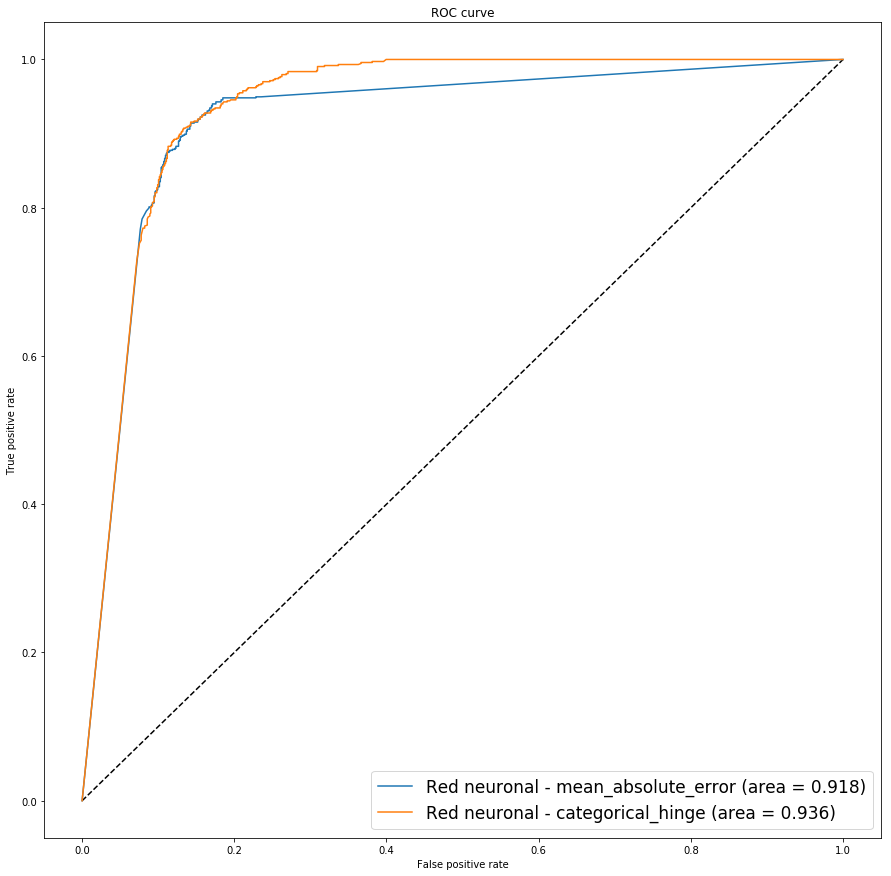

<Figure size 432x288 with 0 Axes>

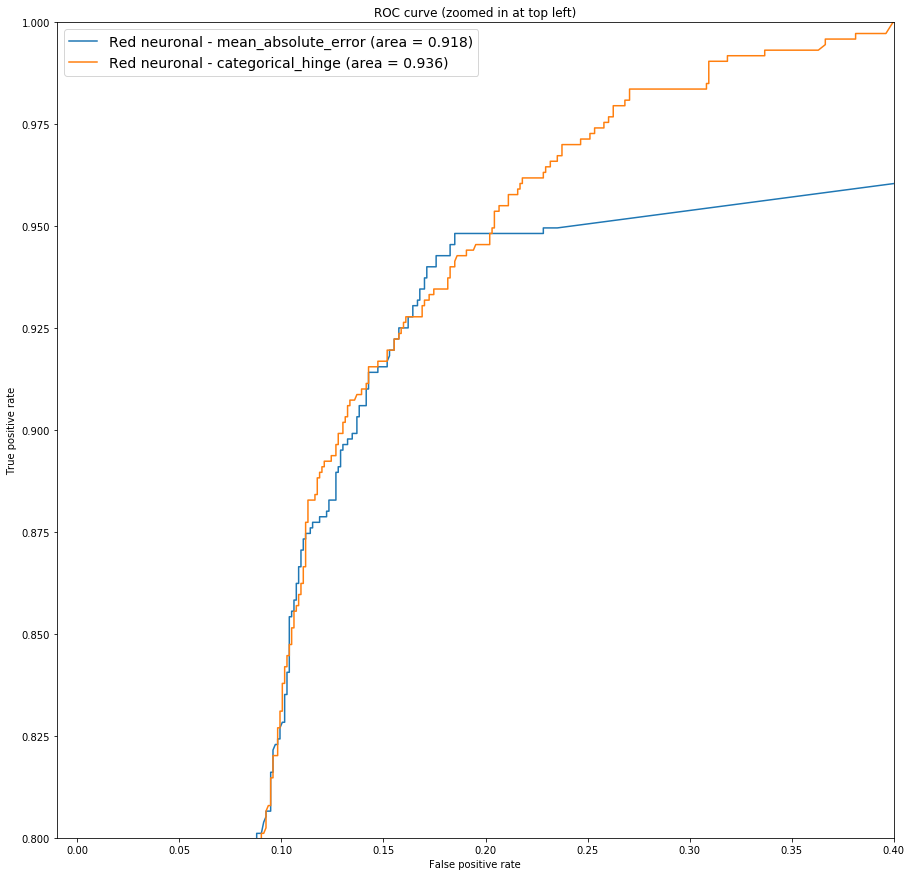

In [17]:
plt.subplots(figsize=(15,15))
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr_keras, tpr_keras, label='Red neuronal - mean_absolute_error (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_keras2, tpr_keras2, label='Red neuronal - categorical_hinge (area = {:.3f})'.format(auc_keras2))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best',prop={'size': 17})
plt.show()

plt.figure(2)
plt.subplots(figsize=(15,15))
plt.xlim(-0.01, 0.4)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr_keras, tpr_keras, label='Red neuronal - mean_absolute_error (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_keras2, tpr_keras2, label='Red neuronal - categorical_hinge (area = {:.3f})'.format(auc_keras2))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best',prop={'size': 14})

plt.show()

In [24]:
from sklearn.metrics import roc_auc_score,confusion_matrix, precision_score, mean_absolute_error, accuracy_score
from sklearn.metrics import recall_score, f1_score, cohen_kappa_score
# Confusion matrix
a = confusion_matrix(y_test, y_pred_mean_absolute_error.round())
b = roc_auc_score(y_test, y_pred_mean_absolute_error.round())
c = precision_score(y_test, y_pred_mean_absolute_error.round())
d = recall_score(y_test, y_pred_mean_absolute_error.round())
e = f1_score(y_test, y_pred_mean_absolute_error.round())
f = accuracy_score(y_test, y_pred_mean_absolute_error.round())

print (a,b,c,d,e,f)

[[738 138]
 [ 56 678]] 0.8830857377477512 0.8308823529411765 0.9237057220708447 0.8748387096774195 0.8795031055900621


In [29]:
a = confusion_matrix(y_test, y_pred_categorical_hinge.round())
b = roc_auc_score(y_test, y_pred_categorical_hinge.round())
c = precision_score(y_test, y_pred_categorical_hinge.round())
d = recall_score(y_test, y_pred_categorical_hinge.round())
e = f1_score(y_test, y_pred_categorical_hinge.round())
f = accuracy_score(y_test, y_pred_categorical_hinge.round())

print (a,b,c,d,e,f)

[[749 127]
 [ 62 672]] 0.885277083100046 0.8410513141426783 0.9155313351498637 0.8767123287671232 0.8826086956521739


Grafico de precisión del modelo

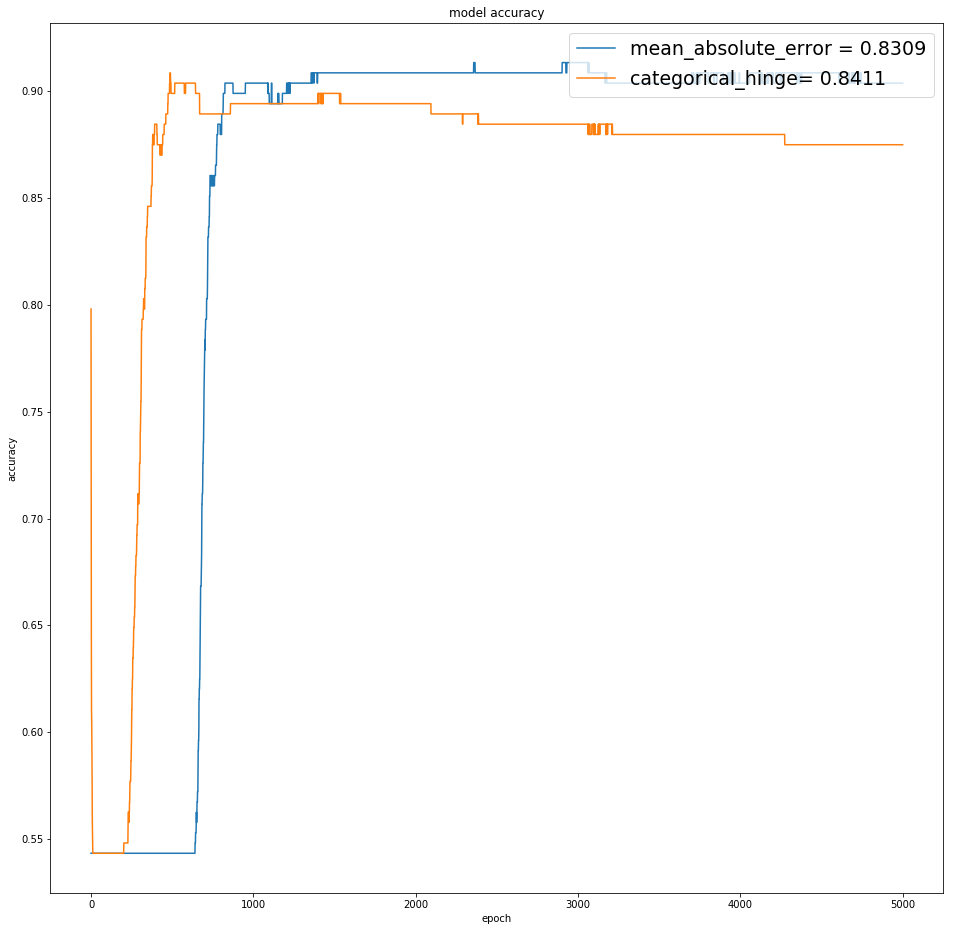

In [26]:
plt.subplots(figsize=(16,16))
plt.plot(history.history['val_acc'])
plt.plot(history2.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['mean_absolute_error = {:.4f}'.format(precision_score(y_test, y_pred_mean_absolute_error.round())),
'categorical_hinge= {:.4f}'.format(precision_score(y_test, y_pred_categorical_hinge.round()))], loc='upper right',prop={'size': 19})
plt.show()

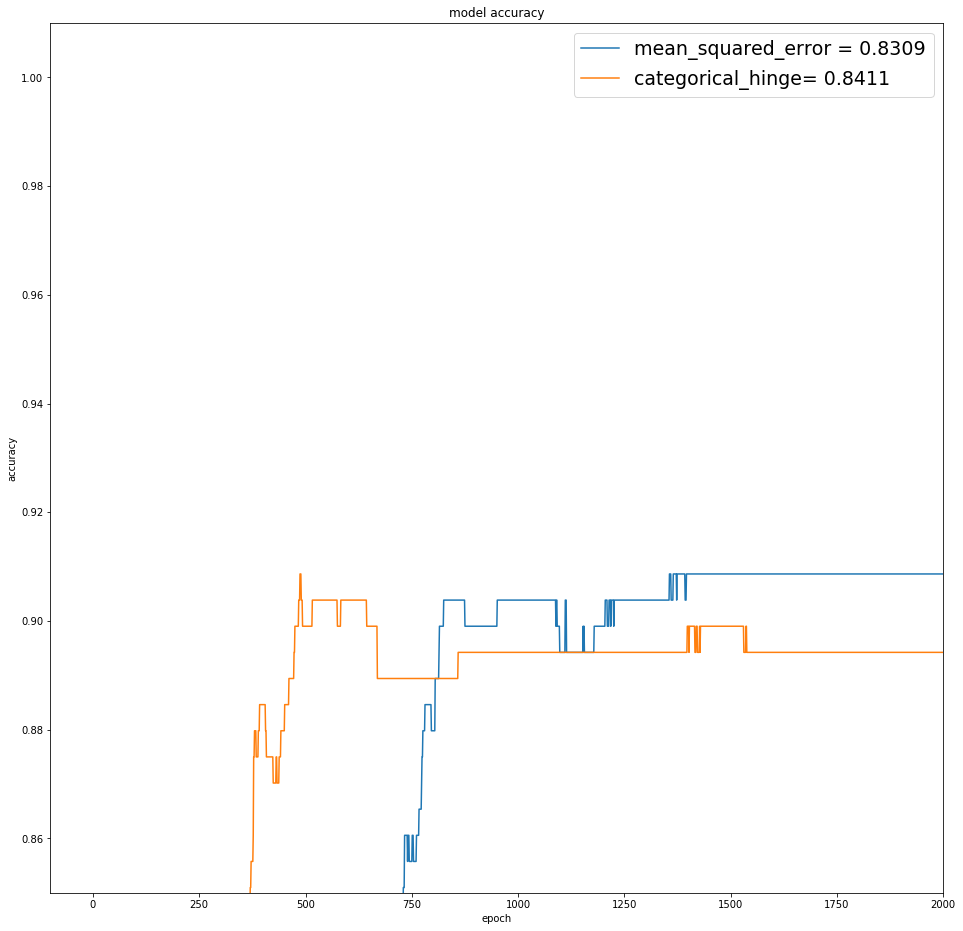

In [27]:
plt.subplots(figsize=(16,16))
plt.xlim(-100, 2000)
plt.ylim(0.85, 1.01)
plt.plot(history.history['val_acc'])
plt.plot(history2.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['mean_squared_error = {:.4f}'.format(precision_score(y_test, y_pred_mean_absolute_error.round())),
'categorical_hinge= {:.4f}'.format(precision_score(y_test, y_pred_categorical_hinge.round()))], loc='upper right',prop={'size': 19})
plt.show()

Gráfico de perdida del modelo

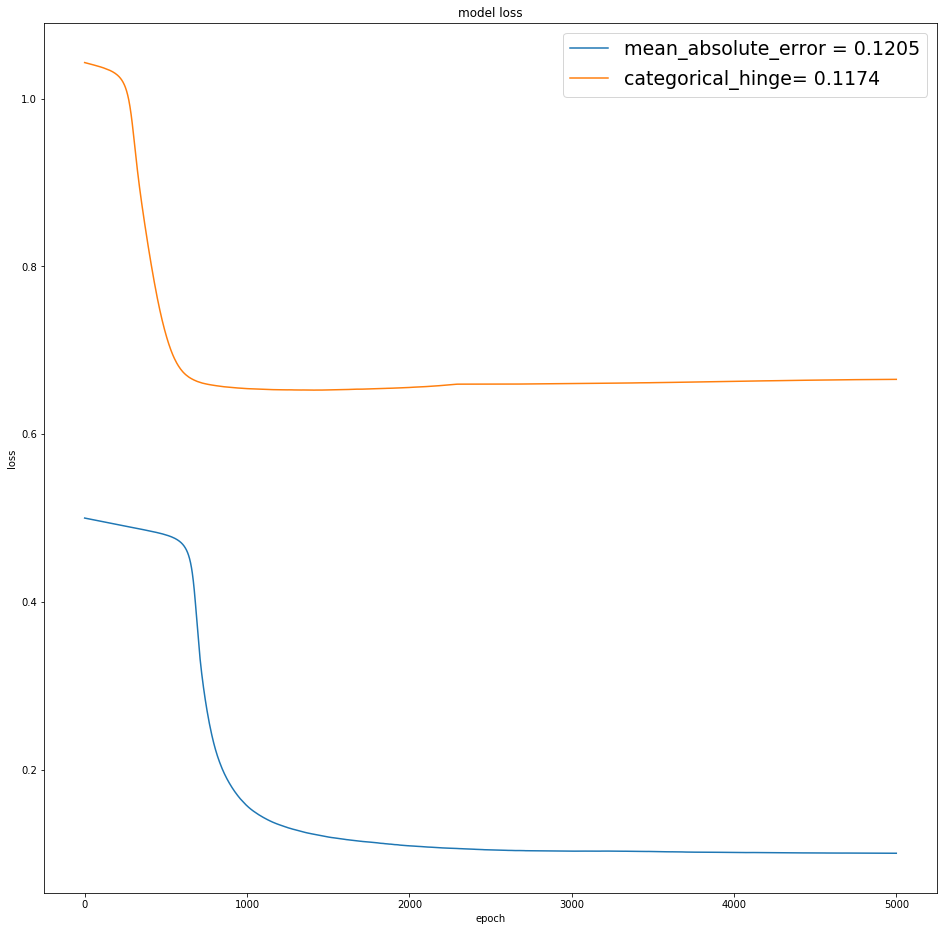

In [28]:
plt.subplots(figsize=(16,16))

plt.plot(history.history['val_loss'])
plt.plot(history2.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['mean_absolute_error = {:.4f}'.format(mean_absolute_error(y_test, y_pred_mean_absolute_error.round())),
'categorical_hinge= {:.4f}'.format(mean_absolute_error(y_test, y_pred_categorical_hinge.round()))], loc='upper right',prop={'size': 19})
plt.show()